# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path, bandwidth= './data/NCDC/europe/uk/marham/dat.txt', 1.7
# file_path, bandwidth= './data/NCDC/europe/uk/tiree/dat.txt', 1.9
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NCDC/europe/uk/boscombe_down/dat.txt', 1.5, 4
# file_path, bandwidth= './data/NCDC/europe/uk/middle_wallop/dat.txt', 1.3
# file_path, bandwidth= './data/NCDC/europe/uk/bournemouth/dat.txt',1.3 # 4?
# file_path= "./data/NCDC/europe/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/europe/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/europe/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/europe/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/europe/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/europe/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?
# file_path= './data/NCDC/europe/uk/southhamption/dat.txt' # high 0, trend

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/germany/landsberg_lech/dat.txt", 0.9, 4 
# file_path, bandwidth= "./data/NCDC/europe/germany/neuburg/dat.txt", 0.7
# file_path, bandwidth= "./data/NCDC/europe/germany/laupheim/dat.txt", 0.7 # double peak, 4?, trend
# file_path, bandwidth= './data/NCDC/europe/germany/niederstetten/dat.txt', 0.9 # get the peak
# file_path, bandwidth= "./data/NCDC/europe/germany/holzdorf/dat.txt", 0.9 # 2008 year
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/europe/france/nantes/dat.txt', 0.9, 4 # unit shift, one direction deviate big
# file_path, convert_to_knot= './data/NCDC/europe/france/pau_pyrenees/dat.txt', True # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/france/avord/dat.txt" # try 4, initial speed (should be good with m/s), incompete dataset
# file_path= "./data/NCDC/europe/france/vatry/dat.txt"  # double peak, initial speed, incompete dataset
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= "./data/NCDC/europe/spain/valladolid/dat.txt", 1.1, 4
# file_path= './data/NCDC/europe/spain/jerez/dat.txt' # high 0
# file_path, bandwidth= "./data/NCDC/europe/spain/barayas/dat.txt", 0.7 # not good fit
# file_path, bandwidth= './data/NCDC/europe/spain/malaga/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/tenerife_sur/dat.txt', 0.7 # directions blocked?
# file_path, bandwidth= './data/NCDC/europe/spain/almeria/dat.txt', 0.7 # negative dimensions?
# file_path, bandwidth= './data/NCDC/europe/greece/eleftherios_intl/dat.txt',0.7 # some direction might be blocked
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# MidEast
file_path, bandwidth= './data/NCDC/mideast/uae/al_maktoum/dat.txt', 1.1
# file_path= './data/NCDC/mideast/uae/sharjah_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/dubai_intl/dat.txt' 
# file_path= './data/NCDC/mideast/uae/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/uae/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/mideast/buraimi/dat.txt' # not good dataset
# file_path= './data/NCDC/mideast/turkey/konya/dat.txt' 
# file_path= './data/NCDC/mideast/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/turkey/bartin/dat.txt' # bad dataset
# file_path= './data/NCDC/mideast/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/mideast/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/mideast/iran/torbat_heydarieh/dat.txt' # Unusable

# file_path, bandwidth = "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt", 0.6
# file_path, bandwidth= "./data/NCDC/cn/shanghai/pudong/dat.txt", 0.8
# file_path, bandwidth= "./data/NCDC/cn/hefei_luogang/dat.txt", 0.6 # few 0, trend
# file_path, bandwidth= "./data/NCDC/cn/nanjing_lukou/dat.txt", 0.5
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0
# file_path= './data/NCDC/cn/gaoqi/dat.txt' 

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path, bandwidth= "./data/NCDC/oceania/auckland_intl/dat.txt", 0.9  # Good data, double mode
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path, bandwidth= "./data/NCDC/oceania/canberra/dat.txt", 0.7 # high 0, bad fit
# file_path, bandwidth, NUMBER_OF_GAUSSIAN= './data/NCDC/oceania/horsham/dat.txt', 0.9, 4 # get the peak

# file_path, bandwidth= './data/NCDC/us/boston_16nm/dat.txt', 0.9 # Offshore, mixed type

# file_path, bandwidth= './data/asos/olympia/hr_avg.csv', 0.5 # might block
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = './data/asos/bismarck_ND/hr_avg.csv', 1.1, 4
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/aberdeen_SD/hr_avg.csv', 1.7, 2 # only to 2012
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/asos/minneapolis/hr_avg.csv', 1.1, 4
# file_path, bandwidth = './data/asos/lincoln_NE/hr_avg.csv', 0.9
# file_path, bandwidth = './data/asos/des_moines_IA/hr_avg.csv', 1.3
# file_path, bandwidth = './data/asos/springfield_IL/hr_avg.csv', 1.1 
# file_path, bandwidth = './data/asos/topeka/hr_avg.csv', 0.7 # High 0
# file_path, bandwidth = './data/asos/denver/hr_avg.csv', 1.3

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = './data/NDAWN/baker/hr_avg.csv', 0.7, 4 
# file_path, bandwidth = './data/NDAWN/dickinson/hr_avg.csv', 0.6
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/usa/47N123W/dat.csv', 0.7, 4 #good 
# file_path, bandwidth = 'data/ECMWF/venezuela/8N67W/dat.csv', 0.7 # good, but the data might be problematic.
# file_path, bandwidth = 'data/ECMWF/chile/52S75W/dat.csv', 1.9 # good
# file_path, bandwidth= 'data/ECMWF/iceland/65N17W/dat.csv', 1.9 # good
# file_path, bandwidth, NUMBER_OF_GAUSSIAN  = 'data/ECMWF/germany/49N9E/dat.csv', 1.1, 4 # miss peak
# file_path, bandwdith = 'data/ECMWF/sudan/18N32E/dat.csv', 1.1 # good
# file_path, bandwidth = 'data/ECMWF/china/24N121E/dat.csv', 0.9 # good
# file_path, bandwidth, NUMBER_OF_GAUSSIAN = 'data/ECMWF/australia/37S142E/dat.csv', 0.7, 4 # miss the peak, force bandwidth 0.7

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
elif 'asos' in file_path:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    convert_to_knot = False
    integer_data = False
    knot_unit = True
else:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True)
    df.rename(columns={'U':'x','V':'y'}, inplace=True)
    df.x=-df.x
    df.y=-df.y
    df['speed']=np.sqrt(df.x**2+df.y**2)
    df['dir']=np.degrees(np.arctan2(df.y, df.x))%360
    df['time']=pd.to_datetime('1979-01-01T00:00:00Z')+pd.to_timedelta(df['time'], unit='h')
    df['date']=df['time'].dt.strftime('%Y%m%d')
    df['date']=df['date'].astype(int)
    df['HrMn']=df['time'].dt.strftime('%H00')
    df['type']='default'
    df['wind_type']='default'
    convert_to_knot = True
    integer_data = False
    cartesian = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0      20100518  0500  FM-15  999    1.0         V
1      20100518  0600  FM-15  999    1.0         V
2      20100518  0700  FM-15  330    2.1         N
3      20100527  0900  FM-15  190    5.1         N
4      20100614  0400  FM-15  170    7.2         N
5      20100614  0500  FM-15  160    6.2         N
6      20100614  0600  FM-15  170    5.1         N
7      20100614  0700  FM-15  180    2.6         N
8      20100614  0800  FM-15  999    1.5         V
9      20100614  1100  FM-15  310    7.2         N
10     20100614  1200  FM-15  340    7.7         N
11     20100614  1300  FM-15  330    8.2         N
12     20100614  1400  FM-15  320    6.2         N
13     20100614  1500  FM-15  320    2.6         N
14     20100614  1700  FM-15  340    2.6         N
15     20100614  1800  FM-15  360    3.1         N
16     20100614  1900  FM-15   90    2.6         N
17     20100614  2000  FM-15  100    3.6         N
18     20100614  2200  FM-15  110    2.1         N
19     20100614  2300  FM-15  120    2.1         N
20     20100615  0000  FM-15  140    1.0         N
21     20100615  0100  FM-15  150    2.1         N
22     20100615  0200  FM-15  130    0.5         N
23     20100615  0400  FM-15  150    2.6         N
24     20100615  0500  FM-15  160    6.2         N
25     20100615  0600  FM-15  160    4.1         N
26     20100615  0700  FM-15  170    3.1         N
27     20100615  0800  FM-15  999    2.1         V
28     20100615  0900  FM-15  999    1.0         V
29     20100615  1000  FM-15  340    8.2         N
...         ...   ...    ...  ...    ...       ...
61722  20170331  1800  FM-15  120    4.1         N
61723  20170331  1900  FM-15  120    3.6         N
61724  20170331  2000  FM-15   90    2.6         N
61725  20170331  2100  FM-15  110    3.1         N
61726  20170331  2200  FM-15  110    3.1         N
61727  20170331  2300  FM-15  130    3.1         N
61728  20170401  0000  FM-15   80    2.1         N
61729  20170401  0100  FM-15  120    2.1         N
61730  20170401  0200  FM-15   80    2.1         N
61731  20170401  0300  FM-15   40    2.1         N
61732  20170401  0400  FM-15  999    0.5         V
61733  20170401  0500  FM-15  310    1.5         N
61734  20170401  0600  FM-15  330    1.5         V
61735  20170401  0700  FM-15  999    1.0         V
61736  20170401  0800  FM-15  290    3.1         V
61737  20170401  0900  FM-15  330    3.1         V
61738  20170401  1000  FM-15  320    2.6         V
61739  20170401  1100  FM-15  330    2.6         V
61740  20170401  1200  FM-15  340    2.1         V
61741  20170401  1300  FM-15  340    6.2         N
61742  20170401  1400  FM-15  330    4.1         N
61743  20170401  1500  FM-15  330    4.1         N
61744  20170401  1600  FM-15  340    2.6         N
61745  20170401  1700  FM-15   20    1.0         N
61746  20170401  1800  FM-15  100    1.5         N
61747  20170401  1900  FM-15   90    3.1         N
61748  20170401  2000  FM-15   80    3.1         N
61749  20170401  2100  FM-15   60    2.6         N
61750  20170401  2200  FM-15   80    2.1         N
61751  20170401  2300  FM-15   90    3.1         N

[61752 rows x 6 columns]

In [5]:
if 'NCDC' in file_path:
    lat, long = get_lat_long(file_path)
    print(lat,long)
    map_osm = folium.Map(location=[lat, long], zoom_start=4)
    folium.Marker([lat, long]).add_to(map_osm)
    display(map_osm)

24.886 55.172


In [6]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) ")['1970':'2016']

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


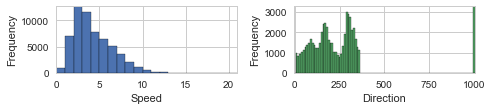

In [7]:
plot_speed_and_angle_distribution(df.speed, df.dir)

date          HrMn           dir         speed  dir_windrose
count  5.938300e+04  59383.000000  59383.000000  59383.000000  59383.000000
mean   2.013312e+07   1135.866376    226.156712      4.131822    237.997642
std    1.889311e+04    692.584200    210.592490      2.311919    208.489040
min    2.010052e+07      0.000000      0.000000      0.000000      0.000000
25%    2.012022e+07    500.000000    120.000000      2.600000    120.000000
50%    2.013101e+07   1100.000000    180.000000      3.600000    200.000000
75%    2.015052e+07   1700.000000    280.000000      5.700000    300.000000
max    2.016123e+07   2359.000000    999.000000     20.100000    999.000000

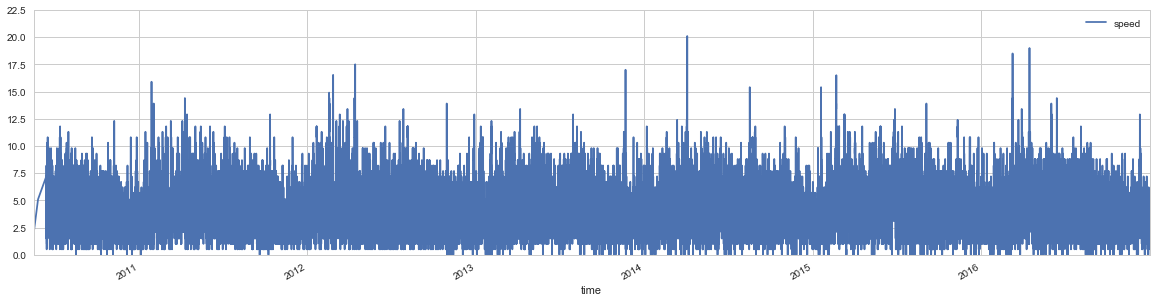

In [8]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
# Convert Windrose coordianates to Polar Cooridinates 
if 'cartesian' in globals():
    df['dir_windrose'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
else:
    df['dir_windrose'] = df['dir']
    df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
display(df.describe())
df.plot(y='speed',legend=True,figsize=(20,5))

## 1.3 General Data Info

### 1.3.1 Unit Detection

True


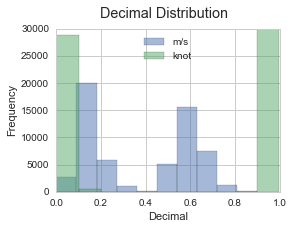

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))

if 'convert_to_knot' not in globals():
    convert_to_knot = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    
if convert_to_knot:
    knot_unit = True
    df['speed'] = df['speed'] * 1.943845
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='knot')
    # need more elaboration, some is not near an integer
    if integer_data:
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
else:
    if 'knot_unit' not in globals():
        knot_unit = False
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.3.2 Sampling Type Selection

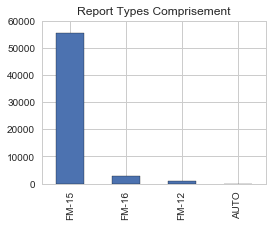

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

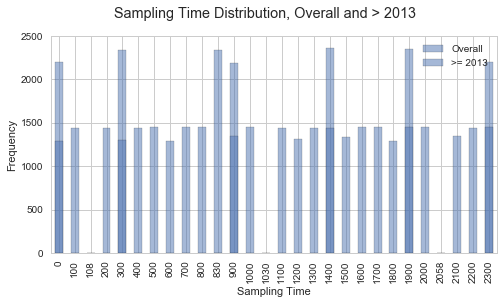

In [12]:
MID_YEAR = int(np.average(df.index.year))

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df[str(MID_YEAR):]['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='>= %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0]


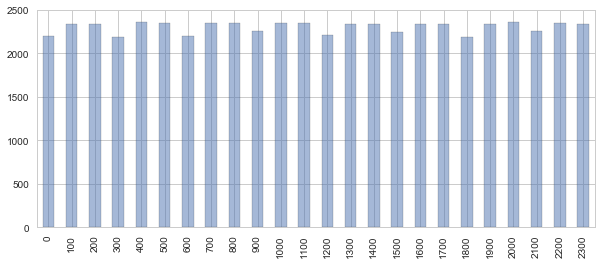

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df['2000':]['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.4 Error Data handling and Adjustment

### 1.4.1 Artefacts

wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, dir_windrose]
Index: []

sudden increase in speed

date  HrMn   type  dir  speed wind_type  \
time                                                               
2016-03-09 10:00:00  20160309  1000  FM-15   60     36         N   
2012-04-14 00:00:00  20120414     0  FM-15  180     34         N   
2015-02-21 06:00:00  20150221   600  FM-15  280     32         N   
2012-02-26 05:00:00  20120226   500  FM-15  270     32         N   
2012-02-26 00:00:00  20120226     0  FM-15  290     32         N   
2012-02-26 01:00:00  20120226   100  FM-15  280     32         N   
2012-02-26 06:00:00  20120226   600  FM-15  270     31         N   
2011-01-28 10:00:00  20110128  1000  FM-15  110     31         N   
2015-02-21 07:00:00  20150221   700  FM-15  270     31         N   
2015-02-21 08:00:00  20150221   800  FM-15  270     30         N   

                     dir_windrose  incre  incre_reverse  
time                                                     
2016-03-09 10:00:00            30   13.0           13.0  
2012-04-14 00:00:00           270    8.0           26.0  
2015-02-21 06:00:00           170    3.0            1.0  
2012-02-26 05:00:00           180    7.0            1.0  
2012-02-26 00:00:00           160    2.0            0.0  
2012-02-26 01:00:00           170    0.0            8.0  
2012-02-26 06:00:00           180   -1.0            7.0  
2011-01-28 10:00:00           340   23.0            5.0  
2015-02-21 07:00:00           180   -1.0            1.0  
2015-02-21 08:00:00           180   -1.0            4.0

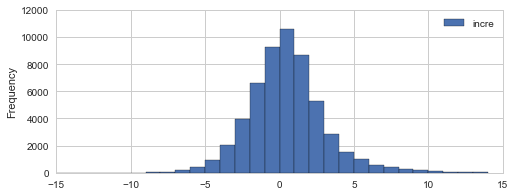

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 1


date  HrMn   type  dir  speed wind_type  \
time                                                               
2016-03-09 10:00:00  20160309  1000  FM-15   60     36         N   
2012-04-14 00:00:00  20120414     0  FM-15  180     34         N   
2012-02-26 05:00:00  20120226   500  FM-15  270     32         N   
2015-02-21 06:00:00  20150221   600  FM-15  280     32         N   
2012-02-26 01:00:00  20120226   100  FM-15  280     32         N   
2012-02-26 00:00:00  20120226     0  FM-15  290     32         N   
2015-02-21 07:00:00  20150221   700  FM-15  270     31         N   
2011-01-28 10:00:00  20110128  1000  FM-15  110     31         N   
2012-02-26 06:00:00  20120226   600  FM-15  270     31         N   
2012-02-25 23:00:00  20120225  2300  FM-15  290     30         N   

                     dir_windrose  incre  incre_reverse  
time                                                     
2016-03-09 10:00:00            30   13.0           13.0  
2012-04-14 00:00:00           270    8.0           26.0  
2012-02-26 05:00:00           180    7.0            1.0  
2015-02-21 06:00:00           170    3.0            1.0  
2012-02-26 01:00:00           170    0.0            8.0  
2012-02-26 00:00:00           160    2.0            0.0  
2015-02-21 07:00:00           180   -1.0            1.0  
2011-01-28 10:00:00           340   23.0            5.0  
2012-02-26 06:00:00           180   -1.0            7.0  
2012-02-25 23:00:00           160    2.0           -2.0

### 1.4.2 Direction re-aligment 
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,50 ...], need to redistribute the angle into 22.5, e.g. [0, 22.5, 45...]

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0      1535
10     1354
20     1263
30     1208
40     1043
50      984
60      864
70      795
80      939
90     1073
100    1208
110    1596
120    2068
130    1973
140    2554
150    2690
160    2782
170    1791
180    1222
190     859
200     765
210     819
220    1001
230     995
240    1412
250    1376
260    1482
270    2078
280    2232
290    2133
300    1825
310    1310
320    1100
330    1115
340    1282
350    1394
999    3156
Name: dir, dtype: int64

36 10.0


In [18]:
df=realign_direction(df, effective_column)

### 1.4.3 0 Speed

In [19]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df['2005':])
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.00341920544178


2     1403
1      533
3      519
4      257
0      189
5      152
6       65
7       26
8        7
10       3
11       1
9        1
Name: speed, dtype: int64


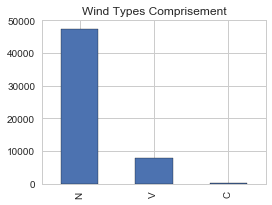

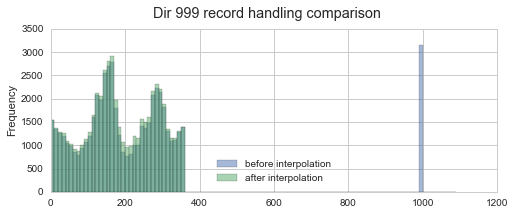

In [20]:
print(df.query('dir == 999')['speed'].value_counts())
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.5 Time Shift Comparison

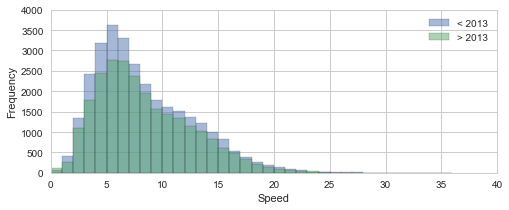

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df[:str(MID_YEAR)]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

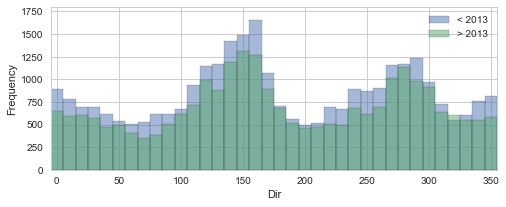

In [22]:
df[:str(MID_YEAR)]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df[str(MID_YEAR+1):]['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

In [23]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

date  HrMn   type  dir  speed wind_type  dir_windrose
time                                                                          
2010-05-18 05:00:00  20100518   500  FM-15  NaN      2         V           999
2010-05-18 06:00:00  20100518   600  FM-15  NaN      2         V           999

2011 - 2015


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


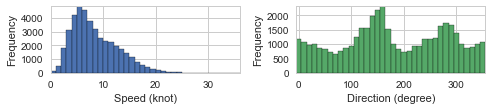

In [24]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 10.0)

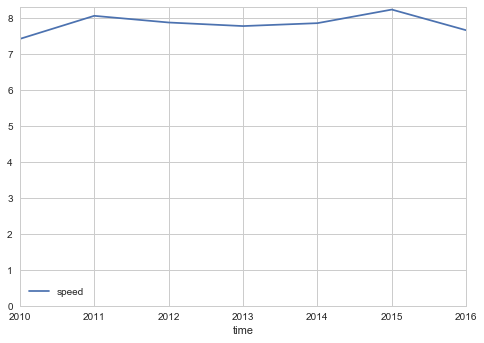

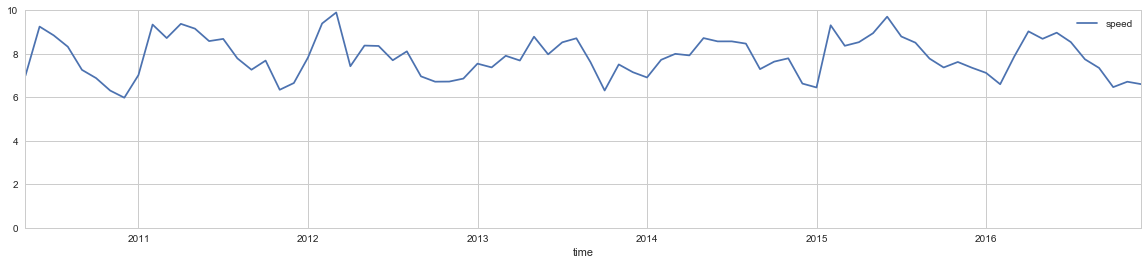

In [25]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [26]:
%%time
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 1000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAADuxJREFUeJzt3WtsFHXbx/Hvttt2t9uWcixQbW+KEvXWiIg0Rq2RR4OJ
QR8FpaSBFyAv9EUlEAMoYIVCwYjEEAKIMZIiUYKE4JNbjSAJKspt0Zoqp4RAC4WWHraHPbR7mufF
0mF3S7vdbqc7u70+CQkzO//hKvDb3Zn5HwyKoigIIYZUUqwLECIRSbCE0IAESwgNSLCE0IAESwgN
SLCE0IAES2caGhooLS2lsLCQJ554gjVr1tDe3g6A2+1mw4YNFBYWUlhYyAcffIDX6+11DkVReP31
19m/f3/Q/oG2F9GTYOmI1+vlzTffxG63s2/fPnbt2sWFCxdYtWoVAB999BE///wze/bsYfv27Rw9
epQ9e/b0OkdZWRk//fRTr/MPpL0YIorQjZqaGmXatGnKzZs31X1VVVXqvocfflg5duyY+trhw4eV
xx9/XPF6vYqiKEpdXZ1SXFysPPPMM8rMmTOVyspK9diurq6w7cXQkU8sHcnNzWXv3r2MHz9e3Wcw
GACor6/H6XQya9Ys9bWZM2fS0tJCXV0dAH/++ScFBQUcPnyYzMzMoHOfO3cubHsxdCRYOjJ69GiK
ioqC9n3++efk5+fT2NiI2WwOCkxPABsaGgB48cUX2bRpE9nZ2b3OPZD2YugYY12A6Nsnn3zCDz/8
wO7du7FaraSlpQW9npqaCoDL5Qp7LqfTGVV7ERn5xNKpnTt3sm3bNtauXcvTTz+NyWTqFYCebbPZ
HPZ80bYXkZFg6dCmTZvYsWMHZWVllJSUADBx4kQcDgc2m009rqmpCYCcnJyw54y2vYiMBEtnPv74
Y/bv309FRQULFy5U9993332YzWbOnDmj7quqqmLcuHHk5eWFPW+07UVkJFg6cvbsWXbv3s2SJUt4
8sknaWpqUn8ZjUbmz5/Phg0bOHPmDL/++ivbtm1j8eLFAzq3yWSKqr2IjEFR9DHQMfCddKQ6ePAg
R44cueNrW7duJScnh3379vHbb7+RkpJCUVERxcXFJCX1fn8sLS3lhRdeYM6cOeo+l8s14PYi2KOP
PhrR8boKVqTFx4LUOXTioUYYXJ3yViWEBiRYQmhAgiWEBiRYQmhAgiWEBiRYQmhAgiWEBiRYQmgg
YYeN+Hw+rFZr0L7Ro0dLLwMxLBI2WFarlS9Of40lKwMAe4eNksJ5jB07NsaViZEgYYMFYMnKIDM7
K9ZliBEoYYOlKApulxv3rcF8bpcbnXSLFCNAwgbL4XBQ39hOltt/TdXebKV+bL06OQvINZfQTsIE
K/RmhdVqJSnZiDElBQBXt4v/O3+MiZ2TALnmEtpKmGCF3qyov3wVFylBx6RnWuSaSwyLhAkWBN+s
SM/IwGnrVl9TALfbI9dcYlgkVLD64/V4aWjpxGCyA9DR2o7D4YhxVSJRjZhgARgDrrmSjSPqRxfD
LOwtMZ/Px/r161mwYAGLFi2itra21zFOp5Pi4mIuXbo04DZCJLKwwTp27Bgul4uvvvqKlStXsmXL
lqDXa2pqKCkp4erVqwNuo4XA51ZulwuP1635nylEX8IG68yZMzz11FMATJ8+nb///jvodZfLxc6d
OykoKBhwGy30PLe63mTnepOdhpsdeH2y9pOIjbAXGjabjYyMDHU7OTkZj8eD8dY1yp1mrwnXpi/R
TIHW0NBAp90GKf4/w+ZwYPS6SWttBaCjox1jWoq63dneRk1NjTobbCTiZaq2eKgzHmocjLDBysjI
wG63q9s+ny9sQAbTBiKfuy1QXV0dvztqGTVmDAD21naMaUbG9LGdrMBDDz0U8SywiTxl13CLhxph
cOEP+1VwxowZnDx5EoDq6mqmTZsW9qSDaTPclFs9NVpaWtRfPp8v1mWJBBH2Y+S5557jl19+obi4
GEVR2Lx5M9988w0Oh4MFCxYMuI3eOO0O6eIkNBM2WElJSWzYsCFo39SpU3sdV1lZ2W8bvVGAFFMa
pnQTID0xxNCKy6ekdxodbLVaiSQX0hNDaCkugxXa4Rbu3Ok2HOmJIbQSt/+bQkcHh3a6FSKWZJSf
EBqQYAmhAQmWEBqQYAmhAQmWEBqIy7uCoVObATJMROhKXAYrdGozgIabHaRazIM+p3LrvIGdh9PT
04OmSxNioOIyWOB/oNvzcBcgyRjZw+FQXo+HqrP1NHamAtDV5eDJGVOwWCxRnVeMTHEbLC2kpZkx
p6fHugyRAOTmhRAakGAJoQEJlhAakGusWxSfj86Odtrb/HNiOB1OfL7xMa5KxCsJ1i1Ou5Nq93+5
broGQGdbO9Ot48nMzIxxZSIeSbACmDLSsYzyB8ntcfd6rgXIKGMxIBKsPoQ+1wL/sy2LoSuGVYl4
IcHqg+Lz4ep24XLdDlJ3VzfmNJnJSYQnwepD6DUXQEdbG4VZBdLtSYQlwepH4DUXQFeXk4vXbIw7
23hrW7o9iTsLGyyfz0dZWRkXLlwgNTWV8vJy8vPz1dd//PFHdu7cidFoZN68ebz22msAvPzyy+o0
03fddRcVFRUa/QjDKzUlVe32pChKr5sb8gkmYADBClw5pLq6mi1btrBr1y4A3G43FRUVHDp0CLPZ
zMKFC5k9ezaZmZkoihI012AiUHw+7LZO9VmXtbWVtrZWRo/2T/Ipn2CiR9hg9bdyyKVLl8jLy2PU
qFGAf+7133//ncmTJ+N0OlmyZAkej4cVK1Ywffr0sMX0NUe2z+ejo6ND3b558yZWmxVvwAdD6KIH
Q70N0HijAa/PQ/vFNgDam1vJUwrImZQLQHd3F2alVTfBiocFB+KhxsGIarURm80W9ADVYrFgs9kw
mUwsXbqUV199lStXrrBs2TK+++67sAsj9DVBfktLS/DC3Z6rpJvM6gIHEH4RhGi3e/Y5uh3cle9f
SEFxe2l23yApw5/wTk87//uvxyJeaEEL8bDgQDzUCIMLf1SrjYS+ZrfbyczMZMqUKeTn52MwGJgy
ZQrZ2dk0NTUxadKkiAvs0d/C3bEU7qGyXHONTFGtNjJ16lRqa2tpa2vD5XJRVVXFI488wqFDh9RV
HBsbG7HZbIwfP/h+d/GyWqPH5eLE6bMcP3We46fO858Tf2Kz2WJdloiBqFcbWb16NUuXLkVRFObN
m0dOTg7z589nzZo1LFy4EIPBwObNmwe0PlZfQofiRzsMXytOu5Nz7hpabC2Av79hoTVP+huOQFGv
NjJ79mxmz54d9Hpqairbtm0bohL9AofiRzsMX0vy1VCAPCDWlMyjMXJJsDQm82iMTBIsDcngyZFL
gqWh0I687a2tjM9wkZubG3Rcbm4uycnJsShRaESCpbHAmxmtTc1UVv2HCdduP8+ztbVTOqdEFw+V
xdCRYA2zjKwsRo0dE/5AEddkliYhNCCfWDEmc8YnJglWjPV0g8q96g9Wd7eT559+WHprxDkJVoxJ
N6jEJMHSgcA7hx6PPjsYi8jIzQshNCCfWDrj8/mor68P2icPkOOPLoPl8/mwWq3qttVqZaRMQGtr
7wx6iCwPkOOTLoNltVqDh+JfvooL/Q4VGWryEDn+6TJYoN+h+MNNnnPFJ10GK3AoPqDbofjDQcZ0
xSddBitehuIPh9A55Lu7uvH5ZP54vdNlsCB+huJrLXToSUdbG9PqLdx9993qMfLVUH90GyxxW+AD
5K4uZ9BXQ6fTzoz7cnp9NZR1vGJLghVnQr8atlmtfHeygexRt+8idnU5GJUqNzxiSZNFEcK16UvP
fwSHw4G8395Z6FfD61fqMKYamZA8WT3G2tzMOMdkTGP8q6Lc6VNNgqYtTRZF+OOPP/ps05/jp84D
cO3aFbwmT5Q

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFHxJREFUeJztnXlsVHW7x7+dmc7SmS7s+ILF2yqKV1EW4TUixL4iBkET
i7SFlGtAAyGxEAwpFQoNtEJ9A8YgYUsMpMXQBhHlqi+yRRQs0kIFpcAFtdgp3Wbf2tl+949pT2em
y3SZzjkz83wSkp7f4XfmOXPme37b8zy/GMYYA0EQIUXEtwEEEY2Q8AiCB0h4BMEDJDyC4AESHkHw
AAmPIHiAhBcmNDQ0ICcnBzNnzsQLL7yAvLw8GAwGAIDD4cDWrVsxc+ZMzJw5Ex999BFcLleXazDG
8M4776C0tNSnvK/1ieBBwgsDXC4XVq9eDYvFgsOHD2Pv3r24ffs2cnNzAQC7du3CTz/9hP379+Pj
jz/G119/jf3793e5RkFBAX788ccu1+9LfSLIMELw3Lhxg02cOJE1NTVxZZWVlVzZM888w86cOcOd
O378OHv++eeZy+VijDF2//59lpmZyV566SU2ffp0VlJSwv3f1tbWgPWJ4EMtXhgwbtw4HDx4EKNG
jeLKYmJiAABqtRo2mw0zZszgzk2fPh0ajQb3798HAFy7dg0pKSk4fvw44uPjfa5dU1MTsD4RfEh4
YcCwYcMwe/Zsn7JDhw5hwoQJaGxshEKh8BFUh0AbGhoAAK+//jqKioqQlJTU5dp9qU8EHwnfBhD9
58CBAzh9+jT27dsHnU4HmUzmc14qlQIA7HZ7wGvZbLZB1ScGBrV4YcaePXuwc+dObNq0CXPmzIFc
Lu8ikI5jhUIR8HqDrU8MDBJeGFFUVITdu3ejoKAAS5cuBQCMHTsWVqsVZrOZ+3/Nzc0AgDFjxgS8
5mDrEwODhBcmfPLJJygtLcX27duRlZXFlT/xxBNQKBSoqqriyiorKzFy5EgkJycHvO5g6xMDg4QX
Bty8eRP79u3D8uXLMWvWLDQ3N3P/JBIJFi1ahK1bt6Kqqgo///wzdu7ciWXLlvXp2nK5fFD1iYER
w5hwA2G938LRTHl5OU6cONHtueLiYowZMwaHDx9GRUUFYmNjMXv2bGRmZkIk6vpezcnJwWuvvYZ5
8+ZxZXa7vc/1CV+mTZs2oHqCF95AbyyUkJ3BJRrsDLic4Ha7UVBQgNu3b0MqlaKwsBATJkzgzp87
dw579uyBRCJBeno6Fi9e3GMdjUaDTZs2wWg0wuVy4aOPPqJxBBGVBBTemTNnYLfbUVZWhurqauzY
sQN79+4F4HGu3b59O44dOwaFQoGsrCykpaXh6tWr3db597//jYULF2L+/PmoqKjAH3/8QcIjopKA
wquqqsKLL74IAHj22Wfx22+/cefu3buH5ORkJCYmAvD0d69cuYLq6upu61y9ehWPP/443n77bYwb
Nw4bN24MaGC4jPPIzuASLnYOlIDCM5vNUKlU3LFYLIbT6YREIoHZbPZxNVIqlTCbzT3WUavVSEhI
wKFDh/Dpp5/i4MGDWLNmTa+fH+l9/VBCdgaXwbwcAk5bqVQqWCwW7tjtdkMikXR7zmKxID4+vsc6
SUlJSEtLAwCkpaX5tJ4EEU0EFN7UqVNx4cIFAEB1dTUmTpzInUtNTUVtbS30ej3sdjsqKysxZcqU
HutMmzYNP/zwAwDgypUrePTRR4N+QwQRDgTsas6dOxcXL15EZmYmGGP48MMPcfLkSVitVmRkZGDD
hg1YsWIFGGNIT0/HmDFjuq0DALm5udi0aROOHj0KlUqFnTt3DvkNEoQQoXW8IEB2BpdosJNcEwiC
B0h4BMEDJDyC4AGKQA8DGGOwWq1dyuPi4rjcK0R4QcILA6xWK366+ifk8jiurLXVillT/wtKpZJH
y4iBQsITIP4tnMVigUymgCIurpdaRDhBwhMg/i2cXtcCeZwKcRHYurndbuh0ui5lkQ4JT6DI5XFc
C2ezRW5Lp9PpcOTyF1AmeHx7LUYz/luWyrNVQw8Jj+AdZYIK8UkJnQVt/NkSKkh4AsC/u2WxWKKi
uxXNkPAEgFarxeGLZVDGe7pbeq0ekxJfgNIrtIqILEh4AsBqtUJvdcEt9/gzGGxO2BWUxTmSIeGF
gO5m7oYNG+aTxUsskUASG9v+d2xI7SNCDwkvBHQ3c7d0ZjpGjBjBs2UEX5DwQkSXmbsoxb/112q1
EHBk2pBBwiNCin/r31TXgIQRiQAS+TUsxJDwiJDj3fqbDSaereGHgGFBbrcbmzdvRkZGBrKzs1Fb
W+tz/ty5c0hPT0dGRgbKy8v7VOfkyZPIyMgI4m0Q4QJjDA67Aw67vf2fE9HX0QxxQlvAswHHsWPH
orJfT3iWTtSNBiQ4PO/8hmYjxsvEPFsVegK2eH1NaCuVSrmEtj3V0el02LVrFz744IOhuBciTOhY
OpHExkIkEcPhcHq1gI6oeCmHLKGt3W7Hxo0bkZeX12Xr394Il4zCvdmp1+vRqGuA2erZ/NFiNKO6
rZrbk7yhoQF6gx6u9phWvU6Lmr9/g1brmf0zGnVQqRKRmKTlrtnaaoO4rb7fu7aG8vtkjKG1tdWn
rLGx0ededVot9CY9dK0uAIBZZ8DDD48Mm+c+UAIKL1gJbW/duoXa2loUFBSgra0Nd+/eRVFRUcA0
7pGQbaqlpQX/d70O8Umel1SsKBYPP/wwt44nkUiQaKlF0vDhAACL1oAW5QOIVJ5fp661Bf8cmYIJ
j6Rw17RZrZjy5Jh+BcKGOnuXxWLpEsBrZTbEq+Ix3OteJTIJRo/y7D4rE3mcB8LluQ+UgMKbOnUq
zp8/j/nz5/ea0DYuLg6VlZVYsWIFYmJiutSZPHkyvvnmGwBAXV0d1q1b16e9EyKBLuOa2gboNCcx
dtxDAAD1n3/DDl9vFbkqDspEj1BbW22hNTiIeIc3AYBMpgCcPBokEEKa0Daa8XYJE0nEiJXLII+T
AwCkChlsNopGiCYCCk8kEmHr1q0+ZampnYGKaWlp3H4IvdXxZvz48dzSQzTicrrQoDEhRu7pjjc0
GSFV9m+sFqkwtxtGoxEajYYr8/drjQQEv4Du/QCAyHkIErF3C9h/p2jGmM84GoiMrGM2ixVXbPWw
1nhmNiPVr1XwwjtRc4r7O1IfwkBobbWh4roeiYnD2o+Fl3XM7XbDoNfBbu+c2TQZDWCi3pcLFCoF
59nidruh1Wp9zkfCy1fwwhO6Y7Hb7YZer+da5o7Ice8fhk6nw1AsTcnkws48ptPpcLHuPOKTOv0w
65vuQzW852fKADidnnU9ADBoDDje/B1GjhkJIHJevoIXntDR6XQ4f/9n/CVrBOBx+hXHSjCi/YcC
dD9rGS0ovGZnAUCu7P1F4XK6oLc5UN/cPv5tNmL8+GGCfwH3FxJeEIiLj/Nx+pVIJT4/lDiVCjZz
FGTwCRJikdgrKDgy3clIeGEAc7thMhpg0HeOdYwGPeITk3i0ihgMYSW8SB1oB8JmsaHa8Qvq5XVc
ma6lBf8UzcGIESN7qUkIlbASntVkwZfN33HjJ0EOtBmD3eHgJgcAwOlyDPqycr+xUjh7sxBhJjwA
UCYoBT3QdjhcaDJa4BR3TuvTAjm/9CXZVKgJO+GFA2JR5+I4MLAFciHS3XZh3ov2/uetVqsgglyF
mGxK8MLz7rI57E6IpZ0mR+uYjy/8N1PxX7Q3m834zw+/ehyhAdTV/QWXXBge0UJLNiV44XWs5wBd
o5XDYswXYXhHG/i7ranValxp/hkJ7XGG9freF8uHinDIZCZ44Xl32bpb0xH6mC+S8Xdbu1/7N2QK
OTcJFGixfKgIh0xmghce3whxYN4dfDlNe7utCSnWzieTmd7oM9MshPQSYSU8BnD5OYCuY76hwP/t
adIb8drj/+I

Wall time: 4.24 s


In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 1000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUgAAADECAYAAAD9EbgkAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE/9JREFUeJzt3X9MVff9x/HXBYoioNZuJs2X2QGtmc4QZk2tcdA26bRZ
5myNdQWDybBGXWfHGvWKAtZARNLObW3Gqpv+c5U6Iq7f5muWrjI3NrGkYVonxZnyZSZIyxT9tlzF
C1zO9w/DnfTec3+g957D5flImsg9l/C+n8Cr5557znk5DMMwBADwk2D1AABgVwQkAJggIAHABAEJ
ACYISAAwQUACgImkUE84duyYfv/730uSPB6P2tvbVVdXp927d8vhcOiRRx7Rzp07lZCQoPr6eh05
ckRJSUnauHGjnnrqKd26dUtbtmxRb2+vUlNTVVNToxkzZkT9hQHA3XJEch7krl279I1vfEMnT57U
D3/4Qy1cuFAVFRXKy8tTbm6uiouL1dDQII/Ho8LCQjU0NOjw4cNyu93atGmTjh8/rjNnzqisrCya
rwkA7omw32L/4x//0CeffKIf/OAHamtr02OPPSZJys/PV3Nzs86dO6dvfetbSk5OVnp6umbNmqUL
Fy6otbVVeXl5vueePn06Oq8EAO6xkG+xR+zbt08vvfSSJMkwDDkcDklSamqq+vr65Ha7lZ6e7nt+
amqq3G73qMdHnhtKa2trRC8CAML16KOPhv3csALyiy++UGdnpx5//HFJUkLCf3Y8b9y4oalTpyot
LU03btwY9Xh6evqox0eee69fRDS1trbaYha7zCExixlmCcxus0QirLfYH374oRYtWuT7eu7cuWpp
aZEkNTU1acGCBcrJyVFra6s8Ho/6+vrU0dGh2bNna/78+frLX/7ie65dFgoAQglrD7Kzs1MZGRm+
r51Op8rLy7V3715lZWVp6dKlSkxMVFFRkQoLC2UYhn76059q0qRJKigokNPpVEFBge677z797Gc/
i9qLAYB7KayAfPHFF0d9nZmZqUOHDvk9b9WqVVq1atWox1JSUvTGG2/cxYgAYA1OFAcAEwQkAJgg
IAHABAEJACYISAAwQUACgAkCEgBMEJAAYCLsm1VMRF6vV5cuXRp1E447ZWdnKzExMcZTAYgVAjKI
jo4O1Rw+pynTPvPbdvPzf8tVXajZs2dbMBmAWCAgQ5gybabS7v8vq8cAYAGOQQKACQISAEwQkABg
goAEABNhfUizb98+/elPf9Lg4KAKCgr02GOPadu2bdS+AohrIQOypaVFZ86c0dtvv63+/n4dPHhQ
1dXVKikp8dW+NjY2Kjc3Vy6Xa1Tt6+LFi/X2229r9uzZvtrX2trauKh9NYaH1dnZabqdcySB8S9k
QP7tb3/T7Nmz9dJLL8ntdmvr1q2qr68fVft66tQpJSQk+Gpfk5OTR9W+jtyRPD8/X7W1tdF9RTHS
33dFFfuvasq0Dr9tnCMJxIeQAXn9+nV1d3frrbfeUldXlzZu3Bj12lfJHtWvly5dCro92DmS58+f
D/u1hssOazKCWQJjlsDsNEskQgbk9OnTlZWVpeTkZGVlZWnSpEn67LP/XFkSz7Wv6enp0v/4X0UT
jnnz5t3TPUi7VWcyiz9mCcxus0Qi5KfYjz76qP7617/KMAz19PSov79fixYtovYVQNwLuQf51FNP
6cMPP9TKlStlGIYqKiqUkZFB7SuAuBfWaT5bt271e4zaVwDxjhPFAcAEAQkAJghIADAx4e8H6fV6
1dHhf7K3pKBXygCIfxM+IDs6OlRUWqcp02b6bevtatcDGXMsmAqAHUz4gJTMr4i5+XmPBdMAsAuO
QQKACQISAEwQkABggoAEABMEJACYICABwAQBCQAmCEgAMEFAAoAJAhIATIR1qeFzzz2ntLQ0SVJG
RoY2bNhAL3YQVMIC8SFkQHo8HhmGIZfL5Xtsw4YNE74XOxgqYYH4EDIgL1y4oP7+fhUXF2toaEiv
vPKK2traot6LHauayFDVrmMVjUpYO1VnMktgzBKYnWaJRMiAnDx5stauXavnn39e//rXv7Ru3bqY
9GLHqv3wbqpdx2oslbB2q85kFn/MEpjdZolEyIDMzMzUQw89JIfDoczMTE2fPl1tbW2+7dHqxQYA
q4X8FPvo0aPas2ePJKmnp0dut1uLFy+mFxtA3Au5B7ly5UqVlpaqoKBADodDu3fv1v33308vNoC4
FzIgk5OTA4YavdgA4h0nigOACQISAEwQkABggoAEABMEJACYICABwAQBCQAmCEgAMEFAAoAJAhIA
TBCQAGCCgAQAE2F10ox3Xq9XHR3+9QeSgnbHAJjYJkRAdnR0qKi0TlOmzfTb1tvVrgcy5lgwFQC7
mxABKZl3xNz8vCemcwRrPKTtELCXsAKyt7dXK1as0MGDB5WUlETl610wazyk7RCwn5Af0gwODqqi
okKTJ0+WJFVXV6ukpER1dXUyDEONjY26cuWKXC6Xjhw5ogMHDmjv3r0aGBjwVb7W1dXp2WefDbvR
MN6N7M3e+V+gt/8ArBUyIGtqavTCCy9o5szbf8Bfrnxtbm7WuXPnfJWv6enpoypf8/LyfM89ffp0
FF8KANxbQd9iHzt2TDNmzFBeXp72798vSTGpfJXubY9utLqv77VQfdl26hZmlsCYJTA7zRKJoAHZ
0NAgh8Oh06dPq729XU6nU9euXfNtj2bl671sP7Si+3osgvVl261bmFn8MUtgdpslEkHfYh8+fFiH
Dh2Sy+XSnDlzVFNTo/z8fCpfAUwIEZ/m43Q6qXwFMCGEHZAul8v3bypfAUwEXIsNACYISAAwQUAC
gAkCEgBMEJAAYIKABAATBCQAmCAgAcDEhLlhrt0Fu5GudLs2AkBsEZA2YXYjXen2zXSdq3N8t5kD
EBsEpI2Y1UIAsAbHIAHABAEJACYISAAwQUACgImQH9J4vV6VlZWps7NTDodDu3bt0qRJk6h+BRD3
QgbkyZMnJUlHjhxRS0uLfv7zn8swDJWUlGjhwoWqqKhQY2OjcnNz5XK51NDQII/Ho8LCQi1evNhX
/bpp0yYdP35ctbW1Kisri/oLiyfG8LC6u7t18eLFgNuzs7OVmJgY46mA+BcyIJ9++mk9+eSTkqTu
7m5NnTpVzc3No6pfT506pYSEBF/1a3Jy8qjq1xdffNH3XLqxI9ffd0Wukw41/P2E37abn/9brupC
07IvAGMX1nmQSUlJcjqdev/99/XGG2/o1KlTUa9+nYi1r8EEO0cyVF1sNNipxpNZAmOWuxf2ieI1
NTXavHmzVq1aJY/H43s8WtWvE7H2dayC1cVGg91qPJnFH7MEFmlQhwzId955Rz09PVq/fr1SUlLk
cDg0b948tbS0aOHChWpqatLjjz+unJwc/eIXv5DH49HAwIBf9WtOTg7Vr1EQ6hpujk8CYxcyIJcs
WaLS0lKtXr1aQ0ND2r59u7Kzs6l+tYlQ13BzfBIYu5ABOWXKFP3yl7/0e5zqV/vgGm4gOjhRHABM
EJAAYIKABAATBCQAmCAgAcAEdxSPY5wjCdwdAjKOcY4kcHfiJiC9Xq86OvyDQFLQvah4xzmSwNjF
TUB2dHSoqLROU6bN9NvW29WuBzLmWDAVgPEsbgJSMt9buvl5jwXTABjv+BQbAEwQkABgIq7eYiN8
nAIEhEZATlCcAgSERkBOYJwCBATHMUgAMBF0D3JwcFDbt2/X5cuXNTAwoI0bN+rhhx+mExvAhBB0
D/Ldd9/V9OnTVVdXp9/+9reqrKxUdXW1SkpKVFdXJ8Mw1NjYqCtXrsjlcunIkSM6cOCA9u7dq4GB
AV8ndl1dnZ599lkqXwGMK0H3IJ955hktXbpUkmQYhhITE9XW1haTTuxI28fiodrVTkJVydqpxpNZ
AmOWuxc0IFN

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGJtJREFUeJzt3X9MFHfeB/D3/mApzi5aHtPEPB4K1k2rZCNg9BKutCRV
jKlXe9HN7RqaFG2Q87TQExcR/BGIHlG4O4z013n/rOJ2I01jzufSq6aVRK1/zHOVgKXmNhyJYluk
P9xZZVGY54972OuWdRmW/THLvl+JiXxnlvnMd5b3zs58Z0Yjy7IMIiIKS5voAoiIkgHDkohIAYYl
EZECDEsiIgUYlkRECjAsiYgU0E81w9jYGOrr69Hf3w+NRoNDhw4hPT0dtbW10Gg0WLp0KQ4cOACt
Vgu32w2XywW9Xo/KykqUlJRgZGQENTU1GB4ehiAIaG5uRlZWVjzWjYgoaqbcs/zkk08AAC6XC1VV
VfjDH/6AI0eOoKqqCh0dHZBlGRcvXsTQ0BCcTidcLhdOnjyJ1tZWjI6O4syZMzCbzejo6MDGjRvR
3t4e85UiIoq2KfcsX3zxRbzwwgsAgMHBQWRmZuLKlStYtWoVAKC4uBiXL1+GVqtFfn4+DAYDDAYD
srOz0dfXB1EUsW3btsC8DEsiSkZThiUA6PV6OBwOfPzxx2hra8Ply5eh0WgAAIIgwOv1QpIkmEym
wGsEQYAkSUHtE/NORRTFSNaFiGhKhYWFEb1OUVgCQHNzM3bv3g2r1Qq/3x9o9/l8yMzMhNFohM/n
C2o3mUxB7RPzKhHpCkWbKIqqqEUtdQCs5XFYS2hqqyVSUx6z/PDDD/HOO+8AADIyMqDRaJCXl4dr
164BALq6urBy5UpYLBaIogi/3w+v1wuPxwOz2YyCggJcunQpMK9aOo2IaDqm3LNcu3Yt9u7diy1b
tuDRo0eoq6vDkiVL0NDQgNbWVuTm5qK0tBQ6nQ5lZWWw2+2QZRnV1dVIT0+HzWaDw+GAzWZDWloa
Wlpa4rFeRERRNWVYzpkzB3/6058mtZ86dWpSm9VqhdVqDWrLyMhAW1vbDEqkZDE2NgaPx/PY6UuW
LIFOp4tjRUTRo/iYJdFUPB4PyvZ2YM7cpyZNu//DN3AescNsNiegMqKZY1hSVM2Z+xSMT/53ossg
ijpe7khEpADDkohIAX4Np2kZGxvDwMBA0AUIE/r7+xNQEVF8MCxpWjweD5pPd2PO3K8mTRu+9QX+
a+GzCaiKKPYYljRtjzuJc/+HrxNQDVF88JglEZECDEsiIgUYlkRECjAsiYgUYFgSESnAsCQiUoBh
SUSkAMOSiEgBDkqnScLdl5KXNFKqYljSJOHuS8lLGilVMSwpJF7SSBSMxyyJiBQIu2f58OFD1NXV
4fbt2xgdHUVlZSUWLFiAiooKLF68GABgs9mwfv16uN1uuFwu6PV6VFZWoqSkBCMjI6ipqcHw8DAE
QUBzczOysrLisV5ERFEVNizPnTuHefPm4ejRo/j++++xceNG7NixA6+99hrKy8sD8w0NDcHpdKKz
sxN+vx92ux1FRUU4c+YMzGYzdu7cifPnz6O9vR319fUxXykiomgL+zV83bp1eOONNwAAsixDp9Oh
p6cHn376KbZs2YK6ujpIkoTu7m7k5+fDYDDAZDIhOzsbfX19EEURzz33HACguLgYV69ejf0aERHF
QNg9S0EQAACSJGHXrl2oqqrC6OgoNm/ejLy8PLz11ls4ceIEnnnmmaA7ZwuCAEmSIElSoF0QBHi9
XsWFiaIYyfrEhFpqiVcdAwMDMfm9PT0903oPKKWW7QOwlsdRUy2RmvJs+J07d7Bjxw7Y7XZs2LAB
9+7dQ2ZmJgBgzZo1aGxsxMqVK+Hz+QKv8fl8MJlMMBqNgXafzxd4nRKFhYXTXZeYEEVRFbXEsw6T
yQT8dfKd0GcqLy8v6o/CVcv2AVjL46itlkiF/Rp+9+5dlJeXo6amBps2bQIAbN26Fd3d3QCAq1ev
Yvny5bBYLBBFEX6/H16vFx6PB2azGQUFBbh06RIAoKurSzUdRkQ0XWH3LN9++23cu3cP7e3taG9v
BwDU1tbi8OHDSEtLw/z589HY2Aij0YiysjLY7XbIsozq6mqkp6fDZrPB4XDAZrMhLS0NLS0tcVkp
IqJoCxuW9fX1Ic9eu1yuSW1WqxVWqzWoLSMjA21tbTMskYgo8TgonYhIAYYlEZECDEsiIgUYlkRE
CvCuQ0QqFe6+ogCwZMkS6HS6OFaU2hiWRCoV7r6i93/4Bs4j9qgP8qfHY1gSqdjj7itK8cdjlkRE
CjAsiYgUYFgSESnAY5ZESUgeHw/7pM2xsbE4VpMaGJZESeiBdwj7372LOXMnDy26/8M3cGyxYNWq
VQmobPZiWBIl0Eye0c4z5fHFsCRKID6jPXkwLGcxXgGSHPiM9uTAsJzFeAUIUfQwLGc5Htciig6O
syQiUoB7likq3Di9qc7CEqUihmWKCjdOj2dhiSYLG5YPHz5EXV0dbt++jdHRUVRWVuLpp59GbW0t
NBoNli5digMHDkCr1cLtdsPlckGv16OyshIlJSUYGRlBTU0NhoeHIQgCmpubkZWVFa91oynwLCyR
cmGPWZ47dw7z5s1DR0cH/vznP6OxsRFHjhxBVVUVOjo6IMsyLl68iKGhITidTrhcLpw8eRKtra0Y
HR3FmTNnYDab0dHRgY0bNwYep0tElGzC7lmuW7cOpaWlAABZlqHT6dDb2xu4jKq4uBiXL1+GVqtF
fn4+DAYDDAYDsrOz0dfXB1EUsW3btsC80wlLURQjXaeoU0st061jYGAgRpVEpqenB16vN+q/Vy3b
B1DXNkrmflGjsGEpCAIAQJIk7Nq1C1VVVWhuboZGowlM93q9kCQJJpMp6HWSJAW1T8yrVGFh4bRX
JhZEUVRFLZHUYTKZgL9+FaOKpkceH4cgCEHvkx+LdIC8WrYPoL5tlMz9EiszCe0pT/DcuXMHO3bs
gN1ux4YNG3D06NHANJ/Ph8zMTBiNRvh8vqB2k8kU1D4xL6WmqW78wAHypHZhj1nevXsX5eXlqKmp
waZNmwAAy5Ytw7Vr1wAAXV1dWLlyJSwWC0RRhN/vh9frhcfjgdlsRkFBAS5duhSYVy2fLpQYEyeU
fvov1BVGRGoTds/y7bffxr1799De3h443rhv3z40NTWhtbUVubm5KC0thU6nQ1lZGex2O2RZRnV1
NdLT02Gz2eBwOGCz2ZCWloaWlpa4rBQRUbSFDcv6+nrU19dPaj916tSkNqvVCqvVGtSWkZGBtra2
GZZIRJR4HJRONMvI4+MYHBzEzZs3Q07n3aYiw7AkmmUeeIfg/ESDzv+9MGkaT6ZFjmFJNAvxblPR
x7sOEREpwLAkIlKAYUlEpADDkohIAYYlEZECDEsiIgUYlkRECjAsiYgUYFgSESnAK3iS3NjYGDye
yfeIBPiURqJoYlgmOY/Hg7K9HSHvCcmnNBJFD8NyFuBTGolij2FJFGM8VDI7MCyJFAoXehPTQ+Gh
ktmBYUmkULjQu//DN3BssQQeE/1TPFSS/FQblrzLM6kR7xOZuhSF5fXr13Hs2DE4nU7cuHEDFRUV
WLx4MQDAZrNh/fr1cLvdcLlc0Ov1qKysRElJCUZGRlBTU4Ph4WEIgoDm5mZkZWUpKqzi97zLMxGp
x5Rh+d577+HcuXPIyMgAAPT29uK1115DeXl5YJ6hoSE4nU50dnbC7/fDbrejqKgIZ86cgdlsxs6d
O3H+/Hm0t7eHfABaKPz0JiI1mTIss7Ozcfz4cezZswcA0NPTg/7+fly8eBGLFi1CXV0duru7kZ+f
D4PBAIPBgOzsbPT19UEURWzbtg0AUFxcHHic7kz09PTA6/XO+PdMhyiKcV3e44SqY2BgIAGVRN9M
tmu8tk+4vp5

## 1.6 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

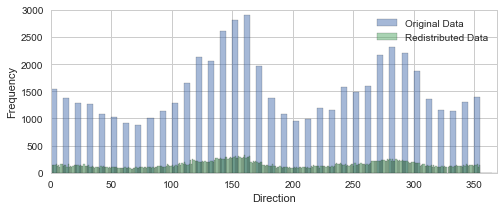

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


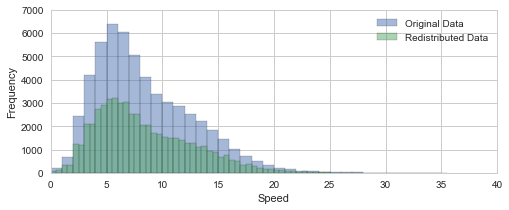

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.7 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years['2011':'2015']
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: FM-15
Sampling time used: [0]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed  dir_windrose  \
count  4.206600e+04  42066.000000  42066.000000  42066.000000  42066.000000   
mean   2.013044e+07   1153.544430    179.874592      8.447488    237.262920   
std    1.405171e+04    691.989734     98.737423      4.375064    208.025899   
min    2.011010e+07      0.000000     -4.978698      0.005481      0.000000   
25%    2.012033e+07    600.000000    110.516651      5.156952    110.000000   
50%    2.013062e+07   1200.000000    167.650918      7.482294    200.000000   
75%    2.014092e+07   1800.000000    269.171783     11.220914    300.000000   
max    2.015123e+07   2300.000000    354.999753     34.535472    999.000000   

                  x             y  
count  42066.000000  42066.000000  
mean      -1.553747      0.376113  
std        6.507981      6.752294  
min      -34.524102    -32.472160  
25%       -6.005882     -4.253203  
50%       -0.962347      0.459120  
75%        3.482725      5.152950  
max       27.009530     29.545306

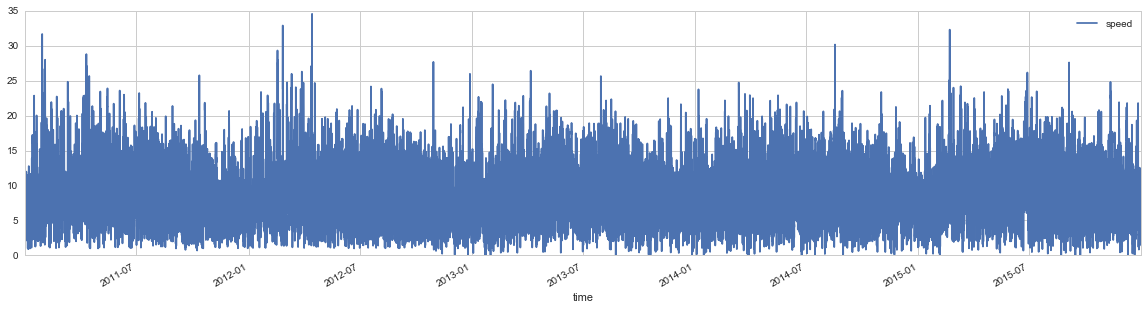

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

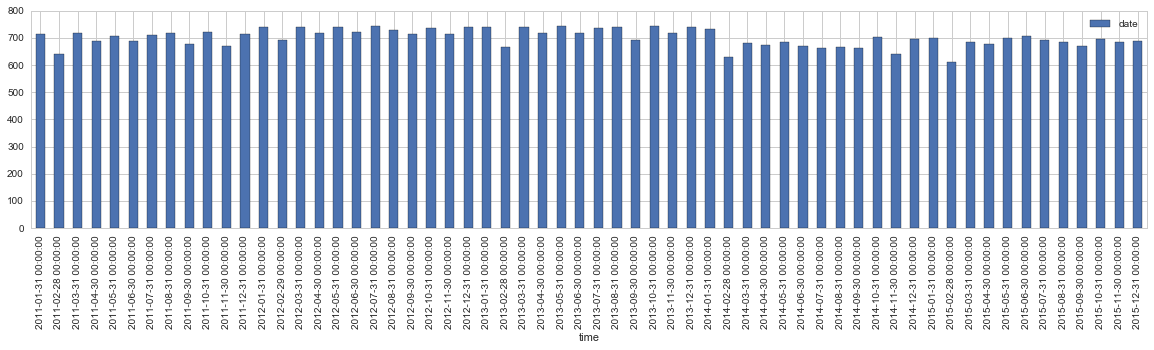

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


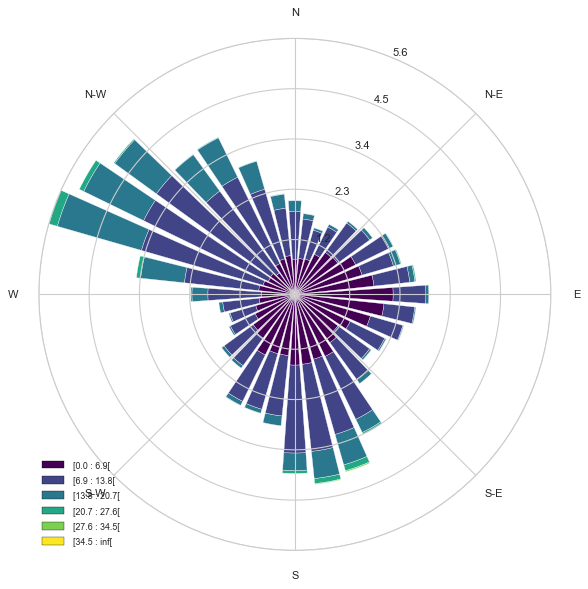

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADSCAYAAAB6vWTpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlYVGX7wPHvsIzCsLqRmZq7ueX2iilqqZSaW4KCe+lb
aZZZ5oZCFrhFi1lqlvpmuOSSJlSvSpmamgsquSW9kVGIoLIkqyxzfn/4Y5JYBGTmMDP357rmuuAc
zjz348DtWZ7nuTWKoigIIYSR2agdgBDCOkiyEUKYhCQbIYRJSLIRQpiEJBshhElIshFCmITRko1e
rycoKAg/Pz/Gjx9PXFxcsZ/Jzs7G39+f2NhYAPLy8pg1axZjxozB19eX7777zljhCSFMzGjJ5ttv
vyU3N5etW7cyc+ZMli5dWmT/uXPnGDt2LH/++adhW3h4OG5ubmzevJm1a9cSHBxsrPCEECZmtGRz
6tQpevXqBUDHjh05f/58kf25ubmsXLmSpk2bGrYNGDCAl19+GQBFUbC1tTVWeEIIE7Mz1htnZGTg
5ORk+N7W1pb8/Hzs7G432aVLl2LH6HQ6w7HTp09nxowZd23n1KlTVRSxEKKiSvo7Lo3Rko2TkxOZ
mZmG7/V6vSHRlOXq1atMmzaNMWPGMGTIkHK1VZEOV7VTp05ZbfvW3Hdpv+L/0RvtMqpz584cOnQI
gOjoaFq2bHnXY27cuMGkSZOYNWsWvr6+xgpNCKECo53ZeHt7c+TIEfz9/VEUhcWLFxMREUFWVhZ+
fn4lHvPRRx9x8+ZNVq1axapVqwD45JNPqFmzprHCFEKYiNGSjY2NDW+++WaRbc2aNSv2c2FhYYav
FyxYwIIFC4wVkhBCRUZLNtZAr9eTlpZGcnJysX3u7u7Y2MiYSSEKSbK5B6mpqUSeTODXFMci2zMz
bjJxaFdq166tUmRCVD+SbO6Rg84JZxd3tcMQotqT83whhElIshFCmIQkGyGqmYkTJ3L27Fng9rSe
Ll26sHbtWsP+8ePH8/PPPxc77tChQ2zdupX4+HhGjRpV7vZ69uxpeN/CSdHGIPdshCjDrFmz2L59
e4n7cnNz0Wq1FX7PkSNHEhoaWur+nj17EhUVRYcOHTh16hReXl4cPHiQf//739y6dYsrV67QunVr
Tp8+XeS43r17AxAfH1/hmExBzmyEqGZ69OhBVFQUAAcPHmTkyJGkp6eTnp7OmTNn6NatGydPnmTh
woWMGzeOefPmkZeXx86dO3n77bcBSElJYcqUKYwcOZKVK1cCMHfuXMOo/kOHDjF37lyT9kvObIxA
r9eTkpJS4j4Zf2NeQkNDSz0LMdbcpDZt2vDbb7+hKAonT57k1Vdf5ZFHHuHo0aPExMTg5eVFYGAg
c+bMoW/fvixfvpxdu3YVmXuYlZVFaGgojo6OjB07ln79+lV5nBUlycYIsjLT2R55g9p16xXZLuNv
RHnY2NjQunVrDh06RN26ddFqtfTu3ZsDBw5w6dIlxo4dS2BgICtWrOA///kPOTk59OjRg8aNGxve
o3Xr1jg7OwPQvn17Ll++XKQNNcrFyX+xRuLo5Iyzi3uRl87JRe2whJno2bMna9asMawJ1aVLFy5e
vIher8fd3Z377ruPmTNnEhYWxpQpU+jevXuR42NjY8nMzCQ/P5+zZ8/SokULtFot169fB+DixYsm
75MkGyGqoR49enDq1Cn69OkDgFarxdnZmW7dumFjY8P8+fN566238Pf3Z/PmzcVWVXB1deWVV17B
39+fJ554gubNmzNy5Eg+/fRTnn76aZKSkkzeJ7mMEqIaatCgATExMUW2Fa6EAODl5YWDg0ORe0Yj
RowwfB0eHl7sPdu3b09ERESx7UeOHAGKToo2BjmzEUKYhCQbIYRJSLIRQpiEJBshhEnIDWIhyqDX
60lNTS1xX2kLp92NtQ7slGQjRBlSU1PZEB5V4hipxMSb/JryS4Xez5oHdhot2ej1ehYuXEhMTAxa
rZaQkJAiIxzhdvndZ555hkWLFtGsWbNyHSOEqemcXEpcIC09I9toC6cdP36cGTNm0Lx5cxRFIT8/
nwkTJjBo0KASfz4hIYFLly7Rt29fo8RTFapV+d27HSOENenevTthYWFs3LiRdevWsXbt2hKXlgA4
duxYsVng1Y3RzmzKW3539uzZ5T5GDWVds6ekpKgyx0RYH51Oh5+fH9988w0bN24kMTGRuLg4nnzy
SaZPn87HH39MTk4OnTp1wtnZmQ8//BBFUcjMzOSdd96hSZMmanehepXfvdsxpTFmCd60tDQiTybg
oHMqti/l2lV0LrVISEgosv36tWvY2mrJLyj685kZfxEdnYWbm1uVxqhmCWK1yx8bu/20tDQSE2+S
npFd4v5/fvZ3U97fgV9++YWUlJQi/UtLS+PYsWN4enoyYsQIcnNzefHFF+nduzePP/44CQkJuLm5
ERkZyYQJE3B3d+fLL79k/fr1DB8+vEJxGkO1Kr9b2ZK9xixBmpyczK8pjiVem1/VOZCcnMb9999f
ZLtGycXWTks9j6Lb02860LFjyyq9OSjld43b/u3P/5cSP/+EhIRin/3dlPd3ID8/n9OnTxfp34UL
F+jTpw/Xrl1j8+bNZGdno9fr6dKlC3FxcYavU1NTCQ8Px9HRkaSkJDp37myUf6eKJnqjJZvOnTvz
/fffM2jQoHKX363MMUIYW2bGzVK2/0X6TYcqea+7ycjIYPv27fj6+pKdnc2bb77J119/zffff4+i
KNjY2KDX6wEIDAwkMjISJycn5syZU20u9atV+d2SjhFCTe7u7kwc2rXEfdHRWXTsWPH/EN3dy/cE
69ixY4wfPx4bGxsKCgp46aWXaNKkCTNnziQ6OpqcnBwaN27MtWvXaNmyJatXr6Zt27YMHTqUsWPH
4uDgQJ06dbh27VqFYzSGalV+t6RjhFCTjY1NqZc8bm5uRhsv4+npyY8//ljivsIZ3XdeRnp4eLB3
714AnnzySaPEdK+sbxijEEIVkmyEECYhyUYIYRKSbIQQJiHJRghhEpJshBAmIcnGxBRFYc+ePaxf
v77aDLYSwhRkPRsTURSFs1GH+WjxC0RHRwMQFRXFhx9+aJULKQnrI8nGyPR6Pad+/I5dm1cTF/sz
Go2GYcOGERsby+rVq0lPT+fdd9/FxsbGaldwE9ZBko2R6PV6jh/aw67Nq/nz91/QaDR08nyUXv1H
0ObhrmSk/8X7IS+zceNGYuNTGDFuGs8M97TKFdyEdZBkU8X0BQWcOX6Ab7/6nKSEODQ2Nnj1G8ow
/+fR2Nhga6c1lOMNfOszlgb8mx8PfINer2fCkJLn4AhhCSTZVJGCgnyOfv81u7d8xNUrv2NjY0Nv
76cY5v8c9zV4EICrV34vcozO2ZW5S9axbMGzHD+0hylTprBt27ZyLashhLmR3+oqkJp8jUVznuZq
/GVsbe3w7DWA/kPH0qb93c9UdE4uzF20jqUBk9m1axdjxoxh06ZN2NvbmyByIUxHkk0V+Gr7Wq7G
X6Zn3yGMnPgy+fl52Nppy328o86Jl+a/y9bVgWzfvp38/Hw+//xztNryv4cQ1Z08+rhH2VkZfL/n
C9zrePDcKyHU9WhQqfepWdORzz//nMcee4xdu3bh6+vLrVu3qjhaIdQjyeYeRR/fz62cLJ4YNg47
+3s7E9HpdHz11Vf079+fiIgIRowYQU5OThVFKoS6JNncg/z8PKKO7KGmgyN9B46qkvd0dHQkPDyc
AQMG8M033zB8+HCys0tebFsIcyLJ5h5EnzhIxs1UHh3gW2LFxMpycHBg165dPPnkk+zdu5ehQ4eS
lZVVZe8vhBok2VSSoigc3LsTjY0NA4ZNqPL3r1mzJl988QXDhg3j22+/ZcqUKVXehhCmJMmmks6f
OcrV+Mu0bu9

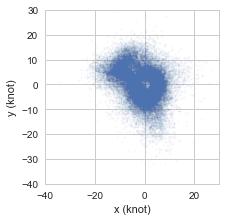

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
%%time
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEbFJREFUeJzt3WlQFOe6B/D/MIASkCUaiTcRI6IiRBY3JBwhRiMaJAoq
RxG90cQIFUvRigFF3MAEY7TKEFDcSkMWJAomFeOGpXBcMAHRq7hEUHBjlW0GkG2e+8GijyPDOC3I
DOT5Vflh3nm7++nB/0z325uEiAiMMY3pabsAxjobDg1jInFoGBOJQ8OYSBwaxkTi0DAmUpcKTUND
A9avXw8XFxe4uLjg66+/RlNTU7v1BwC5XA5vb29UVFS02mf16tUYPHiw0r/169e32v/WrVuYPXs2
HB0d4eXlhbS0tOev7HN8/PHHLWrYvXt3q/0zMjLg4+MDBwcHTJs2DVeuXBHeO378OFasWCG6Bk9P
zxY1HD16VHj/zJkz+PDDD+Hg4IApU6bgwoULKufz+++/w9fXV/TyXxrqQqKiouj999+nrKwsOnv2
LLm5uVFMTEy79SciioiIoO3bt6vtM3PmTIqNjaXi4mLhn0wmU9m3traW3N3dKTw8nHJycigmJoaG
Dh1KeXl5z19hNcaMGUPJyclKNdTU1KjsW1hYSM7OzrR161bKycmhtWvXkouLC1VWVgp9pk2bRhcu
XNB4+XV1dTRkyBA6f/68Ug11dXVERHT9+nWyt7enmJgYysvLo02bNtGwYcOoqKhIaT5nzpwhR0dH
8vHxeYFP4eXoMqF5/PgxOTo6UkpKitCWlJRErq6u1NTU1Ob+RETFxcXk5OREFRUVamsZNWoUpaam
alR3cnIyubq6Un19vdAWEBBAUVFRGk2vikwmo0GDBlFOTo5G/aOjo2nq1KnCa4VCQePGjaP4+Hil
OgMCAjSu4fr16zR48OBWg7p06VIKDAxUWqaPjw+dOHFCaIuKiiJ7e3uaPHmyToWmy2yeXb9+HbW1
tRg1apTQNmLECDx69Ah3795tc38A2L9/P5ydnWFmZtZqHSUlJaioqED//v01qvvixYtwdnaGgYGB
0DZy5EhkZWVpNL0qOTk50NfXh5WVlUb9s7KyMHLkSOG1RCLB8OHDlWoYO3YssrKycPPmTY3mmZub
iz59+sDIyEjl++fPn8ekSZOUlpmUlITx48cLbenp6di3bx8mTJig0TI7SpcJTVFREYyMjNCjRw+h
7bXXXgMAFBYWtrk/AJw+fRpjxoxRW0dOTg4kEgl27twJDw8PfPDBB9izZw8UCoXK/sXFxejdu7dS
W69evVBUVKR2Oc+rwcTEBKGhofjXv/6FKVOmIDk5udX+mtRgZmaGoUOHIjU1VeMaDA0NERgYCDc3
N/j5+QnTymQylJWVwcDAAIsWLcI777yDWbNmtfiiSE5OxvDhwzVd7Q7TZUJTW1uLbt26KbUZGhoC
AOrr69vcv6mpCdeuXYONjY3aOm7fvg09PT1YWVlhx44dmD9/PmJiYrBr1y5RdauqQVO5ubl4/Pgx
XF1dsWvXLkydOhXh4eE4fPhwm2qwsbHB1atXNa6hsrISvr6+2LVrF1xdXREYGIiLFy+iuroaABAZ
GSnUOHToUHz00Ue4f//+C6xxx9LXdgHtpXv37i3+yM2vVW0iiO1fUVGBpqYmWFhYCG2ffPIJMjMz
hdeHDx+Gv78/vLy8YG5uDgAYPHgwKisrsXfvXnz66aca19G9e3eV6+nl5YWHDx8Kr1Vtxn3++ecI
DAwUNiNtbW1x7949xMfHw8vL64VrMDc3x+3bt1XW9azNmzejrq4OJiYmAIAhQ4bgxo0b+PHHH4WR
uMmTJ2P27NkAADs7O6Snp+OXX37B0qVLNVqGtnSZ0Lz++uuoqamBXC4X/lAlJSUAAEtLyzb3l0gk
AKC0mbVhwwY8fvxYeN27d29IJBIhMM1sbGxQWlqKpqYmSKVSpfcsLS2F5TYrKSlRWQMA7NixA42N
jSrfayaVSlvsdw0YMACnT59W2V/TGpqamqCnp9nGiYGBgdJ+WnMNV65cgbm5OQwMDFr8altbWyt9
IeiqLrN5ZmtrCyMjI6Vv/oyMDPTq1UvlDrHY/hYWFtDX10d5ebnQZmlpiX79+gn/9PX1sWHDBsyb
N09p2qtXr+Ktt95qERgAcHZ2RlZWllIQMjIy4OzsrHI933jjDaVlqrJo0SKEhYUptWVnZ8Pa2lpl
f2dnZ2RkZAiviUgYoHhaeXm5sN/3PL6+vvjuu+9U1qCvrw9HR0dkZ2crvZ+bm4u+fftqNH+t0vbw
XXuKiIig9957jzIyMujcuXPk5uamdEylvLycysvLNe7/rOnTp1NcXJzaGtLT08nW1pbi4uIoPz+f
kpOTycnJiX799VciImpsbKTi4mKqra0lIiK5XE5ubm4UGhpKOTk5FBsbSw4ODnT37t0X/hySk5PJ
zs6ODhw4QPn5+bR3716yt7env/76i4ieHEN5+phJQUEBOTo60ubNmyknJ4fWrVtHo0ePpqqqKqX5
+vj40J49e4joyfGl4uJiamxsVFlDdHQ0DRs2jE6cOEF37tyhLVu2KB1/OnXqFNnb21NCQgLl5eXR
xo0bydHRke7du9diXt9++61ODTlLiLR3EdrT3/Ltob6+Hvv27UN6ejoMDAzg7u6OmTNnCpsUERER
AIDw8HCN+j8rKSkJt27dQkhIiNo6/vzzTyQlJaGgoAAWFhbw9vbGuHHjADzZ7FmyZAkWLlwIDw8P
AEBeXh727NmD/Px8WFpaIiAgAA4ODm36LFJSUnDkyBGUlpbC0tISM2bMEIaVr127hsjISKxatQp2
dnYAnvwafv/99ygqKoKVlRXmzZun9MtUU1ODhQsX4uuvv0afPn2QmpqKuLg4bN26VeWvj0KhwKFD
h5CamoqKigr07dsXAQEBsLW1FfqcO3cOBw8eRGlpqcr3mx04cABZWVnYsGFDmz4TsVodudNmYjMy
MrS5eNEKCwvJ0dGRSkpKhLbOtg7P0rT+hIQEmjt3rlLbggULlD4LbXhZn7+6+XaZfZqOYGlpCR8f
H+zfv1/bpXQoIsLPP/+MoKAgoe3ixYvQ09NDr169tFiZdnBoRFq2bBn++OMPtSdsdjVHjx7FoEGD
MHr0aKHNwcEB27Zt02JV2tNlhpw7So8ePVo9SNhVTZo0SemUFwDQ1//n/tfhXxrGROLQMCYSh4Yx
kTg0jInEoWFMJA4NYyJxaBgTiUPDmEgcGsZEUntYt6GhAStXrsSDBw9QX1+PoKAg2NjYIDQ0FBKJ
BAMHDsSaNWugp6eHxMREJCQkQF9fH0FBQRg7dmxHrQNjHUptaH777TeYm5tj06ZNqKiowNSpU2Fr
a4vg4GC4uLhg9erVOHnyJJycnBAfH4+DBw+irq4O/v7+cHNzE665Z6wrURuaiRMnwtPTE8CTM12l
Uimys7OF2x65u7vj7Nmz0NPTg7OzMwwNDWFoaAgrKyvcuHGjzdeEMKaL1IbG2NgYwJNbsS5evBjB
wcHYuHGjcL28sbExZDIZ5HK50q2QjI2NIZfLNSqgvS9E04bOvg5cvzjPPVW1oKAAn332Gfz9/eHt
7Y1NmzYJ71VXV8PU1BQmJibCbXma258OkTq6eF8rMTIzMzv1OnD9rc+3NWpHz0pLSzF//nwsX74c
06dPB/DkVjvNN6pOS0vDiBEj4ODggMzMTNTV1UEmkyE3NxeDBg1qx1VgTHeo/aXZvn07qqqqEBsb
i9jYWABAWFgYIiMjsWXLFlhbW8PT0xNSqRRz5syBv78/iAhLly5tcfM5xroKrd9YozNvGgCdfx24
fvHz5YObjInEoWFMJA4NYyJxaBgTiUPDmEgcGsZE4tAwJhKHhjGRODSMicShYUwkDg1jInFoGBOJ
Q8OYSBwaxkT

Wall time: 8.19 s


## 2.3 Overview by Month

In [41]:
%%time
current_df = df.query('speed>=1')
for month in arange(1, 13): 
    sub_df = current_df[current_df.index.month == month]
    ax = WindroseAxes.from_ax()
    ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
    plt_configure(figsize=(3,3), title='Month: %s'%(month))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXl4W9W1t1/NkiXZljzPczwlhiQkIROZB0hoApQCLZSv
49cBentpS+lX2rSlA9y20BbubWlLGXrhMpYLaSEhA5CEzHNsx/MsW4MtyZKsWTrfH0ZKjJ3ESeQh
4Pd5/Dz2OUf7HB2f39lrr73W2iJBEASmmGKKKwLxRF/AFFNMMXqmBDvFFFcQU4KdYooriCnBTjHF
FcSUYKeY4gpiSrBTTHEFMSXYTwBTM3cfH6YEOw4sX76c0tJSHn744RH3GwwGSktLKS0txWq1xvTc
27dvZ9OmTdG/H3/8cWbOnBnTc7hcLpYtW8aWLVti2u4Uw5kS7DghEonYtm3biPu2bt06Zud99tln
MZlMY9a+y+XiG9/4Bt3d3WN2jinOMCXYcWLmzJl0dXVRW1s7bN+WLVsoLS2dgKu6PA4ePMitt95K
XV3dRF/KJ4YpwY4T5eXl5OTkDOtNu7u7OXXqFGvXrh32mW3btnHLLbdw9dVXs2TJEn73u98RDAaj
+5cvX85f/vIXNm3axNy5c5k1axbf//73cblcANx1110cPHiQ9957j9LSUrq6uqKffeutt1izZg0z
Zszg5ptv5ujRo9F9XV1dlJaW8vjjj5/3O33zm99k2rRp/PWvf72kezLFxTMl2HFk9erVw8zirVu3
ctVVV5Genj5k+0svvcQ999xDVVUVTzzxBHfeeSd/+9vfeOCBB4Yc9+STT+JwOHj00Uf59re/zb/+
9S/++Mc/ArBp0yYqKiqYNWsWL730EqmpqQB4PB4ee+wxvvWtb/H73/8ej8fDvffeG30ZpKam8tJL
L3Hrrbee9/s8//zz/P73v0ev11/WfZli9Egn+gI+Saxdu5annnqK5uZmioqKgEFz+Prrrx9yXCgU
4ne/+x3r1q2LOowWLVqEVqtl06ZNfPnLX6asrAyA9PR0Hn30UUQiEYsWLeL999/nr3/9K3PnzmXJ
kiVoNBri4uK47777eO6554BBr/Gvf/1rrr76agCCwSD33nsvTU1NlJWVIZfLo/vOx7Rp02J2b6YY
HVM97DgyY8YMMjIyeOeddwDo6enh5MmTrFmzZshxLS0tWK3WYWbyunXrADh8+PCQNkUiUfTvlJQU
YLB3dTqdI16HRCKhqqoq+ndWVhbAOY+fYvIwJdhxRCQSDTGLt27dSlVVFRkZGUOO6+/vByApKWnI
dq1Wi1wuj45RAVQq1bBzSCQSFi1axK9+9asRr0OhUCAWn/nXR34Ph8OX+M2mGC+mBDvOrF69mpqa
Grq6uti6deswcxggMTERgL6+viHbHQ4Hfr8/uv98PPDAA+zbtw+73R6bC59iUjAl2HFm1qxZpKSk
8OKLL3LixIlh5jBAQUEBOp1uWCDCW2+9FW3jQmg0Gh566CHa2tqGeJanuLKZcjqNM2KxmFWrVvHM
M89Ex7QfRSKRcM899/DQQw+RkJDAihUrqK+v5/HHH2ft2rWjdvYsWrSIlJQUjh07hkqlwufzjepz
fr+f2tpa0tPTh3mvp5hYpnrYCWD16tUEAoER514j3HnnnfziF7/gwIEDfO1rX+P555/nC1/4Ar/5
zW8u6lw/+9nP8Hg89Pb20tTUNKrPmM1mbrvtNl555ZWLOtcUY49oqqbTx4uuri4+//nPs3Pnzui2
PXv28KUvfYkdO3aQnZ09gVc3xeUyJdgppriCmDKJp5jiCmJKsFNMcQUxJdgppriCmJrW+RgQDocJ
hULRyhKCIER/F4lEQ34kEsmQUMaJYOfOnTzxxBO43W4WLVrEgw8+OGT/vn37eOSRRwiFQmRlZfHI
I4+QkJAwQVc7uZhyOk1iBEEgEAjg9/sJBALRH5/PF90WDAYvOqRQIpEgk8mQyWTI5XLkcnn0b5lM
hkKhQCodm3d5Z2cnn/3sZ3nllVdISkri7rvv5qtf/SpLly4FBhMfli1bxtNPP01RURG/+c1vEIvF
3HfffWNyPVcaUz3sJEEQBPx+P263m4GBAQYGBnC73YTDYcRicfRHKpUilUpRqVQkJCSgUCiioouI
TCwWEwqFOH78OFdffTUikQhBEAgGg/j9fnw+X1T0kXNGhB8OhxEEAZlMRlxcXDTbJy4uLiYi3rZt
GzfccEM0IOOxxx5DLpdH90skEnbs2IFMJsPv92Myma7I5P6xYkqwE0QwGMTpdA4Tp1QqRSaToVKp
SEpKIiEhAZlMdlnnigT3SyQSFAoFWq32nMcKgoDH46G/v5+BgQF6e3sJBAKEw+EhIlar1Wg0mos2
r9vb25HL5XzpS1/CbDazfPlyvv3tbw85RiaTcfr0ab74xS8ik8mmetezmBLsOOLz+bDb7dhsNgYG
BqKmaVxcHCkpKSQkJCCRSCb0GkUiUbRHPRu/34/NZsPhcGCxWOju7kYkEpGQkEBiYuKorz0UCrF7
926ef/551Go13/jGN3j99de5+eabhxxXXl7Ovn37eOGFF/j3f/93XnzxxZh+zyuVKcGOIYIg4Ha7
sdls2O12fD4fMpkMjUZDVlbWeXu6yYZcLictLY20tDRg0NFltVrp6+ujo6ODUCiEWq1Gr9dHTfWR
SE5OZv78+dHUwRUrVnDy5MmoYN1uN/v372f58uUAbNy4kV//+tfj8A2vDKYEG2MEQYiakna7nXA4
jEKhIDExkbS0tMs2bycLYrGY5ORkkpOTARgYGMBsNmM0Guns7EShUKDT6UhJSRkyRl22bBn3338/
/f39aDQa9uzZExUngFQq5cEHH+Tpp5+mtLSUf/3rX1xzzTXj/v0mK1Ne4hgRCoWw2WyYTCZ8Ph8K
hYKkpCRSU1OHJIuP5/VEnE7jbWb7fD5MJhN2u51AIEBCQgKpqalotVpEIhGvvvoqzzzzDIFAgPnz
5/OjH/2IH//4xyxfvpwVK1awf/9+HnnkEcLhMOnp6fzsZz+L9uyfdKYEe5l4vV7MZjO9vb2IxWIS
ExPJysqa8J50IgV7Ni6XC4PBwMDAAFKplLS0NJKSksZs2ujjztRduwQEQcBut2MymRgYGECpVJKX
l4der5/woITJhkajobS0lFAoRE9PD0ajEYPBgF6vJzU1dZhza4rzM9XDXgSCIGC1WjEYDIRCITQa
DTk5OSiVyom+tGFMlh52JGw2G93d3Xi9XjQaDdnZ2ajV6om+rCuCqR52FAiCgMPhoLOzk0AggE6n
IycnZ9IJ4UpBp9Oh0+nweDy0t7dTV1cXHUpMxpffZGJKsBfA5XLR2dmJx+MhMTGRvLy8KaHGCJVK
RVlZGR6Ph9bWVmpqakhKSiIzM3OIZ3mKM0wJ9hx4PB66urpwOp1otVpmzJgx4Y6kjysqlYqKigpc
LhdtbW1UV1eTmppKenr6lHPqI0zdjY8QDAbp7OzEarUSFxdHeXn5sNq/U4wNGo2G6dOnY7Va6erq
wmKxkJGRQVpa2pQz70OmBHsWNpuN9vZ2xGIxJSUlxMfHT/QlfSLR6/Xo9Xq6u7vp6enBarVSWFg4
Nb5lSrDAYK/a3t5Of38/KSkpZGVlTUiwwxRDyczMJDU1laamJmpra8nMzPzE97afeMHabDba2tqQ
yWRT5m8Mue+++6ipqYn2ivfccw+rVq2K7jeZTHz3u9+lt7eXlJQUHnvssWFLk8BgqGJZWRm9vb3R
oconubf9xM7Dnt2rpqWlkZmZ+bF6c0/0POzq1at5+eWXz7msyDe+8Q1WrVrFTTfdxKuvvsrevXt5
9NFHz9tmKBSiqamJgYGBT2xvO2nsvsgiwu+///6Q7cuXLx+yEHEgEGDmzJlYrdbotrvuuotbbrkl
+nd/fz8zZ87

Wall time: 18.7 s


In [42]:
df.describe()

date          HrMn           dir         speed  dir_windrose  \
count  4.206600e+04  42066.000000  42066.000000  42066.000000  42066.000000   
mean   2.013044e+07   1153.544430    179.874592      8.447488    237.262920   
std    1.405171e+04    691.989734     98.737423      4.375064    208.025899   
min    2.011010e+07      0.000000     -4.978698      0.005481      0.000000   
25%    2.012033e+07    600.000000    110.516651      5.156952    110.000000   
50%    2.013062e+07   1200.000000    167.650918      7.482294    200.000000   
75%    2.014092e+07   1800.000000    269.171783     11.220914    300.000000   
max    2.015123e+07   2300.000000    354.999753     34.535472    999.000000   

                  x             y  
count  42066.000000  42066.000000  
mean      -1.553747      0.376113  
std        6.507981      6.752294  
min      -34.524102    -32.472160  
25%       -6.005882     -4.253203  
50%       -0.962347      0.459120  
75%        3.482725      5.152950  
max       27.009530     29.545306

# 3. Create input data and configuration

In [43]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [44]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0
   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17]


In [45]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [46]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [47]:
%%time
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH
    from sklearn.grid_search import GridSearchCV
    # from sklearn.model_selection import GridSearchCV  ## too slow

    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1.1,0.1)

    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    
print(bandwidth)

1.1
Wall time: 0 ns


In [48]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.1 1225
[  7.58432771e-08   3.20539294e-07   6.95667192e-07   1.13492786e-06
   1.99381126e-06]


In [49]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWmQI+d5JvgkjsQNFOqurq4TTQ49kqgm25TGIVEz23aH
Za3GtKZDPLzrsS2uLdu78tqWj7a0knupJptyxHK0Ybe5PpYbM9Rq1TJjLAUtx4xFURMKM3yQTbXt
JkWKrAtAFc7CUbjz3B/oLyszkQlkAokqoJhPREdXAV+++RUy88F7v5QoiiJs2LBh44TCcdwbsGHD
ho1hwiY5GzZsnGjYJGfDho0TDZvkbNiwcaJhk5wNGzZONGySs2HDxomGTXI2bNg40bBJzoYNGyca
NsnZsGHjRMMmORs2bJxo2CRnw4aNEw2b5GzYsHGiYZOcDRs2TjRskrNhw8aJhk1yNmzYONGwSc6G
DRsnGjbJ2bBh40TDJjkbNmycaNgkZ8OGjRMNm+Rs2LBxomGTnA0bNk40bJKzYcPGiYZNcjZs2DjR
sEnOhg0bJxo2ydmwYeNEw3XcG7Bx/BBFEQzDgOM4OJ1OuN1uOBwOUBR13FuzYWNgUKIoise9CRvH
h1arhXK5jFAoBJZlAQB7e3uIRqMIhUJwOBw26dkYa9ia3DsYPM+j0Wggl8shEAiA4zi43W6IoghR
FMHzPDiOA8MwoCgKTqfTJj0bYweb5N6BEEURHMeB53lQFAWe57GxsQGe5+FyuSAIAur1OjweD1yu
w1uEkF6r1YLD4YDT6YTT6YTL5bJJz8bIwjZX32EQBAEsy4Jc9lQqhUKhgOXlZdA0DYZhkE6nQVEU
WJaFy+WC3++Hz+eD3++H0+lUyCNyKIqSyM7lcnWss2HjuGBrcu8QEPOT53kAAMdxSCaTEAQBbrcb
oVAIDMPA6/XC7XYjEokgEAig1WqhXq+jXC4jk8lIpEeIT05mHMdBFEW0Wi1ks1nMzc2Bpmmb9Gwc
K2ySewdAEARwHAdBEEBRFCqVCnZ3dzE5OYlwOIx4PK5YT1EURFEERVHwer3wer2YnJyEKIpoNpto
NBoolUpIp9Nwu90S4clJr1argWEYifSIeWtrejaOGjbJnXAQPxoJJqTTaRwcHGBpaUnS1Ix6LCiK
kshMTnr1eh2lUgmpVAo0TcPv90MURYlUgUM/oE16No4aNsmdUAiCAJ7nIQgCAIBhGCQSCdA0jVgs
JgUUBgkWyEmPnJNoeoIgIJFIwOPxSP48n88Hh6Odf26Tno2jgk1yJxCCICCfz6NcLmN5eRnFYhHp
dBqzs7OYnJzsIDa1JkfMVbNwOBySv+7g4AALCwtSpLZQKKDZbMLj8SjM226kV61WEQ6H4fF4bNKz
0TdskjthIOYp0CaOZDKJRqOBtbU1eL3ejvXDTPtwOBzwer3w+/0A2uTbaDTQaDSwv7+PVqsFr9cr
aXper1dBetlsFi6XCxzH2Zqejb5hk9wJgTr3jWVZVKtVTExMIBaLSeShdywwXMID2qQXCAQQCAQA
HJJevV5HPp+XSI9oeiT4QTRLPfOWpmk7R8+GLmySOwFQ577l83lks1nQNI3FxcWux2qRQ7/mqlmo
SY9UYJAqDI7jkE6nEQgEJE2vVyCD1N7apGeDwCa5MQfR3oA2Sezu7oLjOMzPz+Pg4MCQjFHJB3c6
nQgGgwgGgwCAzc1NhMNhMAyDbDYLlmUVmp4W6bEsi2azKZEeRVFwu922efsOhk1yYwq1eVqtVpFM
JjExMYHl5WXUajVD5KWn8VhBfIPKoCgKfr8fExMTAA41vXq9jkwmA47jJNLz+/3weDwdpJdKpSQZ
tqb3zoRNcmMIee4bAGQyGRSLRSwuLiIUCknr+iUZKwhgGCSi1vQ4jpNIL51Og+M4RbqKx+OR9qKn
6dmkd/Jhk9wYQRRF7O/vw+12w+v1gmVZJJNJUBSFWCwGt9strTX60B6V/20YcLlcCIVCErHLSa9U
KoHneSng4vF4FAEKOekRnx4hPpv0ThZskhsTkNKsYrEo+al2d3cxPT2N6enpjodyUPIaR+LTIr29
vT3pf57nFc0G5KQnCIIUwJGTnsvlgsvlsklvjGGT3BiA53mpoSUAFItFMAyDlZUVKQetX8jrVOWv
nQQQgiLEx7KsQtMTBEEiPL/fr9Dg5KTHsiwqlQrm5uZs0htD2CQ3wlAHF5rNJqrVKjweD86cOdM1
YjjOZuiw4Ha74Xa7EQ6HAQAsy6Jer6PRaKBQKEAURYWmR0iP4zjU63XJvKUoytb0xgg2yY0o5J1D
AKBQKCCTycDr9SISifRMiTBKcnIfldljxx2kpVQkEoEoigpNr1AoAAB8Pp/USFSu8co1PZv0Rhs2
yY0g5LlvgiBgb28PzWYTa2tr0sP3ToBVaSxGCIeiKNA0DZqmFaRXr9dRqVTQarWwtbWlqekBNumN
MmySGyGozdN6vY5EIoFQKCSVZpnR0My0UBqG5maFzOMiBznpud1uFAoFzM3NoV6vo1arIZ/Pw+Fw
KFJW9EgPaKe/kGRmeT6fjeHDJrkRgTr3LZfLIZ/P49SpU4hEIn3JHCRPzopE3pMCURSlGlmapjEx
MSGNcazX66hWq8hms3A6nYpAhlyDEwQB2WwWgUAAoVBIMRSIVGbYGA5skjtmiKKIWq2GVCqF5eVl
8DwvtSWPxWKgaVqx3qyvzQhOsg/OqLlqFhRFwePxwOPxIBqNKkivUqlIpCdvFS9vOKCl6ZGhQDbp
WQub5I4RJLhAJmCRtuTRaBSzs7MDFc+fZOI6ahghSi3Sa7VaaDQaODg4QCaTkbolA4cBDbV5yzAM
AHQMBbJJr3/YJHdMkJunpDXS7u4uTp8+LZUtacEMeZn1yan/t9FGP5+FfD4GIb14PA6Xy9UxFEg+
CY2QGRk6pJ55a5Oeedgkd8TQ6vuWTCYhiiLOnDmjmHPaTUYv2A9BG1aZq4PKIBHXcDgszcAgreLL
5TLS6TRomlYEMvRIL5VKYWFhQTEJzb7e+rBJ7gihnppVLpext7eHyclJacZpLwyrJtXW3PQxDL+e
maFA8kloFEWh0WhIVTC2ptcbNskdEeS5b6IoYm9vD7VaDaurq1KKghEMw5TUqnslvqNBYBOnEt3I
sttQoGKxiFQqJQ0FIonJ5DjANm+7wSa5IUOrNCuRSMDn8yEWi8HpdILnectz2sySIXF6yzuZnAQc
ZUKxlXLkQ4GmpqYk0qvX6xBFEdvb25pDgeSkx3GcTXqwSW6oUBfW7+/vI5vNYn5+HtFoVHp9GIm7
ZkkukUhI2gBJZSDTtfp5IKwiBSswKg/0IGQpJ71CoYD19XW0Wi3U6/WeQ4EAbdJrtVoIBoMnviLD
JrkhQBRF8DyP1157DWfOnAEA7O3tgWEYrK+vS80cCY7Tf3ZwcACO4zAxMYHJyUnwPI9cLodmsyk1
oiQPl7qU6Z2CYeXa9QNy7eWkB+gPBepGetvb21hZWZESkklyslwjPAmwSc5iqAvra7Ua0uk0wuEw
Tp8+3XNqlpF8LCOQF95rHSOKIjKZDMrlMlwuF6LRqPQN7/F44HA4MDs7q1m0Lk9wHbZ5O+jDNkp+
QSvIUp5QLEe3SWi5XA4MwyhaxXu9XoiiKDV60NL0iEY/7qRnk5yFUJdmkeL6xcVFqb2PFshNa5Tk
zGp9apksyyKRSMDhcCAWi2Fzc7NDJvld3p5IXrQuL2WSa3qjODDGKmIZFFaSXC90m4SWzWbBMAxE
UUSxWOyYhEbWcxzX0Sp+HEnPJjkLQMxTjuOk/mMk9215eblrcq9aTi+Y9d+pQaoqpqampI7CWtFV
PXnq+k3iFyIJrm63G36/HzzPWxKhPUk4SpJTQ2s+xubmJnie7xgKJJ+Epg5ktFotUBTVUZExyrBJ
bkCoc98IiUx

## 4.1 Bootstrap GOF limit

In [50]:
kde_cdf = cdf_from_pdf(kde_result)
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

In [51]:
%%time
gof_kde=Parallel(n_jobs=-1)(delayed(resampled_kde)(df, kde_result, config) 
                                       for i in arange(20)) 

Wall time: 20 s


In [52]:
for gof_name in [ 'R_square', 'K_S','Chi_square']:
    plt.figure(figsize=(4,3))
    pd.DataFrame(gof_kde)[gof_name].hist()
    plt_configure(title=gof_name)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQkAAADXCAYAAAAJK6SPAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE4tJREFUeJzt3X9U1fUdx/HnBeQ3E3W46VBCU8dIDXS1Zv7A+assJw5T
8dApXCtLW4YH0jhALRBO9sOcS81czpnlWsecnlNHjcizPLoxteUoJjISXf4AUX6NX373R8e72eJz
sd0fX+P1+Osi3/vh/b4XXn6/3/u99+2wLMtCRKQTfr4uQETsTSEhIkYKCRExUkiIiJFCQkSMFBIi
YhTg6wLkcxMnTuTkyZNX/FtoaCjf/e53yczMJCEhwUeVSXfn0HUS9jBx4kTmzJnDrFmzALAsi88+
+4xnn32WsrIy9u7dS3h4uI+rlO5Ihxs2EhYWRlRUFFFRUfTt25cRI0ZQWFhIXV0dBw4c8HV50k0p
JGwuMDAQAH9/f5fbHjt2jLS0NBISEvjBD37A448/TlNTk/P7GzduZNy4cSQmJlJQUMCiRYtYvXo1
AI899hgPP/zwFetNnDiR3/72twC0t7fz3HPPMXHiROLj4/nhD39Ifn4+HR0dzvsvXbqU2bNnc9NN
N/HBBx/Q1tbGypUrGTNmDKNGjWLBggUcP37cLY+LeI9CwsZqa2vJz88nKiqK0aNHu9w+IyOD/v37
89Zbb7Fu3Tr279/P+vXrAfjd737H6tWrycrK4vXXX+fUqVOUlJR0uZYNGzbw1ltvUVhYyDvvvENm
ZiZbtmzh3XffdW6zc+dO5s+fz6ZNm0hISOCFF17g/fff5/nnn2fbtm3ExsaSlpZGfX391T8Y4jMK
CRspLCwkISGBhIQERo4cybhx46ipqeHXv/51l85HVFdXExkZSf/+/Rk5ciQvvvgiM2bMAGDr1q3M
nTuX6dOnM2TIEAoLCwkJCelybddffz0rVqzgpptuIjo6mpkzZzJ48GDKy8ud28TGxjJz5kzi4uJw
OBy88sor5OXl8f3vf5/BgweTnZ1NeHg4O3bsuPoHR3xGr27YyP3338+MGTNobW3l1VdfZffu3Sxa
tIghQ4Z06f6LFy+mqKiIN998k1tvvZXJkydz2223AVBRUUF6erpz2/DwcIYNG9bl2iZNmsTBgwd5
+umnqayspLy8nBMnTjBlyhTnNgMGDHDe/vTTT2ltbSU9PR2Hw+H895aWFh1yXGMUEjbSq1cvYmJi
AMjNzaW2tpaFCxeyY8cO+vXr5/L+99xzD9OmTWPv3r3s27ePzMxM9u3bx4oVKwgODubSpUtXbH/5
fAdwxR/yZe3t7c7bv/zlL9m0aRM/+clPmDJlChkZGWRkZFyxfXBwsPP25XMVGzdupE+fPldsp1dp
ri063LCx3Nxc/P39ycvLc7ltS0sL+fn5tLW1MX/+fNauXUtOTg67du0CYOjQoRw5csS5fWtrK598
8onz6x49etDY2Oj8urGxkdraWufXL7/8MllZWTz22GPMnDmT6OhoTp06RWevoA8cOJCAgABqa2uJ
iYkhJiaGAQMGsGrVqivqEPtTSNhY7969ycjI4L333mPPnj3GbYOCgvjLX/7Ck08+SXl5ORUVFeze
vZsRI0YA8LOf/Yxt27bxxhtvcPz4cZ544gnOnj3rvP/w4cP585//TElJCcePHyc7Oxs/v//8enzr
W9+ipKSEqqoqjh49ys9//nMuXLhAa2vrl9YTFhbGvHnzyM/Pd94vLy+P4uLiLh8+iT0oJGwuJSWF
hIQECgoKaG5uNm77/PPP4+fnR2pqKikpKQQGBrJy5UoAxo4dS05ODmvWrGHWrFmEhIQQFxfnvO+P
f/xj7rjjDpYsWcL8+fOJi4sjMTHR+f3CwkKqq6u58847eeihh4iOjiYlJYWjR492Wk9mZiZTp05l
+fLlzJgxg/LycjZs2HDFuQuxP11x2Y3NmjWLpKQkFi9e7OtSxMZ04vIaUVtb6zwZ+GVCQ0MJCwvz
YkXSXSgkrhGpqalUVlZ2+v377ruPpUuXerEi6S50uCEiRjpxKSJGCgkRMVJIiIhRl05crlu3jnff
fZe2tjbmzZvH7NmzPV2XiNiEy5A4cOAAhw4dYuvWrTQ3N7Nx40Zv1CUiNuHy1Y1nnnkGh8PB3//+
dxoaGsjMzGT48OHeqk9EfMzlnsT58+c5deoUa9eupbq6moULF/L2229/6bsGReTrx2VIREZGMmjQ
IAIDAxk0aBBBQUHU1tb+z9t/LystLXV7kSLSNaNGjXL7mi5DYtSoUfzmN7/h3nvv5cyZMzQ3NxMZ
GenyPr5SWlrq05/vSnl5OfcX7iG813fctmbD+ZOse2wS9fX1tu7d0+z+3Huap/6DdhkSSUlJ/OlP
fyIlJQXLssjJyenSh7KKyNdDl14CzczM9HQdImJTuphKRIwUEiJipJAQESOFhIgYKSRExEghISJG
CgkRMVJIiIiRQkJEjBQSImKkkBARI4WEiBgpJETESCEhIkYKCRExUkiIiJFCQkSMFBIiYqSQEBGj
Ln3GZXJyMuHh4QBER0ezYsUKjxYlIvbhMiRaWlqwLIvNmzd7ox4RsRmXhxsff/wxzc3NpKenc/fd
d3P48GFv1CUiNuFyTyI4OJgFCxYwe/Zs/vGPf3Dffffx9ttvExDQpSMVEbnGufxLj42NJSYmBofD
QWxsLJGRkZw9e5Z+/fp1eh9fj/rz9c83qaqq8si6H330ETExMbbu3Ru6e/+e4DIk3njjDcrLy8nL
y+P06dM0NDQQFRVlvI/G/HUuIiICdn7m9nVvuOEGjfmz+XPvaT4b85eSksKyZcuYN28eDoeDgoIC
HWqIdCMu/9oDAwN55plnvFGLiNiQLqYSESOFhIgYKSRExEghISJGCgkRMVJIiIiRQkJEjBQSImKk
kBARI4WEiBgpJETESCEhIkYKCRExUkiIiJFCQkSMFBIiYqSQEBEjhYSIGCkkRMRIISEiRl0KiZqa
GsaPH09FRYWn6xERm3EZEm1tbeTk5BAcHOyNekTEZlyGRFFREXPnzqVv377eqEdEbMY4d+PNN9+k
d+/ejB07lvXr13d5UV+PWvP1zzfRmD/P6u79e4IxJH7/+9/jcDjYv38/ZWVlZGVl8eKLL2rM3/9B
Y/48x+7Pvaf5ZMzfli1bnLfT0tLIy8tzGRAi8vWil0BFxKjLk383b97syTpExKa0JyEiRgoJETFS
SIiIkUJCRIwUEiJipJAQESOFhIgYKSRExEghISJGCgkRMVJIiIiRQkJEjBQSImKkkBARI4WEiBgp
JETESCEhIkYKCRExUkiIiJHLz7js6OggOzubyspKHA4HTzzxBEOHDvVGbSJiAy73JIqLiwF47bXX
eOSRR3juuec8XpSI2IfLPYlJkyYxYcIEAE6dOsU3vvENT9ckck3r6OjwyHDtwYMH4+/v7/Z1XenS
R+oHBASQlZXF7t27eeGFF1xu7+tRa77++SYa8+dZdui/qqqKoi0fEtrTffNzmy6cIWv+CGJiYty2
Zld1ee5GUVERS5cu5a677mLXrl2EhoZ2uq3G/HVOY/48xy7PfUREBKE9PyO813fcuu4NN9xgPB/o
qYB0eU5i+/btrFu3DoCQkBAcDgd+fnpRRKS7cLknMWXKFJYtW8b8+fNpb29n+fLlBAcHe6M2EbEB
lyERGhrKqlWrvFGLiNiQjhtExEghISJGCgkRMVJIiIiRQkJEjBQSImKkkBARI4WEiBgpJETESCEh
IkYKCRExUkiIiJFCQkSMFBIiYqSQEBEjhYSIGCkkRMRIISEiRgoJETEyfsZlW1sby5cv5+TJk7S2
trJw4UJ+9KMfeas2EbEBY0js2LGDyMhInn76aerq6pg5c6ZCQqSbMYbEtGnTmDp1KgCWZXlkxJi7
R6JVVVVx440

## 4.2 Bivariate Empirical Limit

In [55]:
gofs_bivar

Empty DataFrame
Columns: []
Index: []

In [56]:
%%time
gofs_mean_set_bivar = []
fig1, ax1 = plt.subplots(figsize=(4,3))
fig2, ax2 = plt.subplots(figsize=(4,3))

for year_length in [5, 10]:
    start_year, end_year = df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):'2015']
    speed_ = array(list(zip(df_standard.x, df_standard.y)))
    kde_current = neighbors.KernelDensity(bandwidth=bandwidth, kernel=KDE_KERNEL).fit(speed_)
    kde_result_standard = exp(kde_current.score_samples(points))
    gofs_bivar=Parallel(n_jobs=-1)(delayed(kde_gofs)(df_all_years, start_year, start_year+year_length-1, kde_result_standard, config) 
                                   for start_year in arange(start_year, end_year+1)) 
    gofs_bivar=pd.DataFrame(gofs_bivar, index=arange(start_year, end_year+1))
    if len(gofs_bivar)>0:
        gofs_bivar.plot(y='R_square', ax=ax1, label=year_length)
        gofs_bivar.plot(y='K_S', ax=ax2, label=year_length)
        year_lim = end_year-year_length-10, end_year-year_length
        gofs_mean = gofs_bivar.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set_bivar.append(gofs_mean)
    
align_figures()
display(pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim'))

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASIAAADECAYAAAA71CydAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtcVAX+//EXzDCIzHDxrslFVBRRhNFUMi+lpluWS4pc
HspqbVtteat2W7a8PBL82u+3bV/U1G9Fl1/fVNDMwjZrNZTWyGpkEFA0QPEaiogwXGaYmfP7g+/y
zW0NQ2AY+Dz/cjhnDu8zMG8/M5wzx0VRFAUhhHAgV0cHEEIIKSIhhMNJEQkhHE6KSAjhcFJEQgiH
kyISQjjcLRVRbm4uCxcu/MnXv/jiC+bOnUtMTAzp6ekA2O12Vq1aRUxMDAsXLqS0tBSA0tJS4uLi
iI+PZ/Xq1djtdgDS09N5+OGHmT9/PpmZma21X0IIZ6I04/XXX1dmz56tREdH3/B1i8WiTJ8+Xams
rFTMZrPy8MMPK1euXFE+++wz5fnnn1cURVFycnKUJ554QlEURXn88ceVr7/+WlEURVm5cqXy+eef
K5cvX1Zmz56tmM1mpaqqqunfQoiupdmJyN/fn40bN/7k68XFxfj7++Pt7Y1Go2HMmDF8++23GAwG
Jk2aBEB4eDj5+fkAFBQUMG7cOAAmT57MV199xbFjx4iIiECj0aDT6fD396ewsLA1e1YI4QTUza0w
c+ZMzp8//5Ovm0wmdDpd021PT09MJhMmkwmtVtv0dZVKhdVqRVEUXFxcmtatrq6+6TaaYzAYml1H
CNE2xowZ0+rbbLaIbkar1VJTU9N0u6amBp1O95Ov2+121Go1rq6uN6zr5eV1023cirZ4MNqSwWBw
qszOlhckc2sruXCd/9xxlNMXq+jp3Y2no8Nxqf3pUNIaWvxXs8GDB1NaWkplZSUWi4XvvvuOiIgI
9Ho9WVlZABiNRoKDgwEYMWIER44cASArK4uxY8cSFhaGwWDAbDZTXV1NcXFx0/pCCMdosNr5730n
eOY/D3H6YhX3jQ/gtT/cy9iQvm32PX/xRJSRkUFtbS0xMTH86U9/4tFHH0VRFObOnUvfvn2ZMWMG
hw8fJjY2FkVRWLduHQDPP/88K1eu5K9//StBQUHMnDkTlUrFwoULiY+PR1EUVqxYgbu7e6vvpBDi
1hSdqyQlLYczl6ro5ePBkuhw9MP7tPn3dVEU5zv7viOPszfjbJmdLS9I5tvRYLWx/fOTfJBZhN2u
MCsykMWzR9C9m9sN67VV3ha/RySE6BxOnb1GSloOZ3+opo+vB0vnRzA6uHe7ZpAiEqKLsjTY2PZZ
IR8eLMKuwP13BfKbB346BbUHKSIhuqDC0gpSduRw/rKJvj26szQmnLAh7TsF/ZgUkRBdiLnBxvv7
CvnoUOMUNPvuQSTcPwIPd8dWgRSREF3EidMVpKQd5cKVGvr39GRpTDgjB/dydCxAiqjVRUVFNR1Z
PnDgQP7jP/7DwYlEV1dvsfLfnxby8ZfFADw0OYiFvwqhm6bjPP07TpJW9FZGAYdzL7TqNieOvoNH
Hgz92XXMZjOKovDee++16vcWoqUKSq6SkpbDpfIaBvTyZFlsBCMG9XR0rJ/olEXkKIWFhdTV1fHI
I49gtVp55plnCA8Pd3Qs0QXVm628+7fjfHL4NAC/njKYBb8Kwd1N5eBk/16nLKJHHgxtdnppC926
dePRRx8lOjqaM2fO8Nhjj7Fv3z7U6k75MIsOKq+onA3pOfxwtZaBfbQsi4lgeGAPR8f6WfIMaUWD
Bg0iICAAFxcXBg0ahI+PD1euXKF///6Ojia6gDqzlXf2FvC3r87g6gJz7xlC/MzhaDroFPRjUkSt
aNeuXZw6dYo1a9ZQVlaGyWSid2/HHZshuo7cU1fYsNPI5Ypa/PrqWB4bQbC/r6Nj3TIpolY0b948
EhMTiYuLw8XFhXXr1snLMtGmausbeHvvcfZln8HV1YXoaUOJu28YbuqOPwX9mDxLWpFGo+GVV15x
dAzRRRw9eZlNO41cuVZHQD8dy2P1DPHzcXSsFpEiEsLJ1NQ18FZGAZ8fKUXl6kLMjGBipg/DTe28
F+WRIhLCiRgKy9iUbqT8ej2DBnixLCaCwQOdcwr6MSkiIZyAqa6B1I/y2f/tWVSuLsTfN4x504Kd
egr6MSkiITq4b4//wKaduVRU1RN0hzfLYyMYNMDb0bFalRSREB1Uda2FN/bkkWk4j1rlwoJZw5l7
71DUqs4xBf2YFJEQHdCR/Eu8tiuXa9Vmhgz0ZnmsnoD+Xo6O1WakiIToQKpqGqegg0fPo1a5knB/
CA9PHYKqE05BPyZFJEQH8dWxi2zZfYzKajPB/j4si4nAv1/nnYJ+TIpICAe7bjLzXx/m8aXxAm5q
VxbPHsGcyYM7/RT0Y1JEQjhQwdlaXv34C66bLAwP8GVpTAR+fW/tasediRSREA5QWW1m6+5jHD5W
gUbtyqMPhfLgpMGoXF0cHc0hpIiEaEeKovAPY+N7QdW1Fvx6a3jh0Unc0Vvr6GgO1WwR2e121qxZ
w8mTJ9FoNCQlJREQENC0fM+ePaSmpqLT6YiKiiI6OhqLxUJiYiLnzp1Dq9WyatUqAgMDKSgoYPXq
1Wg0GkJCQnjhhRdwdXUlKSmJo0eP4unpCcDmzZvR6breeCo6t2tV9WzZfYzsvEto3FQ8Nmck/T2u
dfkSglsoov3792OxWEhLS8NoNLJ+/Xq2bNkCQEVFBRs2bGD37t14eXmxaNEiIiMjOXjwIN27dyc9
PZ2SkhLWrl1LamoqK1eu5MUXX0Sv1/Pqq6+SkZHBnDlzKCgo4M0336RHj479KXJCtISiKBw6ep7X
9+RRXdtAaFBPlsaEM6CXFoPB4Oh4HUKzRWQwGJg0aRIA4eHh5OfnNy07f/48w4YNw8en8aS7UaNG
kZubS1FREZMnTwYgKCiI4uLGqweUlZWh1+sB0Ov1HDhwgAcffJDS0lJWrVpFeXk58+bNY968ec0G
d8YfoLNldra80PEyV9fZ2PvNNU5eqMdN7cKvxvhwZ3A3LpWe5FJp4zodLbMjNFtEJpOp6fI4ACqV
CqvVilqtJiAggKKiIsrLy/H09CQ7O5vAwEBCQkLIzMxk+vTp5ObmUlZWhs1mw8/Pj2+++YZx48aR
mZlJXV0dtbW1LFiwgMWLF2Oz2UhISGDkyJEMHz78Z3ONGTPm9ve+HRkMBqfK7Gx5oWNlVhSFTMM5
Xt+XT01dA2FDerFkfjj9enresF5Hynwr2qo0my0irVZLTU1N02273d70qYPe3t4kJiayZMkSfHx8
CA0NxdfXl6lTp1JcXEx8fDx6vZ7Q0FBUKhXr1q0jOTmZ1157jbFjx6LRaPDw8CAhIQEPDw8AJkyY
QGFhYbNFJERHdfV6HZt25vLdiTI83FX8fm4YMycE4tpF/yJ2K5o9Ykqv15OVlQWA0WgkODi4aZnV
auX48eNs27aNlJQUSkpK0Ov15OXlERkZyfbt25k1axZ+fn4AHDp0iL/85S+8++67VFZWMnHiRM6c
OUNcXBw2m42GhgaOHj1KaGj7X4FDiNulKAr7vynlqf/zBd+dKCN8aG82Pncvv7prkJRQM5qdiGbM
mMHhw4eJjY1FURTWrVtHRkYGtbW1xMTEAI1XN3V3d2fx4sVNbzinpKSwdetWdDodycnJAAQEBLBo
0SI8PDwYP348U6ZMAWDOnDnMnz8fNzc35syZw9ChQ9tqf4VoE1eu1bFpp5GjJy/j4a7m6ejR3De+
8YouonkuiqIojg7xSznb62pwvszOlhcck1lRFD4/UkrqxwXUma3oh/XhqejR9PHtfkv3d7bHua3y
ygGNQrTQ5YpaNu40Yjx1he7d1CydH870cf4yBbWAFJEQv5CiKOz7upS3M/KpM9sYG9KXp+aNppeP
h6OjOS0pIiF

Chi_square  K_S  MSE  RMSE / Max  RMSE / Mean  R_square
year_lim                                                             
(1996, 2006)         NaN  NaN  NaN         NaN          NaN       NaN

## 4.3 Univariate GOF Limit

In [57]:
def yearly_gof(df_all_years, start_year, end_year, density, y_ecdf, x, density_dir):
    df_previous = df_all_years[str(start_year):str(end_year)]
    # 1. Speed
    density_expected, _ = np.histogram(df_previous['speed'], bins=x, density=True)
    r_square = sector_r_square(density, density_expected)
    
    y_ecdf_previous = sm.distributions.ECDF(df_previous['speed'])(x)
    k_s = max(np.abs(y_ecdf - y_ecdf_previous))
    
    # 2. Direction
    density_dir_expected, _ = dir_hist(df_previous['dir'], bins=arange(-5,370,10), density=True)
    r_square_dir = sector_r_square(density_dir, density_dir_expected)
    return {'year': start_year, 'r_square': r_square, 'k_s': k_s, 'r_square_dir': r_square_dir}

k_s  r_square  r_square_dir
year_lim                                 
(1996, 2006)  NaN       NaN           NaN

Wall time: 365 ms


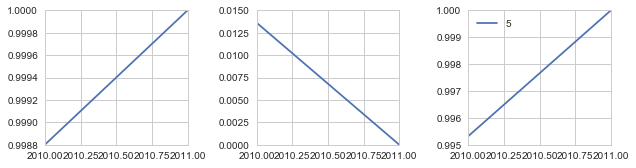

In [62]:
%%time
x = arange(0, df.speed.max() + 1)
fig = plt.figure(figsize=(9,2.5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
gofs_mean_set = []

for year_length in [5, 7, 10]:
    start_year, end_year =df_all_years.index.year[0], 2015-year_length+1
    df_standard = df_all_years[str(2015-year_length+1):str(2015)]
    density, _ = np.histogram(df_standard['speed'], bins=x, density=True)
    density_dir, _ = dir_hist(df_standard['dir'], bins=arange(-5,370,10), density=True)
    y_ecdf = sm.distributions.ECDF(df_standard.speed)(x)
    gofs = [yearly_gof(df_all_years, start_year, start_year+year_length-1, density, y_ecdf, x, density_dir) 
            for start_year in arange(start_year, end_year+1)]
    if len(gofs)>0:
        gofs = pd.DataFrame(gofs)
        gofs.set_index(['year'], inplace=True)  
        ax1.plot(gofs.r_square, label=year_length)
        ax2.plot(gofs.k_s, label=year_length)
        ax3.plot(gofs.r_square_dir, label=year_length)
        year_lim = end_year-year_length-10, end_year-year_length
        gofs_mean = gofs.query('index >= @year_lim[0] & index <= @year_lim[1]').mean().to_dict()
        gofs_mean['year_lim']=year_lim
        gofs_mean_set.append(gofs_mean)
plt.tight_layout()
plt.legend()
for ax in [ax1, ax2, ax3]:
    plt_configure(ax=ax, tight='xtight')
    
display(pd.DataFrame(gofs_mean_set).set_index('year_lim'))

# 5. GMM by Expectation-maximization

In [63]:
sample=SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [64]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.392  -1.081  -4.889  4.453  5.444  -0.409
2  0.316   3.965   0.903  3.735  4.144   0.042
3  0.291  -8.180   6.888  5.121  4.232   0.271

GMM Plot Result
0.39214374523 [[-1.08145626 -4.8888137 ]] [ 3.69728893  5.98295965] -148.15149755
0.316409427461 [[ 3.96454531  0.90307035]] [ 3.71777203  4.15912948] 169.063085492
0.291446827309 [[-8.18015384  6.88801886]] [ 3.85656019  5.40984061] -62.6391653746


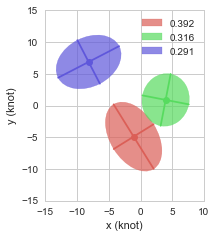

In [65]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [66]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvWmwJGd5Lvhk7fups/fZt5aQ1KKRZGMEAt8rGRnG43Ff
oKdBPZImdBG+1kTAtfAmYCQYuxEQtmVfE5aujbzECDNCoDAODHPBBjlg8FwM6pEFDS3TZ19q39fc
50fpy5OZlZmVWZV1TtUhnwiC1jlZX31VJ+up93vf531eShRFEQ4cOHBwQuE67g04cODAQT/hkJwD
Bw5ONBySc+DAwYmGQ3IOHDg40XBIzoEDBycaDsk5cODgRMMhOQcOHJxoOCTnwIGDEw2H5Bw4cHCi
4ZCcAwcOTjQcknPgwMGJhkNyDhw4ONFwSM6BAwcnGg7JOXDg4ETDITkHDhycaDgk58CBgxMNh+Qc
OHBwouGQnAMHDk40HJJz4MDBiYZDcg4cODjRcEjOgQMHJxoOyTlw4OBEwyE5Bw4cnGg4JOfAgYMT
DYfkHDhwcKLhOe4NODh+iKIIhmHAcRzcbje8Xi9cLhcoijrurTlw0DMoURTF496Eg+MDTdMolUqI
RqNgWRYAcHBwgNHRUUSjUbhcLof0HAw1nEjupxg8z6PRaCCTySAcDoPjOHi9XoiiCFEUwfM8OI4D
wzCgKAput9shPQdDB4fkfgohiiI4jgPP86AoCjzPY319HTzPw+PxQBAE1Ot1+P1+eDyHtwghPZqm
4XK54Ha74Xa74fF4HNJzMLBwjqs/ZRAEASzLgvzZE4kE8vk8FhcX4fP5wDAMkskkKIoCy7LweDwI
hUIIBoMIhUJwu92K9cg6FEVJZOfxeNquc+DguOBEcj8lIMdPnucBABzHYW9vD4IgwOv1IhqNgmEY
BAIBeL1ejIyMIBwOg6Zp1Ot1lEolpFIpifQI8cnJjOM4iKIImqaRTqcxPT0Nn8/nkJ6DY4VDcj8F
EAQBHMdBEARQFIVKpYL9/X2MjY0hFothZ2dHcT1FURBFERRFIRAIIBAIYGxsDKIootlsotFooFgs
IplMwuv1SoQnJ71arQaGYSTSI8dbJ9JzcNRwSO6Eg+TRSDEhmUyiXC5jYWFBitTMZiwoipLITE56
9XodxWIRiUQCPp8PoVAIoihKpAoc5gEd0nNw1HBI7oRCEATwPA9BEAAADMNgd3cXPp8Pa2trUkGh
l2KBnPTIc5JITxAE7O7uwu/3S/m8YDAIl6ulP3dIz8FRwSG5EwhBEJDNZlEqlbC4uIhCoYBkMomp
qSmMjY21EZs6kiPHVatwuVxSvq5cLmNmZkaq1ObzeTSbTfj9fsXx1oj0qtUqYrEY/H6/Q3oOuoZD
cicM5HgKtIhjb28PjUYDKysrCAQCbdf3U/bhcrkQCAQQCoUAtMi30Wig0Wggl8uBpmkEAgEp0gsE
AgrSS6fT8Hg84DjOifQcdA2H5E4I1No3lmVRrVYRj8extrYmkYfeY4H+Eh7QIr1wOIxwOAzgkPTq
9Tqy2axEeiTSI8UPElnqHW99Pp+j0XOgC4fkTgDU2rdsNot0Og2fz4e5uTnDx2qRQ7fHVatQkx7p
wCBdGBzHIZlMIhwOS5Fep0IG6b11SM8BgUNyQw4SvQEtktjf3wfHcTh16hTK5bKpNQZFD+52uxGJ
RBCJRAAAGxsbiMViYBgG6XQaLMsqIj0t0mNZFs1mUyI9iqLg9Xqd4+1PMRySG1Koj6fVahV7e3uI
x+NYXFxErVYzRV56EY8dxNfrGhRFIRQKIR6PAziM9Or1OlKpFDiOk0gvFArB7/e3kV4ikZDWcCK9
n044JDeEkGvfACCVSqFQKGBubg7RaFS6rluSsYMA+kEi6kiP4ziJ9JLJJDiOU8hV/H6/tBe9SM8h
vZMPh+SGCKIoIpfLwev1IhAIgGVZ7O3tgaIorK2twev1Stea/dAeVf6tH/B4PIhGoxKxy0mvWCyC
53mp4OL3+xUFCjnpkZweIT6H9E4WHJIbEpDWrEKhIOWp9vf3MTExgYmJibYPZa/kNYzEp0V6BwcH
0v/zPK8wG5CTniAIUgFHTnoejwcej8chvSGGQ3JDAJ7nJUNLACgUCmAYBktLS5IGrVvI+1TlPzsJ
IARFiI9lWUWkJwiCRHihUEgRwclJj2VZVCoVTE9PO6Q3hHBIboChLi40m01Uq1X4/X6cPn3asGI4
zMfQfsHr9cLr9SIWiwEAWJZFvV5Ho9FAPp+HKIqKSI+QHsdxqNfr0vGWoign0hsiOCQ3oJA7hwBA
Pp9HKpVCIBDAyMhIR0mEWZIjH85yuYxSqSSJcH8aCJJYSo2MjEAURUWkl8/nAQDBYFAyEpVHvPJI
zyG9wYZDcgMIufZNEAQcHByg2WxiZWVF+vDZBUKiiUQCIyMjqFarqNVqcLlcYFlWOsodh87MLhmL
GcKhKAo+nw8+n09BevV6HZVKBTRNY3NzUzPSAxzSG2Q4JDdAUB9P6/U6dnd3EY1GpdYsKxFap+uI
MwkArK6uSten02kArUinXC4jlUrB6/Uq5BlmSM8OkjoucpCTntfrRT6fx/T0NOr1Omq1GrLZLFwu
l+I90SM9oCV/IWJmuZ7PQf/hkNyAQK19y2QyyGazmJ2dxcjISFdrGpFMuVzG/v4+Jicn0Wg04Ha7
pcZ+Qqajo6MYHR1V+MYVCgUkEgnJTUTdWE9wkj7EoihKPbI+nw/xeFwa41iv11GtVpFOp+F2uxWF
DHkEJwgC0uk0wuEwotGoYigQ6cxw0B84JHfMEEURtVoNiUQCi4uL4HlesiVfW1uDz+dTXG8116aG
IAhIpVIol8tSdTadThuuKfeNGx8fl3zjtBrrCekNCsweV62Coij4/X74/X7pi4CQXqVSkUhPbhUv
NxzQivTIUCCH9OyFQ3LHCFJcIBOwiC356Ogopqamemqe17qOHE89Hk/H6qwR5L5x5HWQKiXpMQUg
9c4O+/HMDFFqkR5N02g0GtKRn7glA4cFDfXxlmEYAGgbCjTM799xwyG5Y4L8eEqskfb39zE/Py+1
LWnBijREfl2pVMLBwQEmJycxPj7eposj+5D/v1m4XC5FuxXP89je3pZcRDiO0xXhDgO6yS3K52MQ
0tvZ2YHH42kbCiSfhEbeFzJ0SD3z1iE963BI7oih5fu2t7cHURRx+vRpxZxTozU6QR4hJJNJVCoV
W8TDZkCOXmNjYwgEApLOjOT0iB5NLsLtF+w6rva6Bqm4xmIxaQYGsYovlUpIJpPw+XxtxR0t0ksk
EpiZmVFMQnNITx8OyR0h1FOzSHQ1NjYmzTjtBCs9qYIgYGNjAz6fr+PxtJ+6OI/Hg1gs1ibCJTk9
4jYiT9gPEvqR17MyFEg+CY2iKDQaDakLxon0OmOw7qYTDLn2TRRFHBwcoFarYXl5WZIomIHZo2S5
XIYoihgdHdWc66BeU/3fJHfUC/T2qRbhqquUHo8HwWBQGsbTz0jvKGFElkZDgeQVbfK+qN2cneOt
PhyS6zO0WrN2d3cRDAaxtrYGt9sNnuctjQU0ulZ+PAWA8fFx0/s8jg+CXsK+Xq9DFEVpwpi8Smlk
5a7GUQqK7VxHXtxRV7RFUcTW1pbmUCA56XEc55AeHJLrK9SN9blcDul0GqdOncLo6Kj0cyuJfqNr
aZpWjB28evWq6TXtRrdryhP2hUIBCwsL4Hlec+KXnkbPrr3YjV7IUk56+Xweq6ur0pdBp6FAgDbp
0TSNSCRy4jsyHJLrA0RRBM/zuHLlCk6fPg0AODg4AMMwWF1dlcwcCaxWM7WuJfk9Mnawmz2TG32Q
mvu1NHpkDgTR6JHfq+dA2IXjinK1QP4uWjIeraFARqS3tbWFpaUlSZBMxMnyiPAkwCE5m6FurK/V
akgmk4jFYpi

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1wVNX5x7+bTRbysoAYTCIhBEJ4MUIELFilCqlpZhjo
YGNMoqbTSkehirViTUAhUUIAFf4oop2iTgUGjdBOkWmnVgNK1foSbIKEvPILGwIBEkJkN4EsuXt/
f2zOzd2793X37stNzmdmB/fee+49G/e7z3Oe85zzmFiWZUGhUAxDRKg7QKFQtEFFS6EYDCpaCsVg
UNFSKAaDipZCMRhUtBSKwYgMdQcoFKPhcrlQVlaGxsZGWCwWlJeXY/Lkydz5I0eOYNeuXYiMjERu
bi4eeughyTanTp3CE088gdTUVABAYWEhli5dKt8BlkKhaOKjjz5ii4uLWZZl2f/973/sqlWruHNO
p5O9//772Z6eHra/v5/9xS9+wXZ2dkq2+eCDD9i3335b0/OppaVQNHL8+HH85Cc/AQDccccdOHny
JHfu9OnTSElJwdixYwEA8+fPx7fffouamhrRNidPnkRrayuqqqowefJkrF+/HnFxcbLPN6Rojx8/
HuouUMKc+fPnK15TU1MFhhknes5isWD27Nmi5xwOh4ewzGYzBgYGEBkZCYfDAavVyp2LjY2Fw+GQ
bDNnzhzk5eXh9ttvx5tvvoldu3ahuLhYtt+GFC0AVL58NGjPstsdsFrlf/1CCe2fJ/kbl6i6jmHG
YWJKhei5c23rJdvFxcWht7eXe+9yuRAZGSl6rre3F1arVbJNdnY2xowZAwDIzs7Gpk2bFPtNo8cU
ikbmzZuHY8eOAQBqamowffp07lxaWhpsNht6enrgdDpRXV2NuXPnSrZZuXIlTpw4AQD473//i4yM
DMXnG9bSUiihIjs7G1988QUKCgrAsiwqKipw+PBh9PX1IT8/HyUlJVi5ciVYlkVubi4SEhJE2wBA
WVkZNm3ahKioKMTHx6uytFS0FIpGIiIi8PLLL3scS0tL4/47KysLWVlZim0AICMjA++//76252u6
mkKhhBwqWgrFYFDRUigGg45pdaCl65rPbafFR+vYE8pIgIrWD4hY02an+NT+9PdtHoKnAqaogYrW
B/wVK4Hfni9gKl6KHFS0GtBLrGKQexLxUuFSpKCiVUkgBcuH3L/l+zYA1OpSvKGiVcH5PsBsDrxg
+aTNTqFWNwhcvt4c6i5ohopWBmJdk9LiPVZuBAuh1QWo5dWbM1gsejwxuN3QBJ2nlSBY7rAa0man
DAm465pfU0wU40MtrQi+Craup0fxmoxx4us31cDvD9/6MgwwI/iOACVEUNEK0CpYvlDTpss7Vaeb
Lnhcr5eAm2pa6dh3BEFFy6Ol65pmsSoJlQ//WiJgf4RLSEqLx6UzV6hwRwh0TDuIWsHW9fT4JFgh
pK0al1rV/QbHvXTMO/wZ8aIlX3K1ggXcgvNHsARyH72EC8AjYEUZnoxo0aodv7Y6najr6dFNrGJQ
4VLUMmJFq1awvrjCJ+xdmvoSiB8CKtzhy4gMRKkRLF+sdrtd9n5CkaZPuQUnWi95HJtjjZe9R9r0
RNQ1XdAlMMXdk2ZVDUtGnKXVKlg5Tti7cMLehfQpt3i8AHgdU2t99XSTAWpxA4HL5cLGjRuRn5+P
oqIi2Gw2j/NHjhxBbm4u8vPz8cEHH6hqc/jwYeTn56t6fkhEW1tbi6KiIgCAzWZDYWEhHn74YZSW
lsLlcgXsuXoJVihWtSgJN1DjZZpNpS+ffPIJnE4nKisrsXbtWmzdupU7d+PGDWzZsgXvvPMO9u7d
i8rKSnR1dcm2OXXqFA4ePAiWZVU9P+ii3b17N1588UX09/cDALZs2YJnnnkG+/fvB8uyqKqqCshz
lQRLpnLkgk1ErAA0iZV/vRqLq7e1BbxTISm+o7YsiMVi4cqCSLW5cuUKduzYgfXrpTdHFxJ00aak
pGDnzp3c+7q6OixYsAAAcO+99+LLL7/U/ZlkSkdOsICydQWg2bryUdNO7/lbr/tT4Xpg62sTfckh
VeKDnFNbFsTpdOKFF17AunXrEBsbq7rPQQ9E5eTkoL29nXvPsixMJhMA9wdUCvoQ7HaH4jXn+9z/
JqXFS9631el0X5M8RvSaFsZ9k4kJcYPPVdc/KRiGUbzHLUmx6Gi/ihOXL2OKxaLqvlr6dUvqTeg4
3YXGiw7cGqO6mV+o+f8VCn5w3a25jV5lQRoaGmCz2VBWVob+/n60tLRg8+bNeOGFF2SfH/LocUTE
kLHv7e3l6poooVQbpqXrmuIa2LqeHpjNZlELSyyr2WxGYny0bkvzzF3X0Ip+xWiydZb7eaebLgCQ
z1O22+2a+2e9Y/D+QVhsH+61hrQyb948HD16FEuXLpUtCxITE4Pq6mqsXLkSJpPJq82cOXPwj3/8
AwDQ3t6OZ599VlGwQBiI9rbbbsPXX3+NhQsX4tixY7jrrrv8vqe/ASfhuNVf68onfcotaBZMB8mR
Nj1R14UGXvfnTQsBdL2uGvQsC+ILIRdtcXExNmzYgB07dmDq1KnIycnx+V78cZpegg0HxBYa8Ekx
m/27P92fShN6lgUhJCcnc9NDSoREtPwOTpkyBfv27fP7nnpkOJFpHDlq+zo93mfGTNDSTb8R63dT
/TmYRQJXWi2y0OoC1PKGIyG3tHqgl2ClaIYD5r7r3PuZyW6hNrR3ciIOtnj5JCWP8RrT+upS021d
wx/Di1bronWtLjERJREqH6F41QhXy3jWH6Rcai3WV+g2A1S84YCh0xi1CJYkTghRI9iU8fKRTyJe
oesshVLkWG/4CSP89cCq29M9qsIKw4pWq2DlkBLszOQJohZWDLXXhRK9xUsJDYZ2j7UuXBciFXhS
azGNCv9vUTc4DwxoG/fSSHPoMKyl1bJTopbAk9wYVg2BEDzJeebnPuuFr9aXWtzQYWhLq4QvbjHg
u2BnJk9AQ7t/ohUTpbCfwrW6DMPAbO+Xva+a9byAtqAVtbihYdiK1pfpHb2spFIk+YS9S1REahM7
hOfVpDGqXZSvVbxEuEal8WqH6PGfhbEywrhr/iO3akdvK8tvL2dtSRojESgRT6Azsfj35T+f3wc+
QvEqWV2jWttI1+xQd0Ezw1K0cm6xmqynQEOeLxRPsPolJWA58dbJLFygbnJwGXai9TXrSe8Akppk
i1D/eAj7wHehhQLmL1yQEy4l8Bg2eiyHL24xoN9cqxHmbMXgL/AX+4FTs0CfRpMDz7CztMMdMY+A
wYBHbrRWhB6B1LgbGLK4YlBrGxxGjGj1nt8MBVJzyL4sgve4Ly9wRgQsHHcL3WW54BQd2waWYeUe
S+UXE4I9htRzCklrWqUW+PclzyKIuctybnI41PMd7gwr0QKQdN0A5RU2/iZG8NFLXP5maGlBKF6C
nHApwWdYuccZ48ZJBknmWONlXeTMmAlhm3Osh2BrneJJBHwyLUkezyNuc2bMBMltcsTc5LTZKWj5
vo26yAFiWIlWDc2tlyTd5MyYCaht7wyb6K+/PyJCoc5KlP5c9Rc6Pa7PtCRxiSJk+oqUOyHjW7mg
FCVwqHKP7XY76urqUF9fr+smZ4FC6oukdh2rnm6yv/i8cGFQgLMSJ3AvOYTXkfZi7rLQY5Hybuj0
T2CQtbSfffYZ3nrrLbS0tCAxMRGRkZHo6OhAWloaHnvsMdx3333B6qdq5FxkgqK17ev0EO7EsaN9
7o/aHS3E2ukhWDna2DMe71NMqVw7Ynn5Fhfw3k1SytoO5+kfl8uFsrIyNDY2wmKxoLy8HJMnT+bO
HzlyBLt27UJkZCRyc3Px0EMPSbZpaWnBhg0bwLIsUlNTUV5ezu2hLIXk2ZKSEsTHx2Pjxo1IT0/3
ONfc3IyDBw/

## Goodness-of-fit Statistics

In [67]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.932  0.019      0.062  7.015380e-08      0.053       0.332

In [68]:
gmm_em = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
mixed_model_pdf_em = generate_gmm_pdf_from_grouped_gmm_param(gmm_em)

# 6. GMM by Optimization

In [69]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [70]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -17.487047747921288
     jac: array([  1.31396914e+00,   0.00000000e+00,  -2.38418579e-07,
         2.38418579e-07,  -2.38418579e-07,  -7.15255737e-07,
         1.31397510e+00,  -2.38418579e-07,   0.00000000e+00,
        -4.76837158e-07,   4.76837158e-07,  -4.76837158e-07,
         1.31397033e+00,   0.00000000e+00,   0.00000000e+00,
        -2.38418579e-07,   0.00000000e+00,  -1.43051147e-06,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 691
     nit: 34
    njev: 34
  status: 0
 success: True
       x: array([ 0.21749595,  4.81770768,  0.25496374,  2.34390443,  3.4996429 ,
       -0.13601912,  0.34900005, -0.96243785, -4.96121765,  4.03854841,
        3.91285527, -0.41001555,  0.43350399, -6.75039928,  6.07358941,
        6.96218254,  4.56096909,  0.01542211])

## 6.1 GMM Result

In [71]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.434  -6.750   6.074  6.962  4.561   0.015
2  0.349  -0.962  -4.961  4.039  3.913  -0.410
3  0.217   4.818   0.255  2.344  3.500  -0.136

GMM Plot Result
0.43350399117 [[-6.75039928  6.07358941]] [ 4.56001911  6.96280479] -88.9863559092
0.349000054847 [[-0.96243785 -4.96121765]] [ 3.05151472  4.72319464] -132.794842144
0.217495953983 [[ 4.81770768  0.25496374]] [ 2.30528388  3.52520278] -170.857880113


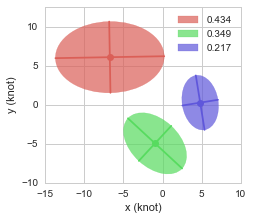

In [72]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Bivariate Goodness-of-fit statistics

In [73]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.976  0.017      0.171  2.543734e-08      0.032       0.200

In [74]:
pd.DataFrame(gofs_mean_set_bivar).set_index('year_lim')

Chi_square  K_S  MSE  RMSE / Max  RMSE / Mean  R_square
year_lim                                                             
(1996, 2006)         NaN  NaN  NaN         NaN          NaN       NaN

In [75]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUJNddJvhFvt9VWe9HV1VXZUvjxcZuqdc22JY5Luhd
4zE2phc9mGEGW7O2Z3blZTEYYR+bPnLrYbMrWLDQAsYzrHQ4biN2YIX5A1ryOV508Fpq0ZiWkZDq
lVmVla/KR2XkKzIi7v6RfaMiIiMyIzIjqzJL8Z2jo66Me2/czIj44vf+MYQQAhs2bNg4pXCc9AZs
2LBhY5CwSc6GDRunGjbJ2bBh41TDJjkbNmycatgkZ8OGjVMNm+Rs2LBxqmGTnA0bNk41bJKzYcPG
qYZNcjZs2DjVsEnOhg0bpxo2ydmwYeNUwyY5GzZsnGrYJGfDho1TDZvkbNiwcaphk5wNGzZONWyS
s2HDxqmGTXI2bNg41bBJzoYNG6caNsnZsGHjVMMmORs2bJxq2CRnw4aNUw2b5GzYsHGqYZOcDRs2
TjVskrNhw8aphk1yNmzYONVwnfQGbJw8CCHgOA48z8PpdMLtdsPhcIBhmJPemg0bfYMhhJCT3oSN
k0Oj0UCpVEI4HEaz2QQAJJNJRKNRhMNhOBwOm/RsjDRsSe5NDEEQUKvVkM1mEQwGwfM83G43CCEg
hEAQBPA8D47jwDAMnE6nTXo2Rg42yb0JQQgBz/MQBAEMw0AQBGxsbEAQBLhcLoiiiGq1Cq/XC5fr
6BahpNdoNOBwOOB0OuF0OuFyuWzSszG0sNXVNxlEUUSz2QS97Pv7+8jn81heXobH4wHHcUilUmAY
Bs1mEy6XC4FAAH6/H4FAAE6nU7EeXYdhGInsXC5X2zgbNk4KtiT3JgFVPwVBAADwPI/d3V2Iogi3
241wOAyO4+Dz+eB2uzE2NoZgMIhGo4FqtYpSqYR0Oi2RHiU+OZnxPA9CCBqNBjKZDGZnZ+HxeGzS
s3GisEnuTQBRFMHzPERRBMMwKJfL2Nvbw8TEBCKRCOLxuGI8wzAghIBhGPh8Pvh8PkxMTIAQgnq9
jlqthmKxiFQqBbfbLRGenPQqlQo4jpNIj6q3tqRn47hhk9wpB7WjUWdCKpXC4eEhlpaWJEnNqMWC
YRiJzOSkV61WUSwWsb+/D4/Hg0AgAEKIRKrAkR3QJj0bxw2b5E4pRFGEIAgQRREAwHEcEokEPB4P
YrGY5FDox1kgJz16TirpiaKIRCIBr9cr2fP8fj8cjlb8uU16No4LNsmdQoiiiFwuh1KphOXlZRQK
BaRSKczMzGBiYqKN2NSSHFVXzcLhcEj2usPDQ8zPz0ue2nw+j3q9Dq/Xq1BvO5Eey7KIRCLwer02
6dnoGTbJnTJQ9RRoEcfu7i5qtRpWV1fh8/naxg8y7MPhcMDn8yEQCABokW+tVkOtVsPBwQEajQZ8
Pp8k6fl8PgXpZTIZuFwu8DxvS3o2eoZNcqcE6ti3ZrMJlmUxPj6OWCwmkYfeXGCwhAe0SC8YDCIY
DAI4Ir1qtYpcLieRHpX0qPODSpZ66q3H47Fj9Gzowia5UwB17Fsul0Mmk4HH48Hi4mLHuVrk0Ku6
ahZq0qMZGDQLg+d5pFIpBINBSdLr5sigubc26dmgsEluxEGlN6BFEnt7e+B5HnNzczg8PDS0xrDE
gzudToRCIYRCIQDA5uYmIpEIOI5DJpNBs9lUSHpapNdsNlGv1yXSYxgGbrfbVm/fxLBJbkShVk9Z
lsXu7i7Gx8exvLyMSqViiLz0JB4riK/fNRiGQSAQwPj4OIAjSa9arSKdToPneYn0AoEAvF5vG+nt
7+9La9iS3psTNsmNIOSxbwCQTqdRKBSwuLiIcDgsjeuVZKwggEGQiFrS43leIr1UKgWe5xXhKl6v
V9qLnqRnk97ph01yIwRCCA4ODuB2u+Hz+dBsNrG7uwuGYRCLxeB2u6WxRh/a47K/DQIulwvhcFgi
djnpFYtFCIIgOVy8Xq/CQSEnPWrTo8Rnk97pgk1yIwKamlUoFCQ71d7eHqampjA1NdX2UPZLXqNI
fFqkl0wmpf8LgqAoNiAnPVEUJQeOnPRcLhdcLpdNeiMMm+RGAIIgSAUtAaBQKIDjOKysrEgxaL1C
nqcq/+w0gBIUJb5ms6mQ9ERRlAgvEAgoJDg56TWbTZTLZczOztqkN4KwSW6IoXYu1Ot1sCwLr9eL
c+fOdfQYjrIaOii43W643W5EIhEAQLPZRLVaRa1WQz6fByFEIelR0uN5HtVqVVJvGYaxJb0Rgk1y
Qwp55RAAyOfzSKfT8Pl8GBsb6xoSYZTk5DYqs3NHHbSk1NjYGAghCkkvn88DAPx+v1RIVC7xyiU9
m/SGGzbJDSHksW+iKCKZTKJer2N1dVV6+N4MsCqMxQjhMAwDj8cDj8ejIL1qtYpyuYxGo4GtrS1N
SQ+wSW+YYZPcEEGtnlarVSQSCYTDYSk1y4yEZqaE0iAkNyvWPClykJOe2+1GPp/H7OwsqtUqKpUK
crkcHA6HImRFj/SAVvgLDWaWx/PZGDxskhsSqGPfstkscrkcFhYWMDY21tOa/cTJWRHIe1pACJFy
ZD0eD8bHx6U2jtVqFSzLIpPJwOl0KhwZcglOFEVkMhkEg0GEw2FFUyCamWFjMLBJ7oRBCEGlUsH+
/j6Wl5chCIJUljwWi8Hj8SjGm7W1GcFptsEZVVfNgmEYeL1eeL1eRKNRBemVy2WJ9OSl4uUFB7Qk
PdoUyCY9a2GT3AmCOhdoByxaljwajWJmZqav5PnTTFzHDSNEqUV6jUYDtVoNh4eHSKfTUrVk4Mih
oVZvOY4DgLamQDbp9Q6b5E4IcvWUlkba29vDmTNnpLQlLZghL7M2OfX/bbTQy28h749BSS8ej8Pl
crU1BZJ3QqNkRpsOqXve2qRnHjbJHTO06r7t7u6CEIJz584p+px2WqMb7IegBavU1X7XoB7XSCQi
9cCgpeJLpRJSqRQ8Ho/CkaFHevv7+5ifn1d0QrOvtz5skjtGqLtmlUolJJNJTExMSD1Ou2FQOam2
5KaPQdj1zDQFkndCYxgGtVpNyoKxJb3usEnumCCPfSOEIJlMolKp4OzZs1KIghEMQpXUynultqN+
YBOnEp3IslNToEKhgP39fakpEA1MpvMAW73tBJvkBgyt1KxEIgG/349YLAan0wlBECyPaTNLhtTo
La9kchpwnAHFVq4jbwo0OTkpkV61WgUhBNvb25pNgeSkx/O8TXqwSW6gUCfWHxwcIJPJYG5uDtFo
VPp8EIG7ZkkukUhI0gANZaDdtXp5IKwiBSswLA90P2QpJ718Po+1tTU0Gg1Uq9WuTYEAbdJrNBoI
hUKnPiPDJrkBgBACQRDwyiuv4Ny5cwCAZDIJjuOwtrYmFXOkOEn72eHhIXiex/j4OCYmJiAIArLZ
LOr1ulSIkj5c6lSmNwsGFWvXC+i1l5MeoN8UqBPpbW9vY2VlRQpIpsHJconwNMAmOYuhTqyvVCpI
pVKIRCI4c+ZM165ZRuKxjECeeK81hxCCdDqNUqkEl8uFaDQqveG9Xi8cDgdmZmY0k9blAa6DVm/7
fdiGyS5oBVnKA4rl6NQJLZvNguM4Ral4n88HQohU6EFL0qMS/aiTnk1yFkKdmkWT6xcXF6XyPlqg
N61RkjMr9anXbDabSCQScDgciMVi2NzcbFuT/i0vTyRPWpenMsklvWFsGGMVsfQLK0muGzp1Qstk
MuA4DoQQFAqFtk5odDzP822l4keR9GySswBUPeV5Xqo/RmPflpeXOwb3qtfpBrP2OzVoVsXk5KRU
UVjLu6q3njp/k9qFaICr2+1GIBCAIAiWeGhPE46T5NTQ6o+xubkJQRDamgLJO6GpHRmNRgMMw7Rl
ZAwzbJLrE+r

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnX1wVNX5x7+bTRbysoAYTCIhBEJ4MUIELFilCqlpZhjo
YGNMoqbTSkehirViTUAhUUIAFf4oop2iTgUGjdBOkWmnVgNK1foSbIKEvPILGwIBEkJkN4EsuXt/
f2zOzd2793X37stNzmdmB/fee+49G/e7z3Oe85zzmFiWZUGhUAxDRKg7QKFQtEFFS6EYDCpaCsVg
UNFSKAaDipZCMRhUtBSKwYgMdQcoFKPhcrlQVlaGxsZGWCwWlJeXY/Lkydz5I0eOYNeuXYiMjERu
bi4eeughyTanTp3CE088gdTUVABAYWEhli5dKt8BlkKhaOKjjz5ii4uLWZZl2f/973/sqlWruHNO
p5O9//772Z6eHra/v5/9xS9+wXZ2dkq2+eCDD9i3335b0/OppaVQNHL8+HH85Cc/AQDccccdOHny
JHfu9OnTSElJwdixYwEA8+fPx7fffouamhrRNidPnkRrayuqqqowefJkrF+/HnFxcbLPN6Rojx8/
HuouUMKc+fPnK15TU1MFhhknes5isWD27Nmi5xwOh4ewzGYzBgYGEBkZCYfDAavVyp2LjY2Fw+GQ
bDNnzhzk5eXh9ttvx5tvvoldu3ahuLhYtt+GFC0AVL58NGjPstsdsFrlf/1CCe2fJ/kbl6i6jmHG
YWJKhei5c23rJdvFxcWht7eXe+9yuRAZGSl6rre3F1arVbJNdnY2xowZAwDIzs7Gpk2bFPtNo8cU
ikbmzZuHY8eOAQBqamowffp07lxaWhpsNht6enrgdDpRXV2NuXPnSrZZuXIlTpw4AQD473//i4yM
DMXnG9bSUiihIjs7G1988QUKCgrAsiwqKipw+PBh9PX1IT8/HyUlJVi5ciVYlkVubi4SEhJE2wBA
WVkZNm3ahKioKMTHx6uytFS0FIpGIiIi8PLLL3scS0tL4/47KysLWVlZim0AICMjA++//76252u6
mkKhhBwqWgrFYFDRUigGg45pdaCl65rPbafFR+vYE8pIgIrWD4hY02an+NT+9PdtHoKnAqaogYrW
B/wVK4Hfni9gKl6KHFS0GtBLrGKQexLxUuFSpKCiVUkgBcuH3L/l+zYA1OpSvKGiVcH5PsBsDrxg
+aTNTqFWNwhcvt4c6i5ohopWBmJdk9LiPVZuBAuh1QWo5dWbM1gsejwxuN3QBJ2nlSBY7rAa0man
DAm465pfU0wU40MtrQi+Craup0fxmoxx4us31cDvD9/6MgwwI/iOACVEUNEK0CpYvlDTpss7Vaeb
Lnhcr5eAm2pa6dh3BEFFy6Ol65pmsSoJlQ//WiJgf4RLSEqLx6UzV6hwRwh0TDuIWsHW9fT4JFgh
pK0al1rV/QbHvXTMO/wZ8aIlX3K1ggXcgvNHsARyH72EC8AjYEUZnoxo0aodv7Y6najr6dFNrGJQ
4VLUMmJFq1awvrjCJ+xdmvoSiB8CKtzhy4gMRKkRLF+sdrtd9n5CkaZPuQUnWi95HJtjjZe9R9r0
RNQ1XdAlMMXdk2ZVDUtGnKXVKlg5Tti7cMLehfQpt3i8AHgdU2t99XSTAWpxA4HL5cLGjRuRn5+P
oqIi2Gw2j/NHjhxBbm4u8vPz8cEHH6hqc/jwYeTn56t6fkhEW1tbi6KiIgCAzWZDYWEhHn74YZSW
lsLlcgXsuXoJVihWtSgJN1DjZZpNpS+ffPIJnE4nKisrsXbtWmzdupU7d+PGDWzZsgXvvPMO9u7d
i8rKSnR1dcm2OXXqFA4ePAiWZVU9P+ii3b17N1588UX09/cDALZs2YJnnnkG+/fvB8uyqKqqCshz
lQRLpnLkgk1ErAA0iZV/vRqLq7e1BbxTISm+o7YsiMVi4cqCSLW5cuUKduzYgfXrpTdHFxJ00aak
pGDnzp3c+7q6OixYsAAAcO+99+LLL7/U/ZlkSkdOsICydQWg2bryUdNO7/lbr/tT4Xpg62sTfckh
VeKDnFNbFsTpdOKFF17AunXrEBsbq7rPQQ9E5eTkoL29nXvPsixMJhMA9wdUCvoQ7HaH4jXn+9z/
JqXFS9631el0X5M8RvSaFsZ9k4kJcYPPVdc/KRiGUbzHLUmx6Gi/ihOXL2OKxaLqvlr6dUvqTeg4
3YXGiw7cGqO6mV+o+f8VCn5w3a25jV5lQRoaGmCz2VBWVob+/n60tLRg8+bNeOGFF2SfH/LocUTE
kLHv7e3l6poooVQbpqXrmuIa2LqeHpjNZlELSyyr2WxGYny0bkvzzF3X0Ip+xWiydZb7eaebLgCQ
z1O22+2a+2e9Y/D+QVhsH+61hrQyb948HD16FEuXLpUtCxITE4Pq6mqsXLkSJpPJq82cOXPwj3/8
AwDQ3t6OZ599VlGwQBiI9rbbbsPXX3+NhQsX4tixY7jrrrv8vqe/ASfhuNVf68onfcotaBZMB8mR
Nj1R14UGXvfnTQsBdL2uGvQsC+ILIRdtcXExNmzYgB07dmDq1KnIycnx+V78cZpegg0HxBYa8Ekx
m/27P92fShN6lgUhJCcnc9NDSoREtPwOTpkyBfv27fP7nnpkOJFpHDlq+zo93mfGTNDSTb8R63dT
/TmYRQJXWi2y0OoC1PKGIyG3tHqgl2ClaIYD5r7r3PuZyW6hNrR3ciIOtnj5JCWP8RrT+upS021d
wx/Di1bronWtLjERJREqH6F41QhXy3jWH6Rcai3WV+g2A1S84YCh0xi1CJYkTghRI9iU8fKRTyJe
oesshVLkWG/4CSP89cCq29M9qsIKw4pWq2DlkBLszOQJohZWDLXXhRK9xUsJDYZ2j7UuXBciFXhS
azGNCv9vUTc4DwxoG/fSSHPoMKyl1bJTopbAk9wYVg2BEDzJeebnPuuFr9aXWtzQYWhLq4QvbjHg
u2BnJk9AQ7t/ohUTpbCfwrW6DMPAbO+Xva+a9byAtqAVtbihYdiK1pfpHb2spFIk+YS9S1REahM7
hOfVpDGqXZSvVbxEuEal8WqH6PGfhbEywrhr/iO3akdvK8tvL2dtSRojESgRT6Azsfj35T+f3wc+
QvEqWV2jWttI1+xQd0Ezw1K0cm6xmqynQEOeLxRPsPolJWA58dbJLFygbnJwGXai9TXrSe8Akppk
i1D/eAj7wHehhQLmL1yQEy4l8Bg2eiyHL24xoN9cqxHmbMXgL/AX+4FTs0CfRpMDz7CztMMdMY+A
wYBHbrRWhB6B1LgbGLK4YlBrGxxGjGj1nt8MBVJzyL4sgve4Ly9wRgQsHHcL3WW54BQd2waWYeUe
S+UXE4I9htRzCklrWqUW+PclzyKIuctybnI41PMd7gwr0QKQdN0A5RU2/iZG8NFLXP5maGlBKF6C
nHApwWdYuccZ48ZJBknmWONlXeTMmAlhm3Osh2BrneJJBHwyLUkezyNuc2bMBMltcsTc5LTZKWj5
vo26yAFiWIlWDc2tlyTd5MyYCaht7wyb6K+/PyJCoc5KlP5c9Rc6Pa7PtCRxiSJk+oqUOyHjW7mg
FCVwqHKP7XY76urqUF9fr+smZ4FC6oukdh2rnm6yv/i8cGFQgLMSJ3AvOYTXkfZi7rLQY5Hybuj0
T2CQtbSfffYZ3nrrLbS0tCAxMRGRkZHo6OhAWloaHnvsMdx3333B6qdq5FxkgqK17ev0EO7EsaN9
7o/aHS3E2ukhWDna2DMe71NMqVw7Ynn5Fhfw3k1SytoO5+kfl8uFsrIyNDY2wmKxoLy8HJMnT+bO
HzlyBLt27UJkZCRyc3Px0EMPSbZpaWnBhg0bwLIsUlNTUV5ezu2hLIXk2ZKSEsTHx2Pjxo1IT0/3
ONfc3IyDBw/

## 6.3 Univariate Goodness-of-fit

In [76]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

def f_em(V,theta):
    return (mixed_model_pdf_em([[V*cos(theta),V*sin(theta)]]))*V

Speed Distribution Comparison
(0.97338573924997929, 0.93373447449521618, 0.93829643702763399)
Wall time: 32.8 s


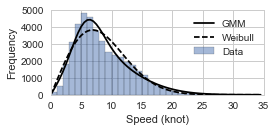

In [77]:
%%time
x = arange(0, max_speed, 0.5)
# 1. Fit Weibull
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed, x=x)

# 2. GMM Model
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])/0.02

# 3. Plot Comparison
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm*len(df.speed),'-', color='black', label='GMM')
plot(x, y_weibull*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

# 4. R square for GMM, Weibull
print(R_square_for_speed(df['speed'], f, weibull_params, f_em))

In [78]:
%%time
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

# 5.2. CDF Comaprison
plot(x, y_ecdf,'o', alpha=0.8, label='Data')
plot(x, y_cdf_gmm,'-', color='black',label='GMM')
plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
plt_configure(xlabel = "V", ylabel='P', legend=True, figsize=(4,3))

plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'}, figsize=(4,3))
align_figures()

cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
print(cdf_diff.max(), cdf_diff_weibull.max()) 
print(x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADSCAYAAACPQ+9ZAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XtclGXawPHfHBhmmOEMgqggIJ41BPOslWiey0RT87Bt
ta72bm2lptZra0pqWWvvWrnVdnRr89BhxTynZnkGxLOYJ1QUUBFhBoGBed4/WCZZDRWZGQ7X9/Pp
szPPMzPXda95dd/PfT/3o1IURUEIIaqR2tUJCCHqHiksQohqJ4VFCFHtpLAIIaqdFBYhRLWTwiKE
qHYOLSz79u1j3LhxNxzftGkT8fHxjBw5kmXLljkyBSGEC2gd9cMffvghK1euxGAwVDhutVqZN28e
K1aswGAwMHr0aHr37k1AQICjUhFCOJnDeiyhoaEsWrTohuMnTpwgNDQUb29vdDodsbGx7Nmzx1Fp
CCFcwGE9ln79+nHu3LkbjpvNZjw9Pe3vjUYjZrP5lr+XnJxcrfkJIW5fbGzsHX3eYYXlt5hMJiwW
i/29xWKpUGgqc6eNq07JyckSvxrjp6Rls3H3GU5k5JJzJZ+iK6e5mn2CrIwTXMw4Rf7lM3Qf/jL+
Te4h49gOdn471/5dN3cjOoMXTdv3RUHN1axfuJJ5HGuRBWtRASi234yrUmvRG73R6T3RGbxw0xvR
6T1x0xvRuBnQ6Y246Qy4GzzQuulBrUOv9wCNBrVGj0brDhotbm7uqDVabApo1GUd/1Kbzf7aTVv2
v9YSW4XX//2533r9398vKS1BUSr/zu3+1u3k4qZVE+zvAcDYXrf39/N6Ti8skZGRpKenk5ubi4eH
B0lJSTz55JPOTkO4QHkxOXD0JCePpNA4rDlqYzCZpw/y87JX7J9TqbV4+TfCai3FWlSASqUmtH0/
rNdyseRmYs7JwJJ7gUNbP6/w++5GX/yCo/DwDsToHYhfQBA2rTcmb38CAxtQUGpAqzNg8nDDcq0E
AKNBe9PX/t56QOHy1SL8vfUUFhViKeSGz3l5XPfaqKvwuvz717++2edu5/uFRTZ7/Nv9/t3mcjec
VlgSExMpKChg5MiRTJ8+nSeffBJFUYiPjycoKMhZaQgnS0nLZv3OU+zcuYtj+7eReWI3V7JOA9Cq
+2O07D4K34ZRRN07FP+QKDQ6I9fyL5Nz/igHt3zM1YtngF/vk9VodXgHNsXTvwme/k3w8m+E0TcE
o3cw3t6mCoXBQ6+loNCKn7eBYmspOq0GVFBsLSUk4Navg/2MxHXyIv18HifOZhMS6FXl72fmWPDz
Mjg1/t3mUvadUBTz2Tv+c3doYWncuLF9OnnIkCH2471796Z3796ODC1cKCUtmw270jly4hxFpe64
q4tZ+cELKLZS1Bo3GjTtQIOw9jSMvJeigqtcOnOA4kIz+zZ/wrW8S/bf0bq5E9CkNb4Nm+MTFIFP
UCSeviEE+BoBhTyLFW+TO76e7pX+xYhp0eCu21TXhqJ3FruGFRZRP5QPcTIvW1CsBez6MZGje1ah
1XvTa/Q8rGhp02s8nn4hNAiLpiD/MpnHd5Gy7l0uZxylvEeiM3jRtE0PvINbEdkqhsZhURRabeRZ
rLhrFRoGejukaIjqJ4VF3JWUtGyWrD7MlYvnSNmyjMNJ6ym1FqHRutEwKhybrRS1WkNIi+6cT/uZ
wz9/ydXsU2VfVqkJaNKa8Fad8G18D00jW9OsiS9hIb922ZsF/dodd2WPQdwZKSyiSsp7KXvTsgE4
tnMtB3Yk4uHVgIjuA4nq8CBanYHTh3/i9L71XDxzACi7MBvS7F6ate+JX2hHgoIaENnI+5a9j6p0
x4XrSGERdywlLZvF/9rKttX/wKdJR0KiutCo3SD8gsPxa9qJqzlZHPh5KWcPbqLoWj4AgU3a0DK2
DwERXWkQGHBbxUTUXlJYxG1LSctmzc/HWLrkA45sX06JtZCwgiJCorrgpjdR4ObN7pVvcPrwdlBs
eJh8uafXSBq36UPj0PA6UUyuv54U7G+kTy1vj6NIYRG35fiFQr5e9xUbvnqD3EsZuHt40773U7Tq
1I8zx/ZxZNu/uHTuEAABIc3o2nc0Ee160aiBT60vJuXKryeVu3DJbH9f1fbt2rWL5557jmbNmqEo
CiUlJYwfP56BAwfe9PPnz5/n6NGjNX5WVQqLqFT5f6H3HL7ML4f2cvXyBVp0GkqLbqPIzTrJuk+n
c+lsWUEJadaRhx79A0+Ne5jYlnVvbdLG3WduevyH3WfuqnB26dKFhQsXAmUr0ceNG0d4eDitWrW6
4bM7d+7k5MmTUlhE7ZWSls1bH3xH0TUzNlMzIjoOJSAsGqPRwO7Et8g8UXbzaHjrrnR+cDxTJw6r
Ez2T35J52XLz4zk3P14VRqORkSNHsnr1av75z3+SmZlJdnY2rVu3Jjo6mg8++IDCwkI6dOiAp6cn
77zzDoqiYLFYeOuttwgPD6+2XO6GFBZxU4qikDD/bVb+8010eiP9Jvyd0lKFU/vWcyp1LYpiIzC0
LR3inqDPAz3rzHCnMsH+Ri5cuvGG2WA/Y7XG8ff3Z/369fTv358RI0ZQVFREt27deP3115kwYQIn
T54kLi6OL774ggULFhAUFMTf//531q5dy6RJk6o1l6qSwiJusC31NM/8zyT2bl+LzuDFfcOmcPHk
LpLWf0xRwVVMfo14YOgkItp0Y/ygNnW+oJTr0ym0wjWWcnGdQqs1zvnz5+nQoQMHDhxg586dmEwm
SkpKbvhcUFAQr732Gh4eHmRlZRETE1OtedwNKSyigi27jzFqxMNknTmKf6OWtLn/9yRv+ScXzxxA
6+bOPQ88TosuQ+nYqlG96KVcr7ytP+w+Q2aOxSGrf81mM8uXL2f48OFcu3aN2bNnk56eztKlS1EU
BbVajc1WdmfyzJkz2bBhAyaTiWnTplGTnj0ohUVUsONwDgYPb1rG9sW3YTO2LfsLpdZCGjbrxIBR
z+PlF8y4ga3rVUG5XkyLBtXe9p07dzJu3DjUajWlpaU888wzhIeHM3nyZFJTU9HpdAQHB5OdnU3z
5s1ZvHgxbdq04aGHHmLMmDEYDAYCAgLIzs6u1rzuhhQWQUpaNp/8aw1WrQ9Xi9zoMvhpfv7ubY4m
b8Dd4Mm9A58huHl3Wjavf70UR+vcuTM7duy46bmVK1faXycnJxMUFERQUBDr1q0DYNCgQU7JsSqk
sNRzKWnZzPvbl/z7HzPwCwqjeZdR7Fq1kOJreYS37kLciMmYvAPQa4qZOq6jq9MVtYQUlnpu8cfL
+e7D6dhspZi8A/lp+auoNVpiHpxIz36PolKpAIiOqN6ZD1G3SWGpp1LSsnnvo2V88tcXAAWfwCac
OPgzPgGN6D3yJdx9m6LRqO9qsx9Rf0lhqYdS0rL5NHE/X38yH1BwczeSk3mKpq27M2DsDNz1RkIC
TBWGPnJ3sbgT8iTEemjj7jNoNFpiHxgJKhVFBVdp1X00nYdOx11fNuSp7rUZon6RHks9kpKWzYq1
e/j3119hMHqTsm4xGjcdvR+bTkB4F0pKbYQEmGTmR9w1KSz1REpaNh99k8TSRc9y+cJJANw9vBnw
+Gs0bdYG4Ibhj3COs2fPsmDBAjIzM9Hr9ej1eqZOncratWt577332LJli/2zly9fplevXsyZM4dO
nToRFxfH5MmTmTBhgv0zEydOxGKxsGTJEhe0powUlnpi/c7TrPtyrr2oGLwa0HPkHPS+je2fqe/D
n6lTp7J8+fKbnisuLkanu/NHYowYMYIFCxb85vlr164xadIk5syZQ4cOHQDYv38/s2fPplOnTjRt
2pQ1a9bQrl07AFavXk3Dhg3t3w8NDWXdunX2wnLlyhXS09Nd/shiucZST3z3xTucOLgNgICQSOL/
52/4NWhsH/7

0.0240836004578 0.0460066091602
7.0 7.0
Wall time: 27.5 s


Direction Distribution Comparison


0.8899034217098688

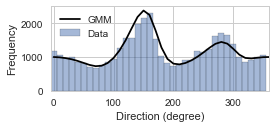

In [79]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])
density, _ = dir_hist(df['dir'], bins=arange(-5, 370, 10), density=True)

plt.bar(arange(0, 360, 10), density*10*len(df['dir']), width=10, alpha=0.5, label='Data')
plot(x/pi*180, y*len(df['dir']) ,'-', color='black', label='GMM')
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print('Direction Distribution Comparison')
sector_r_square(density*10, y[:-1])

In [80]:
pd.DataFrame(gofs_mean_set).set_index('year_lim')

k_s  r_square  r_square_dir
year_lim                                 
(1996, 2006)  NaN       NaN           NaN

## 6.4 Sectoral Comaprison

In [81]:
%%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.904634357711
Wall time: 10.9 s


In [82]:
# %%time
# curve_collection=Parallel(n_jobs=-1)(delayed(direction_compare2)
#                                      (gmm, df, angle, incre, complex=True) for angle in arange(start, end, incre))  

In [83]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = np.radians([angle, incre])  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # 0. Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. R square for GMM, Weibull
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_gmm_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_gmm_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        # 4. K-S for GMM, Weibull
        cdf_diff, cdf_diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
                
        # 5. Make Plots
        fig = plt.figure(figsize=(10,1.9))
        # 5.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 5.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        curves = {'direction': angle, 'datasize': data_size, 'weight': direction_prob, 'x': x, 
                  'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf,
                  'max_cdf_diff_gmm': cdf_diff.max(), 'max_cdf_diff_weibull': cdf_diff_weibull.max(), 
                  'r_square_gmm': R_square_gmm, 'r_square_weibull': R_square_weibull}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', cdf_diff.max(), cdf_diff_weibull.max(), 
              'speed value:', x[cdf_diff.argmax()], x[cdf_diff_weibull.argmax()], 'y gmm', y_cdf_gmm[cdf_diff.argmax()])
        print(' ')
    return curve_collection

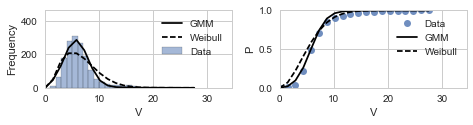

5.0 (-5.0 - 15.0) degree
data size: 1623 weight 0.038582227927542435
GMM Weibull
R square 0.968932084792 0.852369381409
max diff: 0.0595515449171 0.198427167935 speed value: 10.1629733605 4.35556001166 y gmm 0.964049388417
 


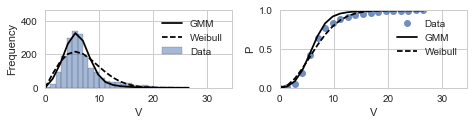

25.0 (15.0 - 35.0) degree
data size: 1963 weight 0.04666476489326297
GMM Weibull
R square 0.963135497897 0.809260720149
max diff: 0.0778809867194 0.0925059045251 speed value: 9.78690387245 6.99064562318 y gmm 0.921487711121
 


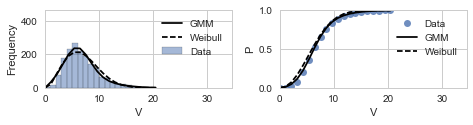

45.0 (35.0 - 55.0) degree
data size: 1674 weight 0.03979460847240052
GMM Weibull
R square 0.971479358342 0.949920446149
max diff: 0.0357451004303 0.0911978279373 speed value: 3.22865961112 4.30487948149 y gmm 0.116390261721
 


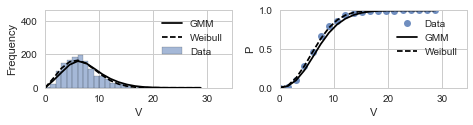

65.0 (55.0 - 75.0) degree
data size: 1377 weight 0.03273427471116817
GMM Weibull
R square 0.928734801949 0.963173442922
max diff: 0.102856708103 0.033696730751 speed value: 7.57405778767 7.57405778767 y gmm 0.565262391389
 


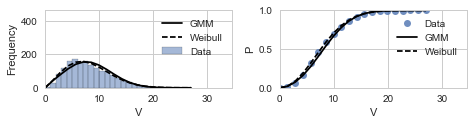

85.0 (75.0 - 95.0) degree
data size: 1612 weight 0.038320734084533827
GMM Weibull
R square 0.941861346263 0.980038602165
max diff: 0.0561137103165 0.017183048329 speed value: 7.09976891104 2.83990756442 y gmm 0.403563709038
 


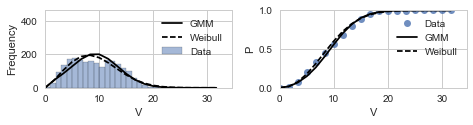

105.0 (95.0 - 115.0) degree
data size: 2189 weight 0.0520372747587125
GMM Weibull
R square 0.869476030183 0.913945227493
max diff: 0.0660270942357 0.0529631927168 speed value: 6.66456866377 11.6629951616 y gmm 0.263803878811
 


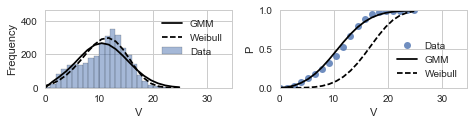

125.0 (115.0 - 135.0) degree
data size: 3127 weight 0.07433556791708268
GMM Weibull
R square 0.834583788738 0.903990196563
max diff: 0.0732214858202 0.478539566835 speed value: 10.4548361125 14.3753996547 y gmm 0.479361556175
 


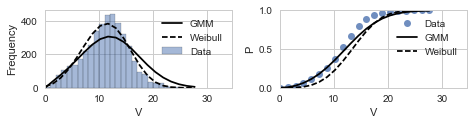

145.0 (135.0 - 155.0) degree
data size: 4151 weight 0.09867826748442923
GMM Weibull
R square 0.847060404673 0.961673040545
max diff: 0.128433143769 0.198803039157 speed value: 16.0179147698 13.1055666298 y gmm 0.764122866831
 


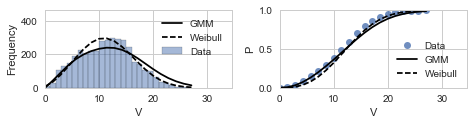

165.0 (155.0 - 175.0) degree
data size: 3826 weight 0.09095231303190225
GMM Weibull
R square 0.900166168063 0.937930485331
max diff: 0.0895674609233 0.0795291775011 speed value: 15.6691860875 7.12235731252 y gmm 0.711268921722
 


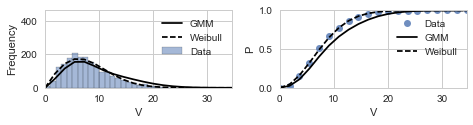

185.0 (175.0 - 195.0) degree
data size: 1844 weight 0.04383587695526078
GMM Weibull
R square 0.916175482251 0.974081434963
max diff: 0.123821576264 0.0207780879259 speed value: 9.08828198541 9.08828198541 y gmm 0.545375820699
 


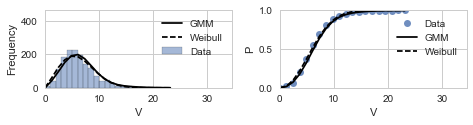

205.0 (195.0 - 215.0) degree
data size: 1483 weight 0.03525412447106927
GMM Weibull
R square 0.95224364198 0.953919790751
max diff: 0.0672209963555 0.034515829403 speed value: 6.09334785528 7.31201742633 y gmm 0.481666394069
 


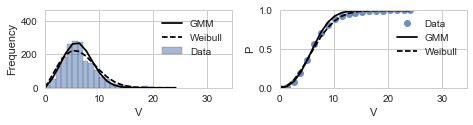

225.0 (215.0 - 235.0) degree
data size: 1833 weight 0.043574383112252174
GMM Weibull
R square 0.967559200329 0.937613578976
max diff: 0.043445370955 0.0478406841563 speed value: 10.1697752138 7.62733141036 y gmm 0.928333532439
 


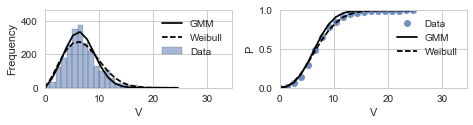

245.0 (235.0 - 255.0) degree
data size: 2345 weight 0.05574573289592545
GMM Weibull
R square 0.964061410151 0.923305473511
max diff: 0.0571672653154 0.0461293645755 speed value: 10.3367827698 7.75258707735 y gmm 0.913030804761
 


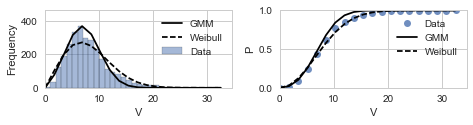

265.0 (255.0 - 275.0) degree
data size: 2847 weight 0.06767936100413635
GMM Weibull
R square 0.963666595641 0.933346681815
max diff: 0.0876441702477 0.0507640620525 speed value: 11.9739883789 10.2634186105 y gmm 0.936959238741
 


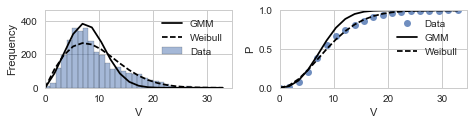

285.0 (275.0 - 295.0) degree
data size: 3372 weight 0.08015974896591072
GMM Weibull
R square 0.86274027778 0.886861129627
max diff: 0.138648197852 0.0500365278813 speed value: 13.8404499386 8.65028121162 y gmm 0.953891376974
 


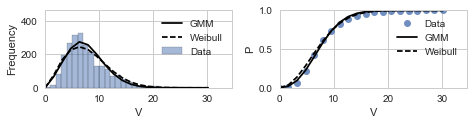

305.0 (295.0 - 315.0) degree
data size: 2376 weight 0.05648267008985879
GMM Weibull
R square 0.934622758199 0.913638487609
max diff: 0.0373581493881 0.0811388284716 speed value: 12.6946775136 3.1736693784 y gmm 0.921196533226
 


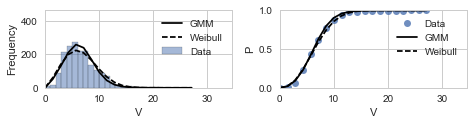

325.0 (315.0 - 335.0) degree
data size: 1761 weight 0.04186278704892312
GMM Weibull
R square 0.959304843254 0.945002518944
max diff: 0.0340685488821 0.0401675407046 speed value: 9.98837952382 2.85382272109 y gmm 0.904596657911
 


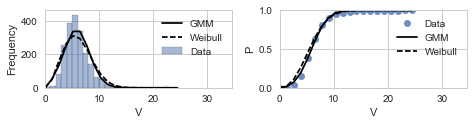

345.0 (335.0 - 355.0) degree
data size: 2057 weight 0.04889934864260923
GMM Weibull
R square 0.93014066759 0.902467836745
max diff: 0.0423417756096 0.108764686371 speed value: 2.57799728927 3.8669959339 y gmm 0.0724827576223
 
Wall time: 58.7 s


In [84]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9158637084432527 0.9240186747750685


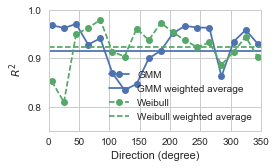

In [85]:
diff_df = pd.DataFrame(curve_collection) 

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.07924202878479368 0.10993984897662709


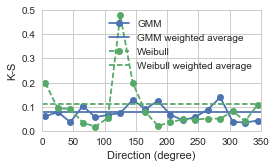

In [86]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.max_cdf_diff_gmm, diff_df.max_cdf_diff_weibull, 
                                                  diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

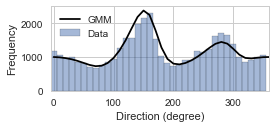

In [87]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.5 Insufficient-fit Sector Investigation

### (1) Data Variability, by Bootstrap (Resampling)

In [88]:
angle =  max_diff_angle = diff_df.ix[diff_df['max_cdf_diff_gmm'].idxmax()]['direction']
incre = rebinned_angle

In [89]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


285.0 (275.0 - 295.0) Degree Speed Distribution
0.145021180383 13.5 0.944546684535


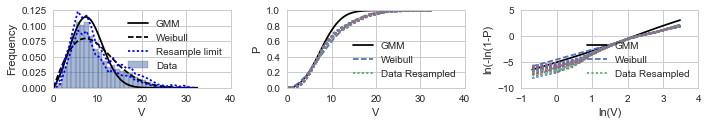

In [90]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### (2) Time Variability

In [91]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(2001, 2015, 5):
    end_time = start_time + 4 
    df_other_years = df_all_years[str(start_time):str(end_time)]
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = start_time)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = start_time)
        
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=start_time, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = start_time*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if start_time == 2011 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if start_time == 2011 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: RuntimeWarning: divide by zero encountered in log


285.0 (275.0 - 295.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXmYXGWV/7/31r70vqaTdNLpbAQIgQZDFiIQWYyiMyIQ
kAwiAmZgBBnhhyyKAQISmZFRAooDiIMIYWAkI4tmI4vIJIEEwhKydsjStXVVde13/f3ReW/fqr61
36quSr+f5/GRdHfdemt7v3XOe873MLIsy6BQKBQKhZIRdqQXQKFQKBRKNUAFk0KhUCiUHKCCSaFQ
KBRKDlDBpFAoFAolB6hgUigUCoWSA1QwKRQKhULJASqYFAqFQqHkABVMCoVCoVBygAomhUKhUCg5
QAWTQqFQKJQcoIJJoVAoFEoOUMGkUCgUCiUHqGBSKBQKhZIDVDApFAqFQskBKpgUCoVCoeQAFUwK
hUKhlI3PP/8c3//+93H55Zfjn/7pn3DDDTdgz549+OUvf4mTTjoJLpdL+Vufz4eTTz4Zr7zyCg4f
Poxp06bhN7/5TdL1vve972HJkiVlWTsVTAqFQqGUhVgshqVLl+Laa6/FSy+9hOeeew4333wzli1b
BgCYOHEi3njjDeXvX3/9dYwZM0b5d2dnJ9566y3l336/H729vWVbv7Fs90ShUCiUiuH222/HqlWr
dL3mZZddhhUrVqT9/fr163H22Wfj9NNPV342c+ZMPPfcc/jVr36FRYsW4c0338S3v/1t5e/PO+88
5W8bGhpQX1+Pffv2obu7G2+88QYuvvhibNu2TdfHkQ4aYVIoFAqlLBw+fBidnZ3Kv5cuXYolS5bg
4osvRl9fH5qbm2Gz2fD555+jt7cX7e3tsFgsSdf4yle+gj//+c8AgLVr1+JLX/pS2dZPI0wKhUIZ
haxYsSJjNFgK2tvbsWvXLuXfTzzxBADg8ssvhyiKAIYEURAEXHLJJdiyZUvSNb70pS/hW9/6Fr7x
jW+gpaUFVqu1bOunESaFQqFQysLChQvxzjvvYMeOHcrPent70dfXB4ZhAAAXXXQR1q5di23btmH2
7NnDruFwONDV1YUVK1bgq1/9atnWDlDBpFAoFEqZcDgceOKJJ/C73/0OV199NRYvXoy77roLP/rR
j9DR0QEAqKmpQXt7O2bMmAGW1ZaoSy65BNu3b8ecOXPKuXwwsizLZb1HCoVCoVCqEBphUigUCoWS
A1QwKRQKhULJAVolSxmVSJIEQRDAcRwMBgNYloXBYIDBYFCKDygUCkUNFUzKqEKSJLhcLjQ0NCj/
lmUZsiwjEokgFAqho6MDLMuCYRgqpBQKRYEKJmVUIEkSRFGEJEk4duwY6uvrIUkSeJ6HyWRSxJAI
KOkJIzVxDMMoAkqFlEIZnVDBpJzQkNSruhhclmV4PB709/eDYRiIogiz2QyWZSEIAiKRCMxmM4xG
Y5IY5iqkRqNR+TeFQjlxoEU/lBMSURTBcRw4jlPETRAEZRICx3Ho6upCV1cXJk2ahNbWVlgsFsiy
DL/fj0OHDmHfvn04dOgQ+vr64Pf7EYlEFPElQgkMCakgCEgkEkpqNxwOIxqNIhaLIZFIQBRF0C4u
ymjmmmuuwQcffABg8DPY09OD3/72t8rvlyxZgk8++WTY7TZu3IgXX3wRhw8fxuWXX57z/c2bN0+5
7r59+4pcPY0wKScYoigqqVciaoIgwOv1wu/3o7a2FizLYsyYMTAYDErRj81mgyzLSCQSGDdunHKt
RCIBjuOQSCQQDocVAbZYLDCbzTCbzcp/Z4tIE4kEAIBlWSUCJWldGpFSRgPz5s3Dtm3bMHPmTGzf
vh3z58/H22+/je9+97tIJBI4cuQIpk+fPux2CxYsADDoRTuSUMGknBBoCSXP8/B6vQgEAqirq0N3
dzfMZjNCoVBSSjUdBoMBdrsddrs96eekupaIaTgcRiKRAMMwSQJK/jv1nFMtpDzPKxErORdV/zcV
UkopmThx+M+uvBJ46KHCfn/wYOb7mzt3LlauXInvfOc7ePvtt3HZZZfh5z//OUKhED766CN84Qtf
wNatW/Hv//7vMBgMGD9+PJYtW4bVq1dj//79WLx4Mfr7+/G9730PPp8P5557Lm666SbceeedWLRo
ERYsWICNGzfi9ddfx8MPP5zfk5EDVDApVY2WUHIcB6/Xi2AwiPr6ekyePBkmkynrtRiGySllajQa
YTQak4SUiCAR0Xg8joGBAXAcB4ZhFBFViykRR3VqVxAE5b+JkKqFUxRFTRGmUKqBGTNmYP/+/ZBl
GVu3bsVtt92GOXPm4G9/+xt2796N+fPn495778Uf/vAHNDU14Re/+AVeffVVGI1DUhWNRrFixQrY
7XZ861vfwsKFC8u2fiqYlKpDluWkqle1UHo8HgwMDKChoQFTpkxJ+qARchXGfGAYRhFSh8ORtFZy
tslxHGKxGAKBgJIKVoso+X8ijurKXUmSAAB79+7FxIkTlcKi1GIj9e0olGxkiwiL/X0qLMti+vTp
2LhxI1paWmA2m7FgwQJs2LABn376Kb71rW/h3nvvxa233goAiMfjmDt3LiZMmKBcY/r06aipqQEA
nHrqqThw4EDSfZSyToAKJqVqSCeUiUQCHo8HoVAIjY2NaYWSkE4wSyWkJpNpWIQryzJ4nlcKk6LR
qCKkRqNx2PkoEVJyTSBZSNUp5nRnpBRKJTBv3jz8+te/xle+8hUAQE9PD1auXAlgcEB0e3s7Vq5c
iZqaGqxduxZ2ux3Hjh1Tbr9v3z5EIhFYLBZ88MEHuOKKK/DOO+/A4/EAAD7++OOSrZ0KJqXiIULZ
39+PQCCAzs5ORSjdbjfC4XBOQpnKSEZi5LzTbDYn/ZwIqfp8lOM48DwPo9GoPA9Wq1W5fWpUqRZS
juOU+0sV0tQiJQqlHMydOxf33HMPHnnkEQCA2WxGTU0NTjrpJLAsi7vvvhs33HADZFmGw+HAI488
kiSYdXV1+MEPfoD+/n4sWrQIkydPxmWXXYa77roLq1evxkStg1edoNNKKBULORck7RjhcBg+nw/t
7e3weDwIh8NoampCU1MTDAZDztfds2cPxo8fD6vVqggKACQSCRw7dqykH7hCkWUZHMfh0KFDqK+v
V0RVEASYTKZhqV21GUO66wHDhdRoNNLzUQolDTTCpFQcqUKpPqOMxWI4ePAgmpqa0NHRkZdQEkqR
ei01pHCIYRg0NjYqj5u4FZGIlBQaESFNPR8lQppPREpdjSiUQahgUiqGdEIZjUbh8XgQjUbBsiym
TJlS9Jlcuc4wSw3LsrBYLLBYLEk/lyQpqfWFnI8SV6PU1hetgiEipOrnhKRzqT0gZTRCBZMy4mQS
SrfbjXg8jpaWFjQ1NcHlchUtlqNhc2dZFlarFVarNennagekRCKBaDSKRCIBSZI0W1+0zjlT7QHJ
/ZG0Ls/zsFqtWdPCFEq1QQWTMmKkE8pIJAK32w2O49DS0oLOzk6wLItYLKZLBFjOKtlKg7ga2Wy2
pJ8TIU0tNpJlWbP1JZMZw8GDB9HR0aGkkKlhPeVEgQompexoCSUAhMNhuN1uCIKAlpYW1NfXJ22s
egma+jqjQSRzIZ2QZnM1ShVTg8GQ9JrSyS+UEwkqmJSyoTYpB4ZSo6FQCG63G6IoorW1FXV1dWk3
zlKKGxXP4RTiaqRufcklIk2X2qWTXyiVBhVMSskRRRF+vx9OpxPAkDANDAzA4/FAkiS0traitrY2
48ZYigiTkj/ZXI16e3thNBoRj8cRDAZzcjVSX4Ma1lMqFSqYlJJBXHlEUURvby9OPvlkAEAwGFRc
OVpaWrIKJaHUgkmFtDiIqxHDMKivr1dMJDK5GhkMBs1io0xCmmpYn9r+QoWUUiqoYFJ0R21fpz7P
CgQC8Hq9YFk

### (3) Adjacent Sector Variability

In [92]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [93]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('direction == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['datasize'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


285.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYXGWZ9/89S1V1LV1dvS/p7iTd6SSQhQSQgIlRSAQv
hBlff6aVYEYBFXlhfIk/vVhkGeTSGWBkcRRGRGeGRWMQRnQU/UFYopAXAwkEgtm6O0sn3bV1dXXt
p87y+6PynJyqPrWfqt6ez3Vx0anuOs+p5Tzfc9/PfX8fRlEUBRQKhUKhUHLCTvUJUCgUCoUyE6CC
SaFQKBRKAVDBpFAoFAqlAKhgUigUCoVSAFQwKRQKhUIpACqYFAqFQqEUABVMCoVCoVAKgAomhUKh
UCgFQAWTQqFQKJQCoIJJoVAoFEoBUMGkUCgUCqUAqGBSKBQKhVIAVDApFAqFQikAKpgUCoVCoRQA
FUwKhUKhUAqACiaFQqFQqsaJEyfwjW98A/39/fiHf/gHfO1rX8Phw4fxb//2bzjrrLPgdrvVv/X7
/Vi2bBmef/55DA8PY8mSJXj88cfTjvf1r38dW7Zsqcq5U8GkUCgUSlWIxWK44YYbcM0112D79u14
8skncdNNN+G73/0uAGDBggV48cUX1b//wx/+gPb2dvXf3d3d+NOf/qT+OxAI4NixY1U7f75qI1Eo
FApl2vDtb38bzz77rKHH3LRpEx544IGsv3/11Vdx4YUXYvXq1epjK1euxJNPPokf/ehHuPzyy/HH
P/4RX/7yl9W/v/jii9W/ra+vh8vlwsDAAHp7e/Hiiy/iU5/6FN5++21DX0c2aIRJoVAolKowPDyM
7u5u9d833HADtmzZgk996lMYHR1FU1MTrFYrTpw4gWPHjqGtrQ0WiyXtGJ/+9Kfx+9//HgCwY8cO
bNy4sWrnTyNMCoVCmYM88MADOaPBStDW1oYPPvhA/fdjjz0GAOjv74ckSQDOCKIoirjyyivxxhtv
pB1j48aNuPrqq/HZz34Wzc3NqKmpqdr50wiTQqFQKFVhw4YN2LVrF9599131sWPHjmF0dBQMwwAA
LrvsMuzYsQNvv/021qxZM+kYdrsdCxcuxAMPPIArrriiaucOUMGkUCgUSpWw2+147LHH8F//9V/4
4he/iC984Qu4/fbbcdttt6GjowMAUFtbi7a2Npx99tlgWX2JuvLKK/HOO+/goosuqubpg1EURanq
iBQKhUKhzEBohEmhUCgUSgFQwaRQKBQKpQBolSxlTiLLMkRRhCAI4DgOLMuC4zhwHKcWH1AoFIoW
KpiUOYUsy3C73aivr1f/rSgKFEVBJBJBKBRCR0cHWJYFwzBUSCkUigoVTMqcQJZlSJIEWZYxMjIC
l8sFWZaRTCZhMplUMSQCSnrCSE0cwzCqgFIhpVDmJlQwKbMaknrVFoMrigKv14uxsTEwDANJkmA2
m8GyLERRRCQSgdlsBs/zaWJYqJDyPK/+m0KhzB5o0Q9lViJJEgRBgCAIqriJoqjuhCAIAhYuXIiF
Cxeip6cHLS0tsFgsUBQFgUAAx48fx8DAAI4fP47R0VEEAgFEIhFVfIlQAmeEVBRFJBIJNbUbDocR
jUYRi8WQSCQgSRJoFxdlLvOlL30J+/btA5C6Bs877zw88cQT6u+3bNmCv/3tb5Oet3PnTvzqV7/C
8PAw+vv7Cx5v7dq16nEHBgbKPHsaYVJmGZIkqalXImqiKMLn8yEQCMDpdIJlWbS3t4PjOLXox2q1
QlEUJBIJdHZ2qsdKJBIQBAGJRALhcFgVYIvFArPZDLPZrP6cLyJNJBIQRRGBQADt7e1gGEZN69KI
lDIXWLt2Ld5++22sXLkS77zzDtatW4fXX38dX/nKV5BIJHDy5EksXbp00vPWr18PIOVFO5VQwaTM
CvSEMplMwufzYXx8HHV1dejt7YXZbEYoFEpLqWaD4zjYbDbYbLa0x0l1LRHTcDiMRCIBhmHSBJT8
rF3nJMVFREiTyaQasZJ1Ue3PVEgplWTBgsmPXXUV8M//XNrvjx7NPd5HP/pRPProo7j22mvx+uuv
Y9OmTfjXf/1XhEIh7N+/HxdccAF2796Nhx56CBzHoaurC9/97nfxu9/9DoODg/jCF76AsbExfP3r
X4ff78cnPvEJ3Hjjjbj11ltx+eWXY/369di5cyf+8Ic/4F/+5V+KezMKgAomZUajJ5SCIMDn8yEY
DMLlcmHRokUwmUx5j8UwTEEpU57nwfN8mpCSaJKIaDwex8TEBARBAMMwqohyHKcWIBFx1IqpKIrq
z0RItcJJhZQykzn77LMxODgIRVGwe/dufPOb38RFF12EN998EwcPHsS6detw55134he/+AUaGxvx
8MMP47//+7/B82ekKhqN4oEHHoDNZsPVV1+NDRs2VO38qWBSZhxEcBRFmSSUXq8XExMTqK+vR19f
X9qFRihUGIuBYRhVSO12u/o4EUEipLFYDLIsY3BwEBzHpUWk5P9EDLWVu7Isq8cj47EsO6nYSPs8
CiUf+SLCcn+fCcuyWLp0KXbu3Inm5maYzWasX78er732Gg4cOICrr74ad955J26++WYAQDwex0c/
+lHMnz9fPcbSpUtRW1sLAFixYgWGhobSxqhknQAVTMqMgQhkLBbD4OAglixZAoZhkEgk4PV6EQqF
0NDQkFUoCdkEs1JCajKZ1AhXEAScPHkSCxYsQDKZVAuTotEoxsfHIQgCeJ6ftD6qFVJCLiGNRCKw
Wq2oqalRI1IKZTqwdu1a/OQnP8GnP/1pAMB5552HRx99FEBqg+i2tjY8+uijqK2txY4dO2Cz2TAy
MqI+f2BgAJFIBBaLBfv27cPnP/957Nq1C16vFwDw4YcfVuzcqWBSpj1EKLXtIaSIxuPxIBwOFySU
mUxFJEZEmax3ms3mtN8rioJkMpm2PioIApLJJHienxSNms3mSVGlLMvw+/2or6/PGpFyHDepSIlC
qQYf/ehHcccdd+D+++8HAJjNZtTW1uKss84Cy7L4zne+g6997WtQFAV2ux33339/mmDW1dVh69at
GBsbw+WXX45FixZh06ZNuP322/G73/0OC/QWXg2C7lZCmbaQdUGSfiWTeyQSwdGjR8GyLBobG9HY
2AiO4wo+7uHDh9HV1YWamhoIgqA+nkgkMDIyUtELLplM4sSJE+jp6SnqeYqiqNGotnJXFEWYTKZJ
qV23242Ghoa09HDm8YDJQsrzPDVjoFCyQCNMyrRDTygZhkEsFoPX60UkEgEALF68uCihJFQi9Vpp
SOGQxWJR128AqG5FRERJoVEymYTb7YbVak0TU+JqlC21S24gtEJKXY0olBRUMCnThmxCGY1G4fV6
EYvF0NTUhI6ODhw8eLAksdSOlclMFFKWZVUh1XLixAk4HA6wLAtBENT1UeJqlNn6olcwRIRU+56Q
dC75W5JapkJKmQtQwaRMObmE0uPxIB6Po7m5GV1dXWBZVm25KJWpntyrJcpms3lSSlbrgJRIJBCN
RpFIJCDLsu76qN46J+khlSQJAwMD6Ovrm1SxSyNSymyECiZlysgmlJFIBB6PB4IgoLm5Gd3d3bpV
ntp1zWKoZpWs3hjVQm8s4mpktVrTHidCmllspCiKbutLZpRJDespcwEqmJSqoygKxsfHAQBWq1Wd
PMPhMDweD0RRRHNzM1wul+7Eqp2kyxXMmZiGrQTZhDSXq5HJZFI/Sz1XI6Bww3oqpJSZABVMStXQ
mpQHg0HwPA+r1YpQKASPxwNJktDS0oK6urq8E2eleiapeKaTy9UoFothdHQ0q6uRXkSaeQzyM0HP
jIG6GlGmC1QwKRWHOPOQCZJEGPF4HIODg5BlGS0tLXA6nUVNjKWKGxXG8iDtJzabDQzDoK2tDcAZ
VyMSkcbjcQS

# 7. Result Variability & Cross-Validation

In [94]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

1.1 square_error


## 7.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.448  -6.512   5.925  7.197  4.601  -0.006
2  0.346  -0.837  -5.014  4.013  3.857  -0.407
3  0.206   4.884   0.220  2.287  3.447  -0.158

GMM Plot Result
0.448036532228 [[-6.51214692  5.92524672]] [ 4.60116993  7.1974108 ] -90.3452493942
0.345704594149 [[-0.83747624 -5.01406905]] [ 3.02645788  4.67124611] -132.207610193
0.206258873622 [[ 4.88443919  0.21986022]] [ 2.23720332  3.47941485] -169.698844626


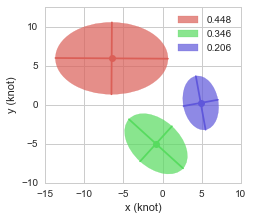

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.976  0.019      0.192  2.510481e-08      0.032       0.199

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.018      0.171  2.572148e-08      0.032       0.201

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.448  -6.492   5.919  7.143  4.554  -0.020
2  0.352  -0.754  -5.051  4.048  3.865  -0.388
3  0.200   4.923   0.215  2.246  3.360  -0.124

GMM Plot Result
0.447890406655 [[-6.49183548  5.9188433 ]] [ 4.55234787  7.14390305] -91.2211731677
0.352069480925 [[-0.75390438 -5.05075567]] [ 3.08951442  4.66684713] -131.609655527
0.20004011242 [[ 4.92297989  0.21498254]] [ 2.2151241   3.38011531] -171.64224864


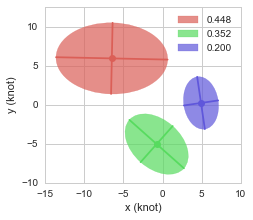

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.973  0.018      0.167  2.774818e-08      0.033       0.209

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.017      0.156  2.589704e-08      0.032       0.202

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.440  -6.513   5.966  7.221  4.608  -0.022
2  0.350  -0.968  -4.950  4.083  3.955  -0.429
3  0.211   4.833   0.224  2.274  3.388  -0.140

GMM Plot Result
0.439568851141 [[-6.51268134  5.96626057]] [ 4.60626072  7.22265112] -91.36741611
0.349782627497 [[-0.96751755 -4.95017288]] [ 3.03504302  4.80607589] -132.867643351
0.210648521362 [[ 4.83261012  0.22427152]] [ 2.23442957  3.41472455] -170.572543035


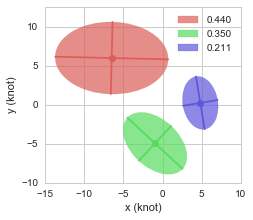

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.977  0.018      0.163  2.426041e-08      0.031       0.196

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.018      0.159  2.609387e-08      0.032       0.203

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.426  -6.678   6.071  7.061  4.490   0.008
2  0.357  -0.931  -4.981  4.077  3.957  -0.434
3  0.217   4.800   0.318  2.380  3.487  -0.176

GMM Plot Result
0.425999129967 [[-6.6782429   6.07123447]] [ 4.48973393  7.0610181 ] -89.5331177498
0.357240522802 [[-0.93136138 -4.9808192 ]] [ 3.01942591  4.81241654] -133.036309333
0.216760347231 [[ 4.79959528  0.31839297]] [ 2.31341069  3.53173437] -167.873134439


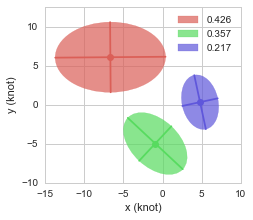

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.976  0.016      0.185  2.499153e-08      0.032       0.198

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.016      0.181  2.595358e-08      0.032       0.202

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.449  -6.635   5.927  6.898  4.686  -0.014
2  0.336  -0.880  -5.130  3.993  3.841  -0.385
3  0.216   4.805   0.222  2.342  3.561  -0.085

GMM Plot Result
0.448838959803 [[-6.63542324  5.92697198]] [ 4.68554162  6.89817286] -91.040742888
0.335591813593 [[-0.88014181 -5.12953988]] [ 3.06743402  4.61386351] -132.122309199
0.215569226604 [[ 4.80456246  0.22157181]] [ 2.32702431  3.57066483] -174.453997155


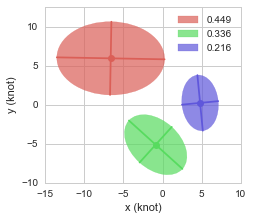

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.974  0.017      0.143  2.684618e-08      0.033       0.206

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.018      0.152  2.594566e-08      0.032       0.202

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.426  -6.919   6.116  6.730  4.528   0.023
2  0.349  -1.024  -5.026  4.076  3.944  -0.421
3  0.225   4.800   0.282  2.381  3.518  -0.120

GMM Plot Result
0.425730093472 [[-6.91865248  6.11566491]] [ 4.52543823  6.73134375] -88.3560423262
0.348795125808 [[-1.02412473 -5.02648444]] [ 3.04871382  4.78280646] -132.773643064
0.225474780719 [[ 4.79978796  0.28225717]] [ 2.34951612  3.5387729 ] -171.666347327


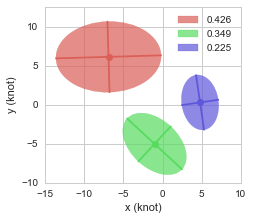

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.974  0.017      0.200  2.689420e-08      0.033       0.206

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.016      0.179  2.581176e-08      0.032       0.202

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.444  -6.683   6.134  7.076  4.670   0.019
2  0.344  -0.925  -4.998  4.014  3.913  -0.411
3  0.212   4.866   0.115  2.276  3.417  -0.102

GMM Plot Result
0.444217427964 [[-6.6833258  6.1340159]] [ 4.6680496  7.0769235] -88.7264106078
0.343673686357 [[-0.92495256 -4.99833944]] [ 3.03961175  4.70951313] -133.221907837
0.21210888568 [[ 4.86580319  0.11535039]] [ 2.25544661  3.43130237] -173.162553058


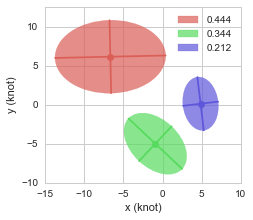

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.974  0.020      0.217  2.716025e-08      0.032       0.207

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.023      0.163  2.610465e-08      0.032       0.203

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.453  -6.441   5.836  7.250  4.630  -0.019
2  0.338  -0.951  -5.036  3.955  3.859  -0.397
3  0.209   4.860   0.122  2.255  3.374  -0.116

GMM Plot Result
0.452749943573 [[-6.44111625  5.83589984]] [ 4.62912287  7.25054816] -91.1489216716
0.338285970052 [[-0.95116244 -5.03557176]] [ 3.03147728  4.62005779] -133.245757596
0.208964086375 [[ 4.86014435  0.1215363 ]] [ 2.22839668  3.39214984] -172.194159101


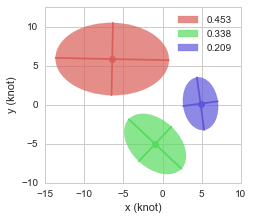

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.977  0.019      0.178  2.423958e-08      0.030       0.196

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.019      0.158  2.606868e-08      0.032       0.203

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.428  -6.993   6.021  6.758  4.576   0.019
2  0.348  -0.922  -5.024  4.015  3.887  -0.393
3  0.225   4.815   0.304  2.379  3.582  -0.135

GMM Plot Result
0.427558977139 [[-6.99303923  6.02075921]] [ 4.5741216   6.75904299] -88.6117728069
0.34779051675 [[-0.92153899 -5.02358542]] [ 3.07577141  4.66583554] -132.641448334
0.224650506111 [[ 4.8147642   0.30364574]] [ 2.34132134  3.60665577] -171.118643795


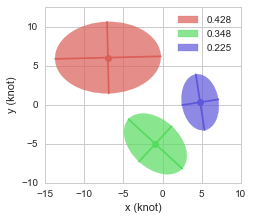

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.974  0.017      0.180  2.735067e-08      0.034       0.208

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.017      0.173  2.570319e-08      0.032       0.201

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.427  -6.939   6.146  6.844  4.562   0.035
2  0.357  -0.916  -4.921  4.009  3.901  -0.382
3  0.216   4.790   0.416  2.394  3.524  -0.190

GMM Plot Result
0.427161056703 [[-6.93880856  6.14573916]] [ 4.55752255  6.84708938] -87.6213585576
0.356914005507 [[-0.91609106 -4.92052236]] [ 3.10810931  4.65064641] -132.952087976
0.21592493779 [[ 4.79012719  0.41571923]] [ 2.31704503  3.57534652] -167.190069832


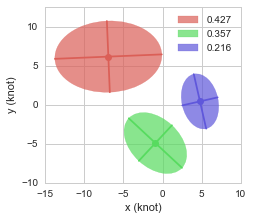

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.972  0.018      0.188  2.847131e-08      0.035       0.212

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.017      0.169  2.587638e-08      0.032       0.202

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.442  -6.594   5.902  7.109  4.618   0.004
2  0.344  -0.919  -5.009  4.019  3.861  -0.395
3  0.215   4.869   0.248  2.317  3.459  -0.123

GMM Plot Result
0.441551664992 [[-6.59428416  5.90186732]] [ 4.61833482  7.10917075] -89.7606705115
0.343672167131 [[-0.91878616 -5.00945377]] [ 3.05964739  4.65788142] -132.101046126
0.214776167877 [[ 4.86944205  0.24783553]] [ 2.2854402   3.47964066] -171.691796669


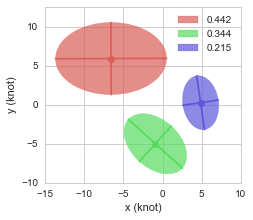

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.018      0.152  2.633190e-08      0.032       0.203

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.018      0.158  2.577298e-08      0.032       0.202

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.414  -7.068   6.216  6.661  4.530   0.074
2  0.357  -0.958  -4.965  4.080  3.936  -0.409
3  0.229   4.780   0.448  2.406  3.533  -0.167

GMM Plot Result
0.414075996987 [[-7.06780742  6.21555577]] [ 4.50748138  6.67664413] -84.7305269459
0.356676549647 [[-0.95846895 -4.96477575]] [ 3.07927106  4.75963525] -132.495718834
0.229247453367 [[ 4.77977562  0.4479891 ]] [ 2.34564323  3.57325841] -168.505982285


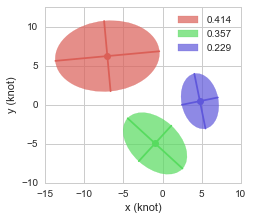

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.974  0.015      0.184  2.664357e-08      0.033       0.205

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.016      0.193  2.584240e-08      0.032       0.202


Wall time: 21.3 s


In [95]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(12))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [96]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Number of train/test dataset 31549.5 10516.5
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.182558  0.058436  2.435895e-07    0.099267     0.619421  0.765859
1    0.182516  0.058233  2.431249e-07    0.098218     0.618769  0.765971
2    0.180312  0.056443  2.368530e-07    0.099152     0.611256  0.770435
3    0.181892  0.058028  2.411418e-07    0.098179     0.616276  0.768998

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.185844  0.052871  2.382331e-07    0.097883     0.612949  0.770088
1    0.184048  0.054111  2.349332e-07    0.100112     0.608867  0.774488
2    0.191001  0.062170  2.528227e-07    0.097124     0.630015  0.761859
3    0.189034  0.064485  2.518646e-07    0.102481     0.630319  0.754925

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.116961  0.023942  9.006525e-08    0.059317     0.376629  0.913588
1    0.114057  0.025048  8.992753e-08    0.060022     0.376439  0.913816
2    0.115565  0.024748  9.052175e-08    0.061224     0.377714  0.912450
3    0.109330  0.024198  9.052395e-08    0.060999     0.377662  0.912576

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.126982  0.023941  9.574609e-08    0.065502     0.388639  0.907252
1    0.107255  0.026843  9.475828e-08    0.062647     0.386327  0.907778
2    0.145494  0.032475  9.406191e-08    0.059442     0.384803  0.911013
3    0.128568  0.025059  9.432500e-08    0.060161     0.385516  0.910391

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.166170  0.018455  2.588128e-08    0.031903     0.202026  0.974987
1    0.161144  0.016163  2.525301e-08    0.032535     0.199547  0.975585
2    0.208430  0.017181  2.552398e-08    0.032584     0.200465  0.975312
3    0.168793  0.017009  2.611411e-08    0.031862     0.202751  0.975181

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.177436  0.017164  2.983356e-08    0.036180     0.216523  0.971699
1    0.215154  0.023783  3.243144e-08    0.034309     0.225793  0.969288
2    0.150731  0.021950  3.073525e-08    0.033762     0.220303  0.970906
3    0.288367  0.020775  3.044033e-08    0.037229     0.219301  0.969651

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    2.092061  0.020415  1.695521e-08    0.026388     0.163474  0.983628
1    3.886085  0.020336  1.608949e-08    0.025591     0.159185  0.984510
2    3.139501  0.018859  1.568497e-08    0.024835     0.157191  0.984911
3    2.174824  0.019262  1.564160e-08    0.025174     0.157007  0.984975

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    2.416939  0.020222  1.845747e-08    0.026647     0.170446  0.982446
1    2.573307  0.023474  1.944738e-08    0.027711     0.175156  0.981318
2    2.215120  0.020397  2.298371e-08    0.031759     0.190348  0.977907
3    4.603554  0.024197  2.113483e-08    0.029089     0.182413  0.979561

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.159491  0.009697  7.038815e-09    0.016727     0.105321  0.993244
1    0.168774  0.008625  7.455789e-09    0.017688     0.108384  0.992798
2    0.173598  0.008576  7.269189e-09    0.016573     0.106973  0.993004
3    0.016151  0.005008  8.529774e-09    0.019003     0.115970  0.991789

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.199232  0.013811  1.236204e-08    0.022582     0.139521  0.988020
1    0.399635  0.013498  1.069134e-08    0.019669     0.129794  0.989834
2    0.216942  0.013080  1.593612e-08    0.028252     0.158670  0.984731
3    0.021954  0.007244  1.265326e-08    0.021137     0.141045  0.987848

Wall time: 1min


In [97]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.181819  0.057785  2.411773e-07    0.098704     0.616430  0.767816
2    0.113978  0.024484  9.025962e-08    0.060391     0.377111  0.913107
3    0.176134  0.017202  2.569310e-08    0.032221     0.201197  0.975266
4    2.823118  0.019718  1.609282e-08    0.025497     0.159214  0.984506
5    0.129503  0.007976  7.573392e-09    0.017498     0.109162  0.992709

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.187482  0.058409  2.444634e-07    0.099400     0.620538  0.765340
2    0.127075  0.027079  9.472282e-08    0.061938     0.386321  0.909109
3    0.207922  0.020918  3.086014e-08    0.035370     0.220480  0.970386
4    2.952230  0.022073  2.050584e-08    0.028801     0.179591  0.980308
5    0.209441  0.011908  1.291069e-08    0.022910     0.142258  0.987609

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


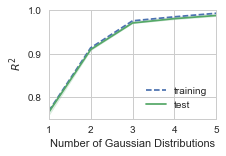

K_S


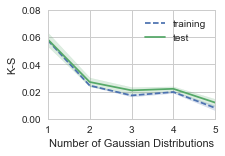

Chi_square


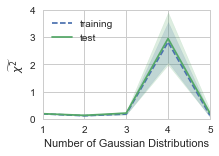

In [98]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

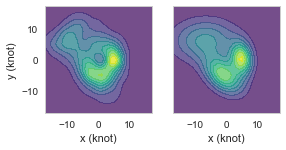

In [99]:
fig = plt.figure(figsize=(4.2,2.4))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

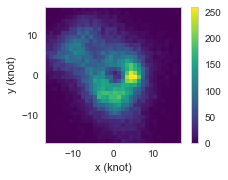

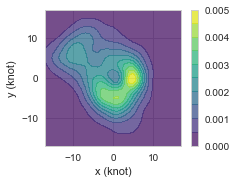

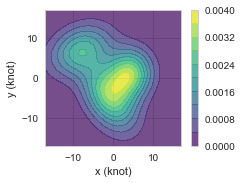

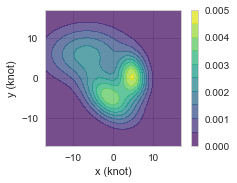

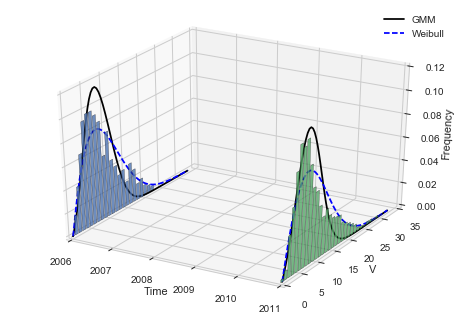

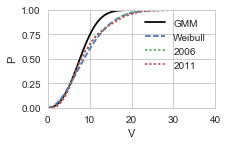

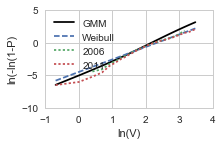

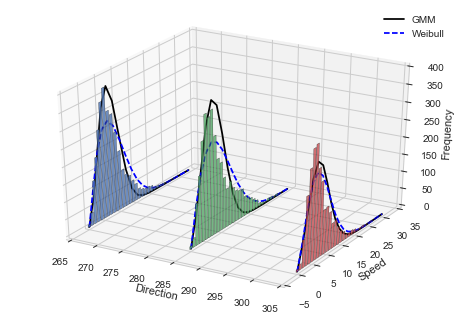

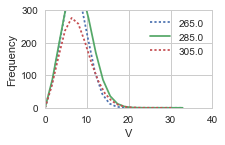

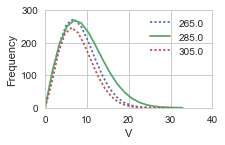

In [100]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [101]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

al_maktoum
